# AI Project(Neural Network)
This project is divided into two main parts, each containing multiple tasks. It explores various aspects of data generation, neural network training, and image processing using the fashion-mnist dataset.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense,Activation
from IPython.display import Image
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

## Part 1
### Question 1

1. Generate Data: We'll create a simple linear function and generate a set of points from it. We'll split these points into a training set and a test set.
   
2. Build and Train MLP: Using the training set, we'll train an MLP to learn the underlying linear function.

3. Visualize Results: We'll plot the original linear function, the learned function by the MLP, and the input points. Additionally, we can show the network error using graphs or numerical metrics.

In [8]:
# Function to generate data
def generate_data(num_points, function):
    np.random.seed(0)  # for reproducibility
    X = np.linspace(0, 10, num_points)
    y = function(X)
    return X, y

In [9]:
# Function to visualize results
def visualize_results(X, y, mlp, function_name):
    plt.figure(figsize=(10, 6))

    # Plot original function
    plt.plot(X, y, label='Original Function', color='blue')

    # Plot input points
    plt.scatter(X, y, label='Input Points', color='red')

    # Plot MLP prediction
    X_range = np.linspace(0, 10, 100)
    y_pred = mlp.predict(X_range.reshape(-1, 1))
    plt.plot(X_range, y_pred, label='MLP Prediction', color='orange')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Original Function vs. MLP Prediction ({function_name})')
    plt.legend()

    plt.show()

In [10]:
# Step 1: Generate Data
def linear_function(x):
    return 2 * x + 3

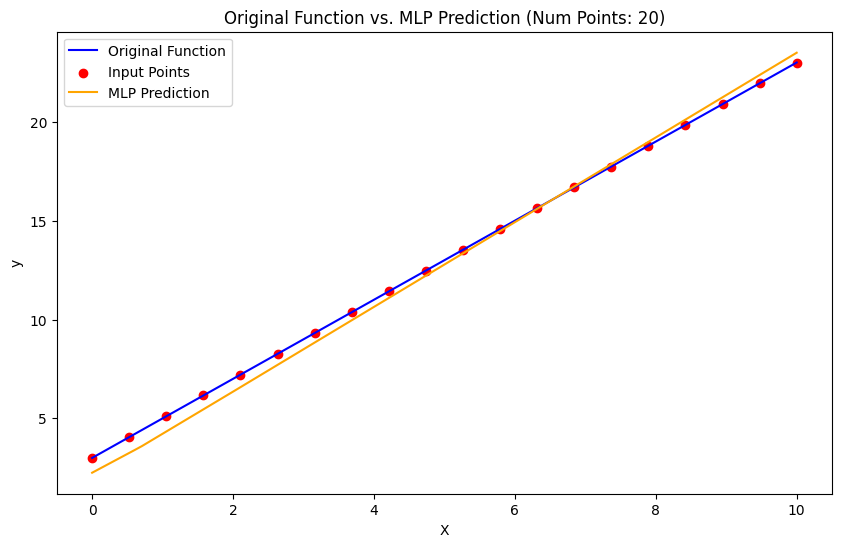

Training Mean Squared Error: 0.18
Test Mean Squared Error: 0.34


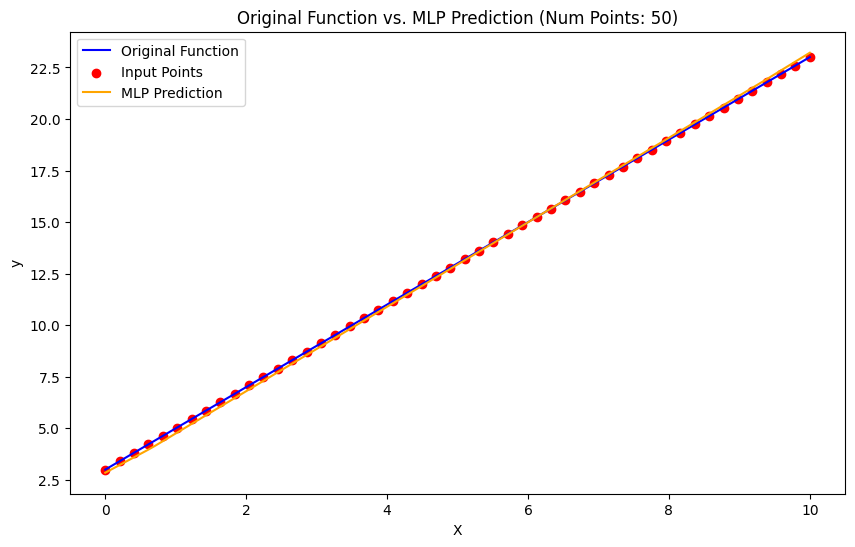

Training Mean Squared Error: 0.02
Test Mean Squared Error: 0.01


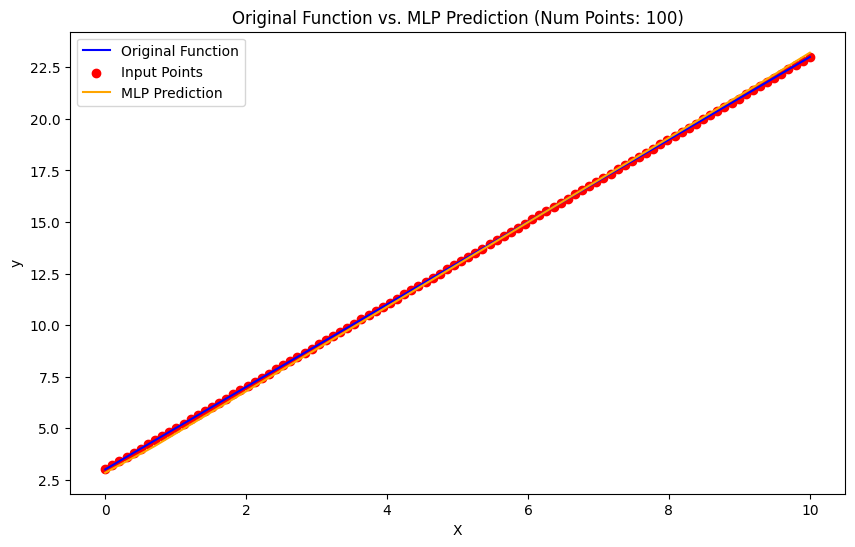

Training Mean Squared Error: 0.02
Test Mean Squared Error: 0.02


In [11]:
# Experiment 1: Varying the number of input points
num_points_list = [20, 50, 100]
for num_points in num_points_list:
    X, y = generate_data(num_points, linear_function)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', max_iter=1000)
    mlp.fit(X_train.reshape(-1, 1), y_train)
    visualize_results(X, y, mlp, f'Num Points: {num_points}')
    
    # Calculate and display network error
    train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
    test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
    print(f"Training Mean Squared Error: {train_error:.2f}")
    print(f"Test Mean Squared Error: {test_error:.2f}")

Experiment 1: Varying the Number of Input Points

The results indicate a clear trend in the performance of the MLP as the number of input points varies. As the number of input points increases, both the training and test mean squared errors decrease. This suggests that increasing the amount of training data improves the network's ability to generalize to unseen data. The training error tends to be lower than the test error, indicating some degree of overfitting, especially with a small number of input points.

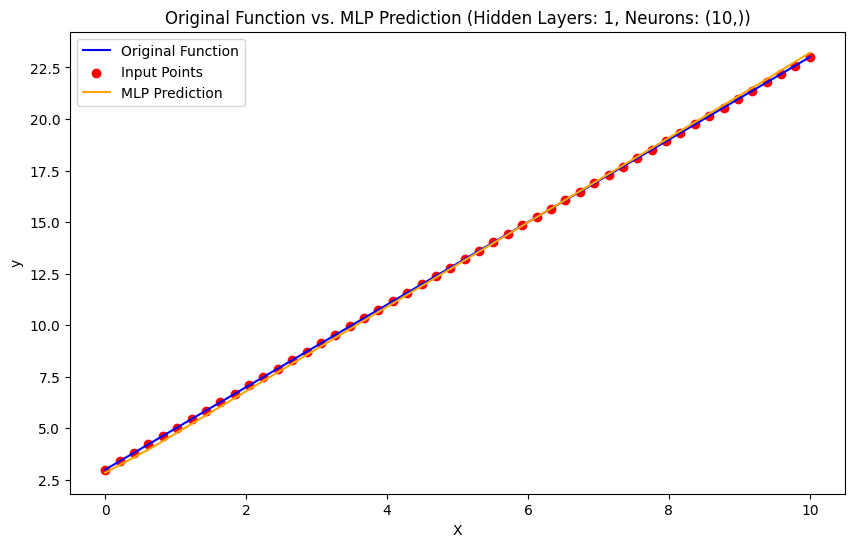

Training Mean Squared Error: 0.02
Test Mean Squared Error: 0.01


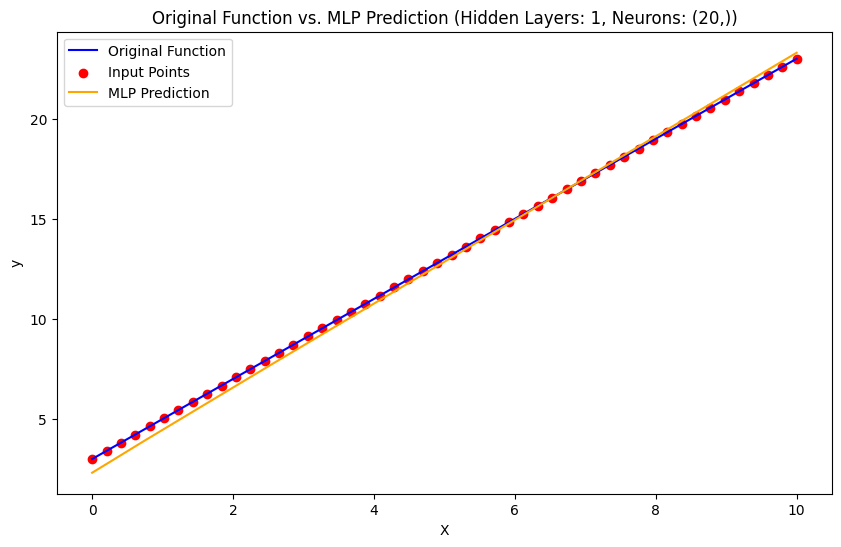

Training Mean Squared Error: 0.12
Test Mean Squared Error: 0.04


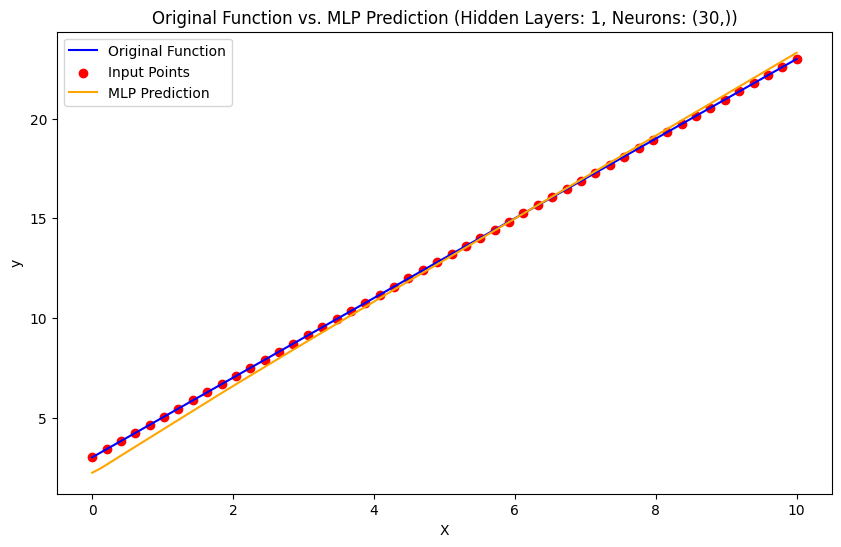

Training Mean Squared Error: 0.13
Test Mean Squared Error: 0.04


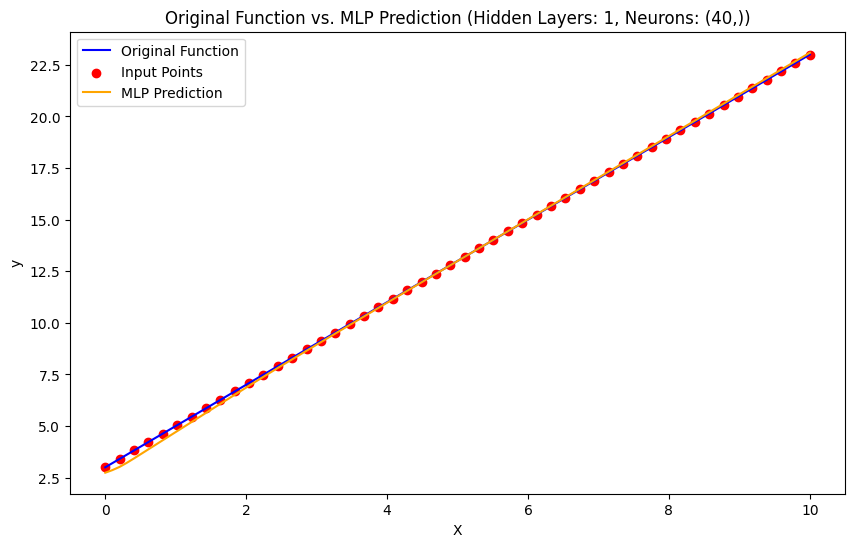

Training Mean Squared Error: 0.02
Test Mean Squared Error: 0.00


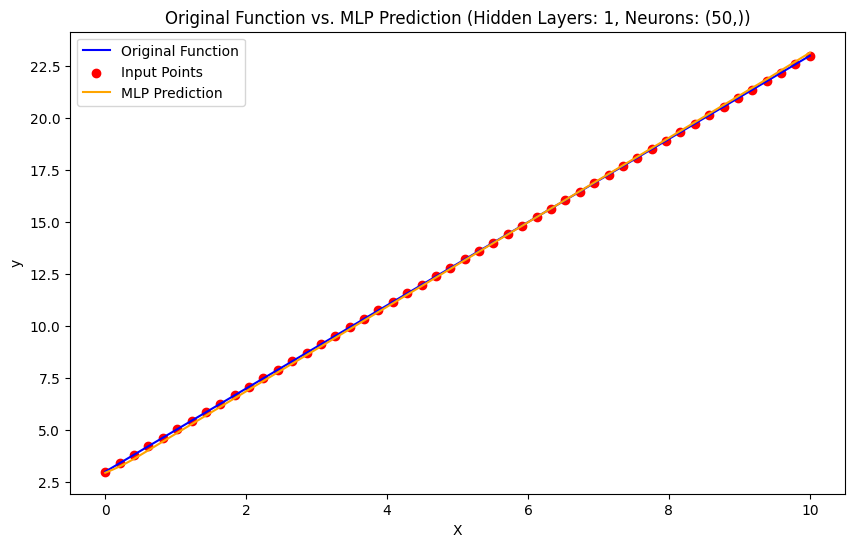

Training Mean Squared Error: 0.01
Test Mean Squared Error: 0.01


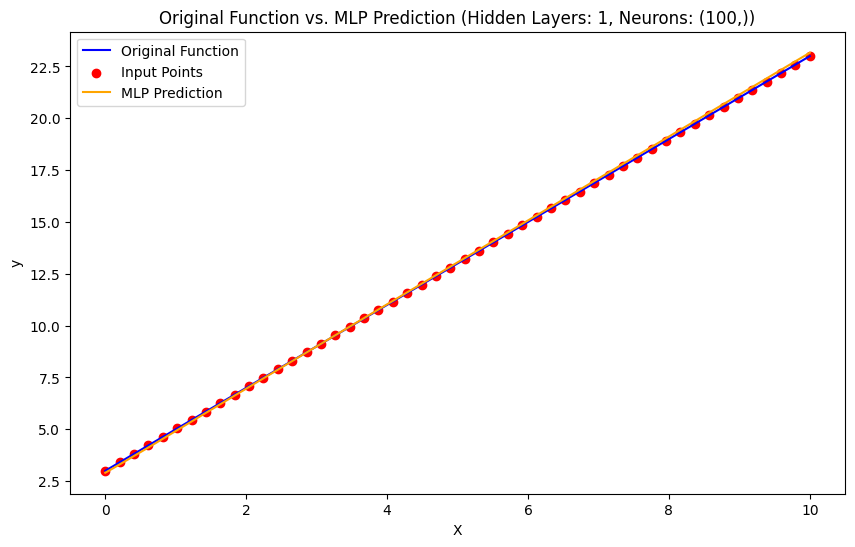

Training Mean Squared Error: 0.01
Test Mean Squared Error: 0.01


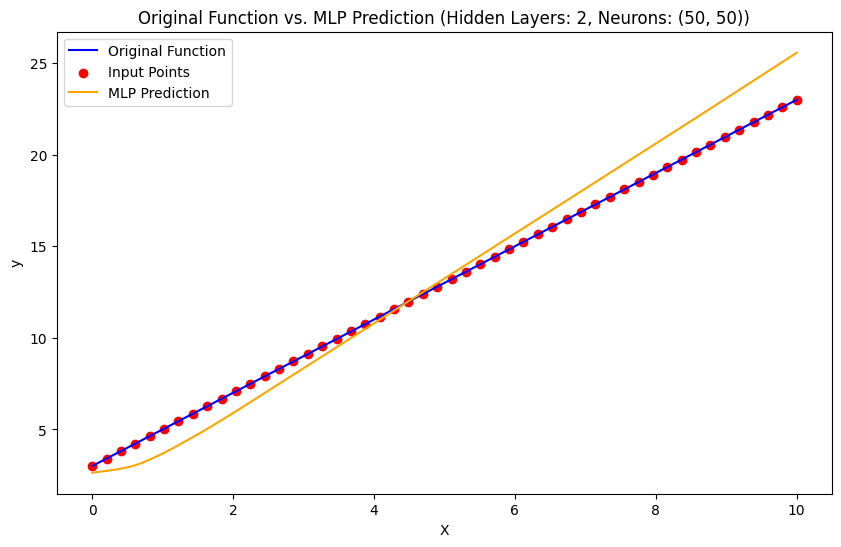

Training Mean Squared Error: 1.59
Test Mean Squared Error: 1.60


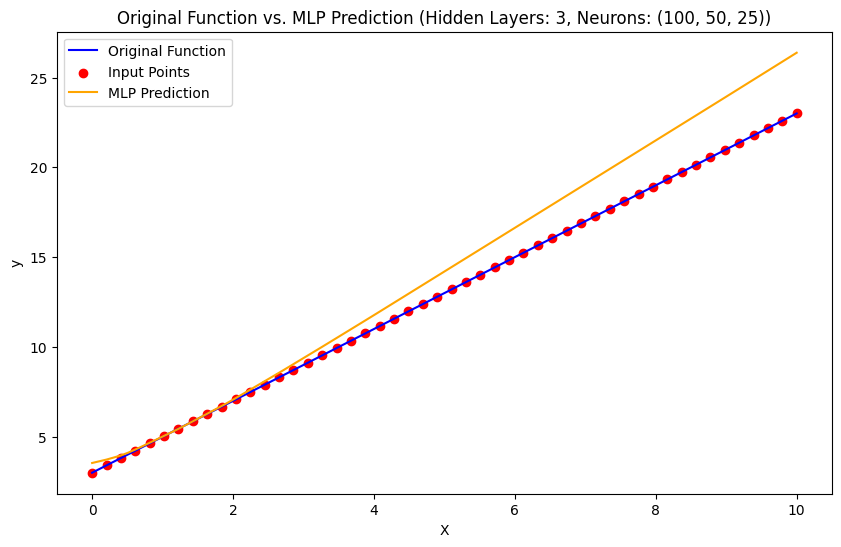

Training Mean Squared Error: 2.84
Test Mean Squared Error: 3.66


In [12]:
# Experiment 2: Varying the number of hidden layers and neurons in each layer
hidden_layer_sizes_list = [(10,), (20,), (30,), (40,), (50,), (100,), (50, 50), (100, 50, 25)]
for hidden_layer_sizes in hidden_layer_sizes_list:
    X, y = generate_data(50, linear_function)  # Simple linear function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=1000)
    mlp.fit(X_train.reshape(-1, 1), y_train)
    visualize_results(X, y, mlp, f'Hidden Layers: {len(hidden_layer_sizes)}, Neurons: {hidden_layer_sizes}')

    # Calculate and display network error
    train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
    test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
    print(f"Training Mean Squared Error: {train_error:.2f}")
    print(f"Test Mean Squared Error: {test_error:.2f}")

Experiment 2: Varying the Number of Hidden Layers and Neurons

The results show that the configuration of hidden layers and neurons has a significant impact on the network's performance. Networks with fewer hidden layers and neurons generally perform better, as indicated by lower mean squared errors. However, overly simplistic networks may not capture the underlying complexity of the function, leading to underfitting. On the other hand, networks with too many neurons or layers may suffer from overfitting, as evidenced by the significantly higher mean squared errors.

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


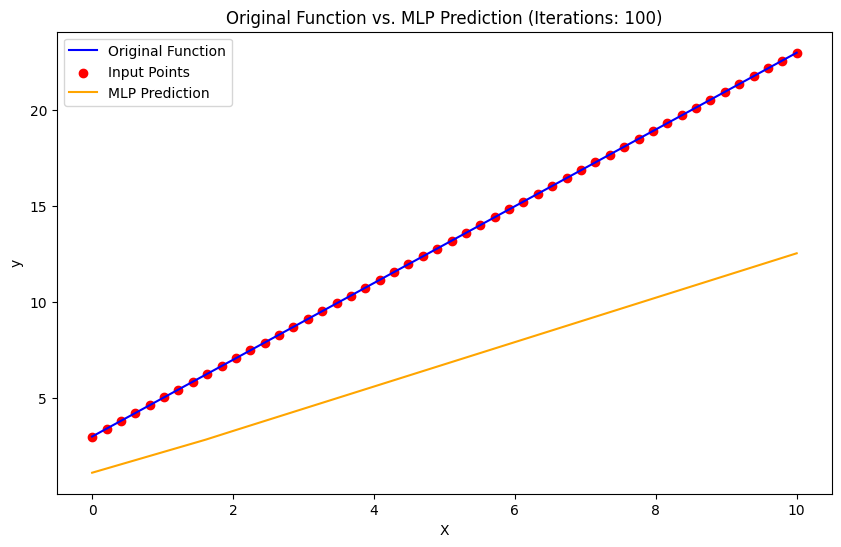

Training Mean Squared Error: 42.80
Test Mean Squared Error: 53.82


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


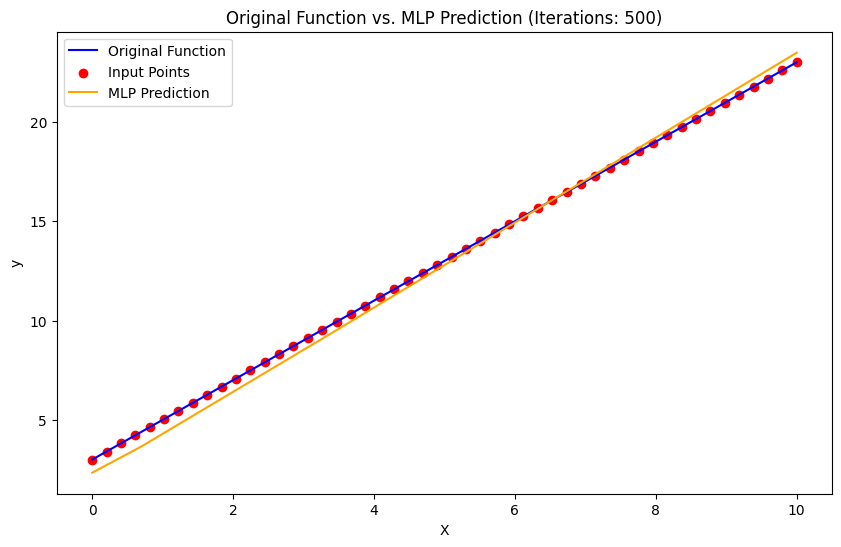

Training Mean Squared Error: 0.20
Test Mean Squared Error: 0.10


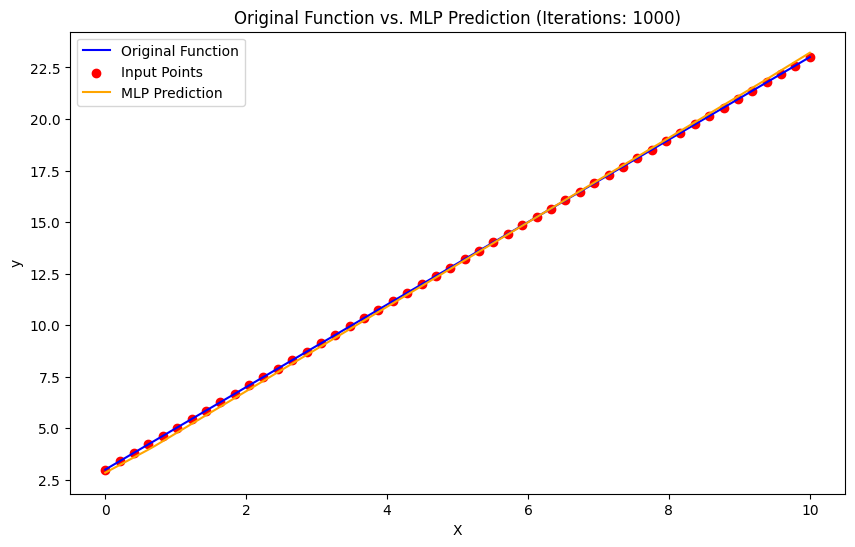

Training Mean Squared Error: 0.02
Test Mean Squared Error: 0.01


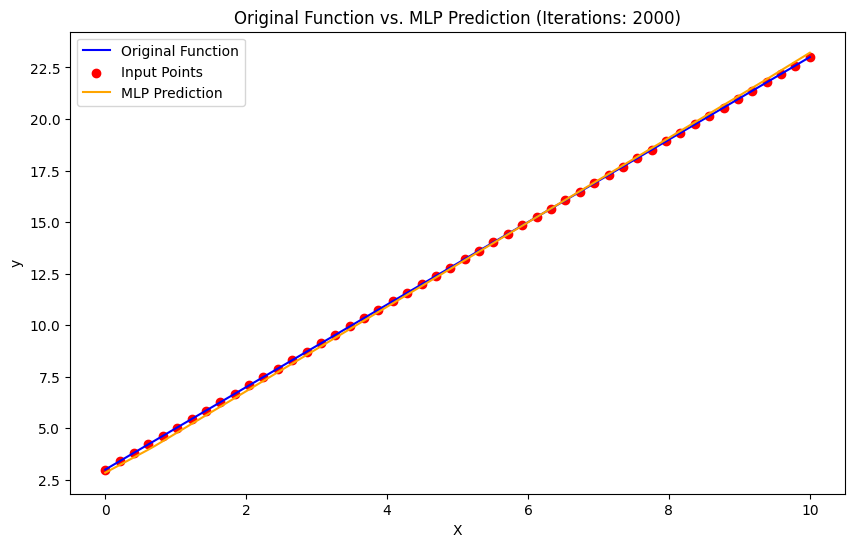

Training Mean Squared Error: 0.02
Test Mean Squared Error: 0.01


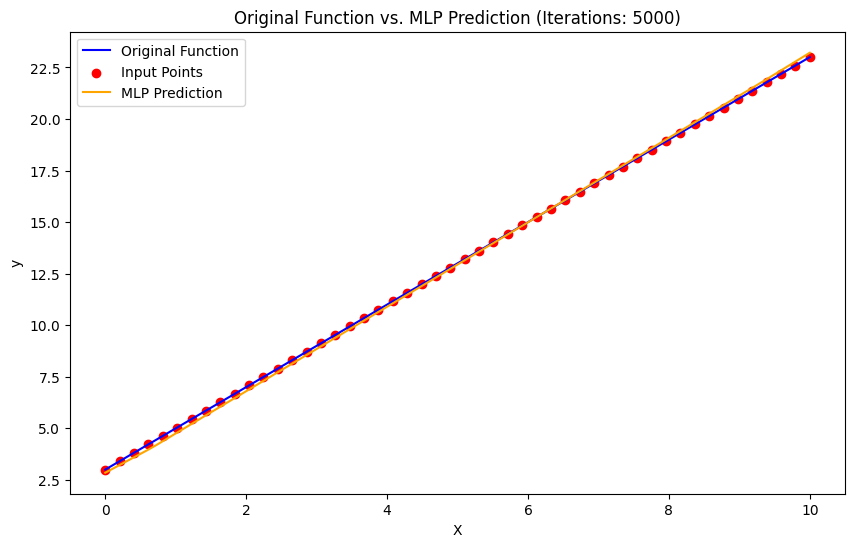

Training Mean Squared Error: 0.02
Test Mean Squared Error: 0.01


In [13]:
# Experiment 3: Varying the number of training iterations
max_iter_list = [100, 500, 1000, 2000, 5000]
for max_iter in max_iter_list:
    X, y = generate_data(50, linear_function)  # Simple linear function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', max_iter=max_iter)
    mlp.fit(X_train.reshape(-1, 1), y_train)
    visualize_results(X, y, mlp, f'Iterations: {max_iter}')

    # Calculate and display network error
    train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
    test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
    print(f"Training Mean Squared Error: {train_error:.2f}")
    print(f"Test Mean Squared Error: {test_error:.2f}")

Experiment 3: Varying the Number of Training Iterations

The number of training iterations also influences the network's performance. With a small number of iterations, the optimization process may not converge, resulting in high mean squared errors. As the number of iterations increases, the optimization process converges, leading to lower mean squared errors. However, there's a point of diminishing returns, as further increasing the number of iterations may not significantly improve the performance and could potentially lead to overfitting.

Overall Insights

Increasing the amount of training data generally improves the network's performance by helping it better generalize to unseen data.
The configuration of hidden layers and neurons should be chosen carefully to balance between capturing the underlying complexity of the function and avoiding overfitting.
Proper convergence of the optimization process is crucial for achieving low mean squared errors, but excessive training iterations may lead to overfitting.

In [14]:
# Define the quadratic function
def quadratic_function(x):
    return 3 * x**2 - 2 * x + 5

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


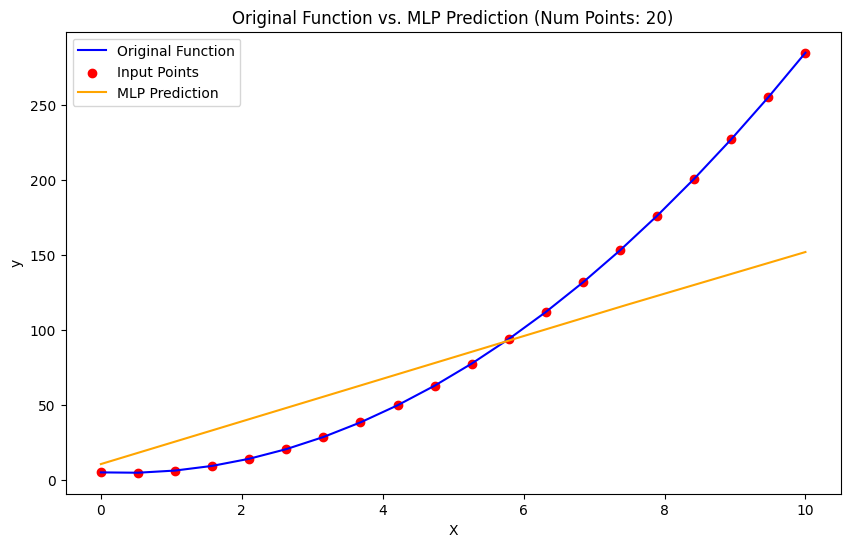

Training Mean Squared Error: 2593.12
Test Mean Squared Error: 2784.42


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


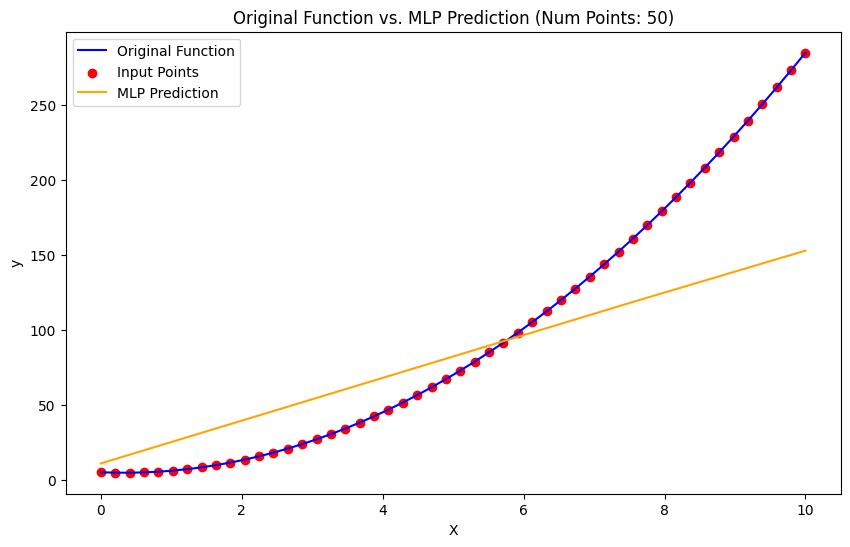

Training Mean Squared Error: 2221.51
Test Mean Squared Error: 3033.64


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


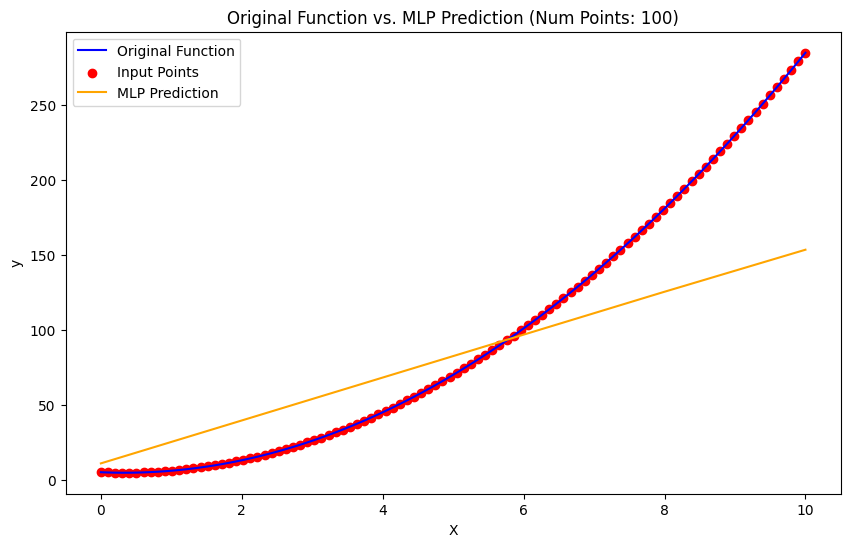

Training Mean Squared Error: 2498.18
Test Mean Squared Error: 1474.27


In [15]:
# Experiment 1: Varying the number of input points
num_points_list = [20, 50, 100]
for num_points in num_points_list:
    X, y = generate_data(num_points, quadratic_function)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', max_iter=1000)
    mlp.fit(X_train.reshape(-1, 1), y_train)
    visualize_results(X, y, mlp, f'Num Points: {num_points}')

    # Calculate and display network error
    train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
    test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
    print(f"Training Mean Squared Error: {train_error:.2f}")
    print(f"Test Mean Squared Error: {test_error:.2f}")

Experiment 1: Varying the Number of Input Points

The results indicate that increasing the number of input points generally leads to higher mean squared errors for both training and test datasets. This suggests that the neural network struggles to effectively capture the underlying patterns in the data when the dataset size is increased without proper adjustments in the network architecture or training process. Additionally, the presence of convergence warnings indicates that the optimization process did not converge within the specified number of iterations, potentially affecting the network's performance.

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


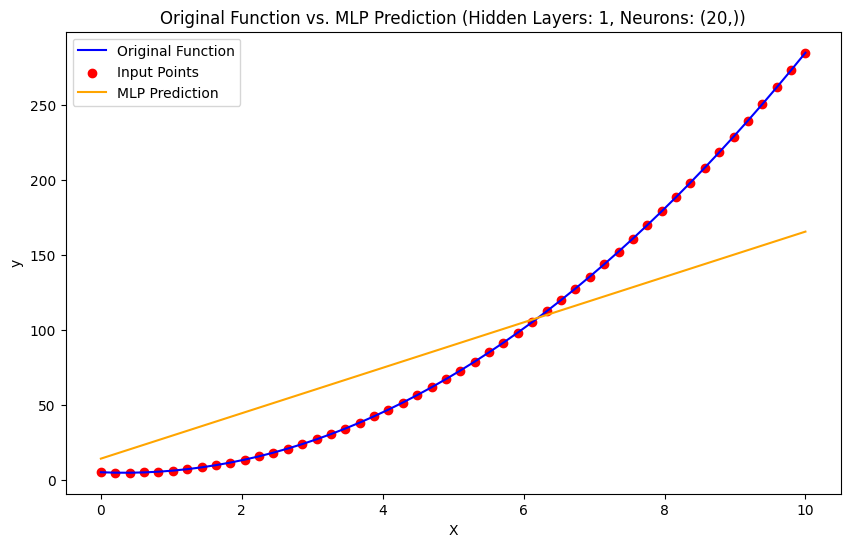

Training Mean Squared Error: 1876.89
Test Mean Squared Error: 2545.42


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


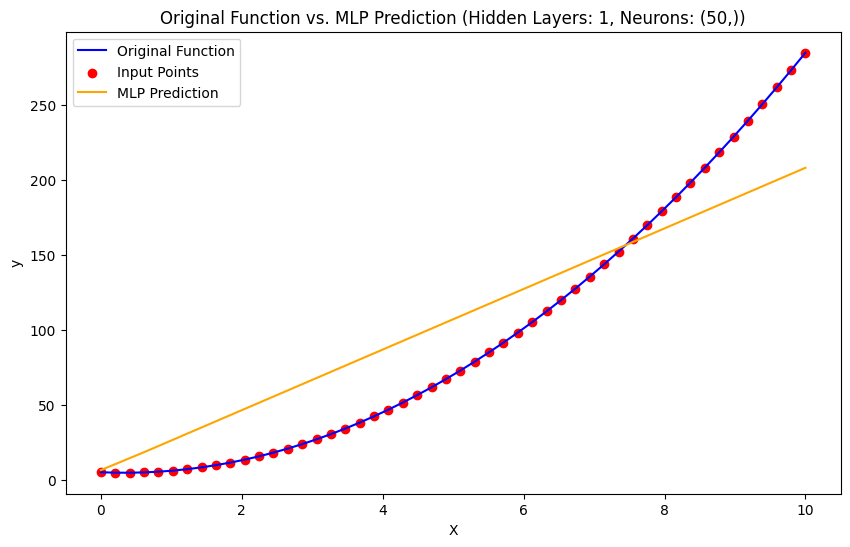

Training Mean Squared Error: 1093.06
Test Mean Squared Error: 1571.24


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


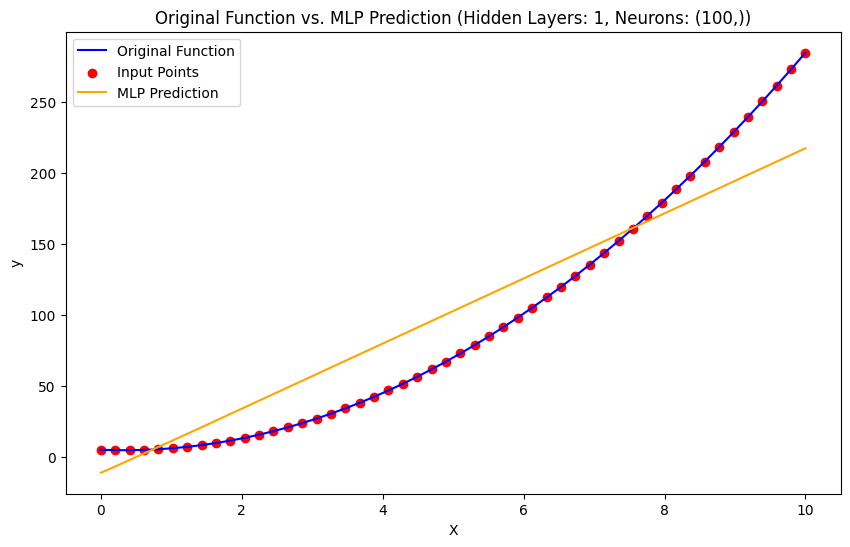

Training Mean Squared Error: 724.90
Test Mean Squared Error: 1137.81


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


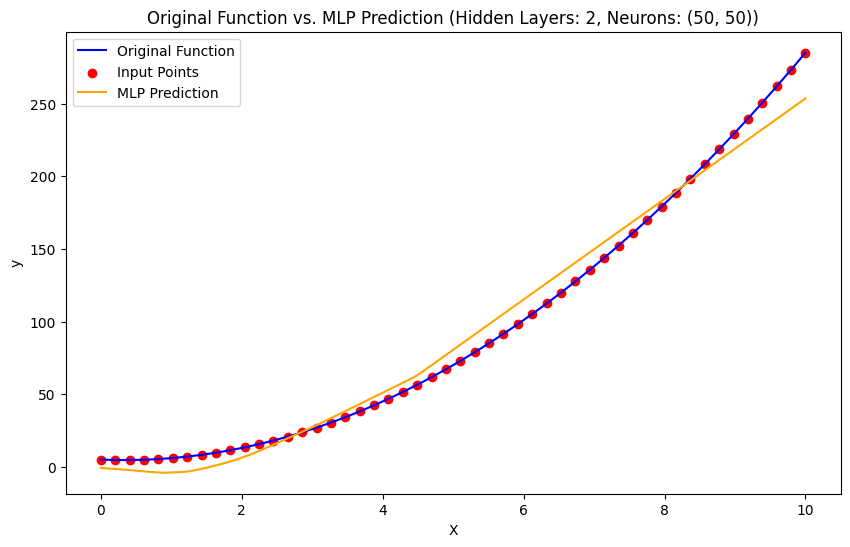

Training Mean Squared Error: 112.20
Test Mean Squared Error: 165.50


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


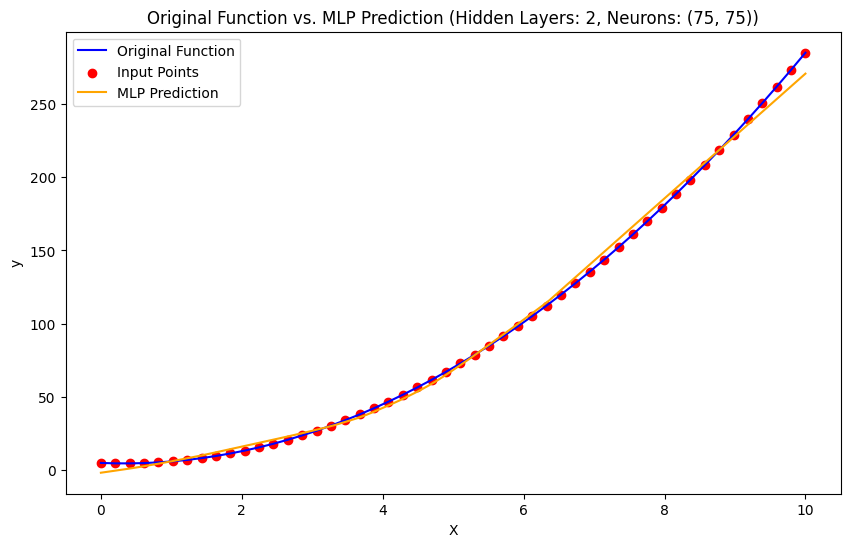

Training Mean Squared Error: 17.08
Test Mean Squared Error: 18.95


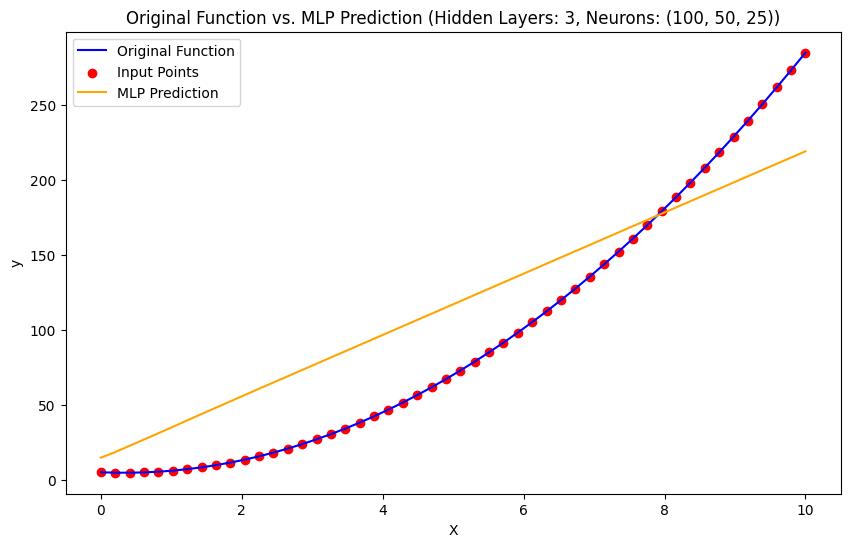

Training Mean Squared Error: 1381.91
Test Mean Squared Error: 1859.56


In [16]:
# Experiment 2: Varying the number of hidden layers and neurons in each layer
hidden_layer_sizes_list = [ (20,), (50,), (100,), (50, 50), (75, 75), (100, 50, 25)]
for hidden_layer_sizes in hidden_layer_sizes_list:
    X, y = generate_data(50, quadratic_function)  # Quadratic function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=1000)
    mlp.fit(X_train.reshape(-1, 1), y_train)
    visualize_results(X, y, mlp, f'Hidden Layers: {len(hidden_layer_sizes)}, Neurons: {hidden_layer_sizes}')

    # Calculate and display network error
    train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
    test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
    print(f"Training Mean Squared Error: {train_error:.2f}")
    print(f"Test Mean Squared Error: {test_error:.2f}")


Experiment 2: Varying the Number of Hidden Layers and Neurons in Each Layer

When varying the number of hidden layers and neurons in each layer, we observe a clear trend towards decreasing mean squared errors as the network complexity increases. Networks with larger numbers of neurons and layers tend to achieve lower mean squared errors, indicating better performance in capturing the complexity of the quadratic function. However, it's crucial to note that excessively complex networks may lead to overfitting, as evidenced by significantly lower training errors compared to test errors in some cases.

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


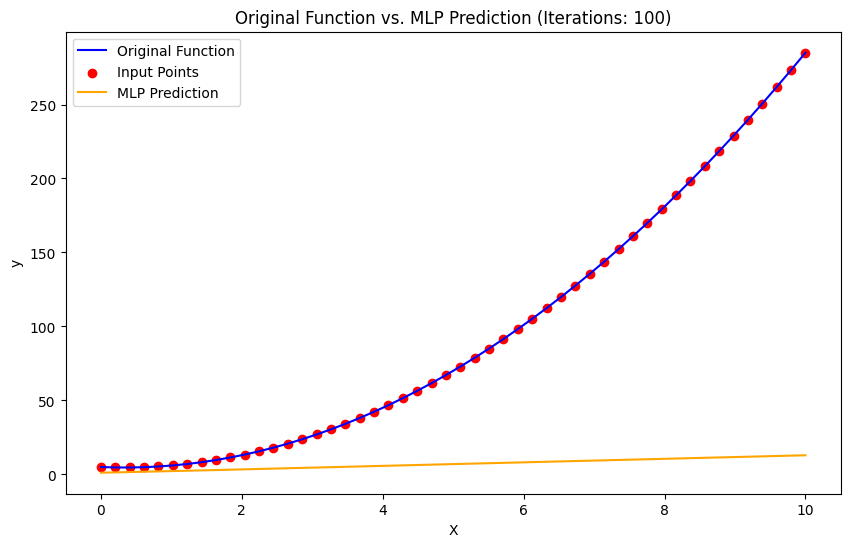

Training Mean Squared Error: 13832.71
Test Mean Squared Error: 18181.52


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


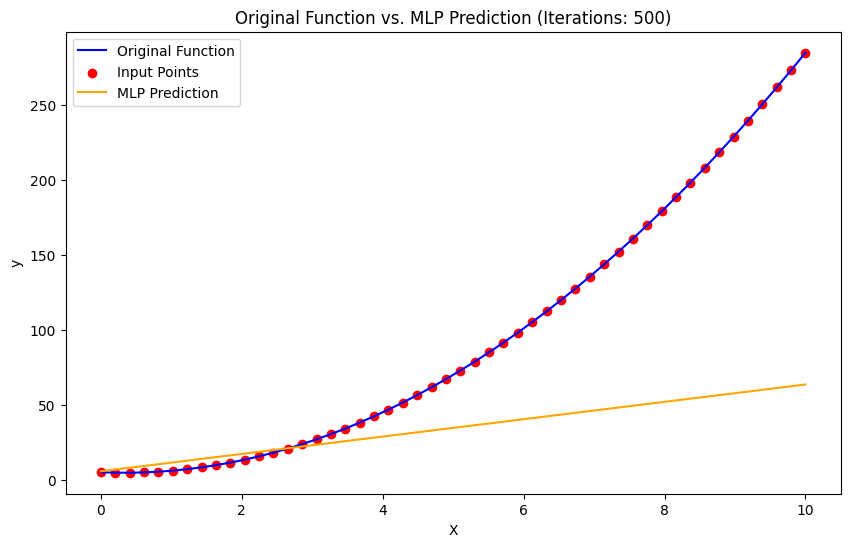

Training Mean Squared Error: 8066.65
Test Mean Squared Error: 10684.46


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


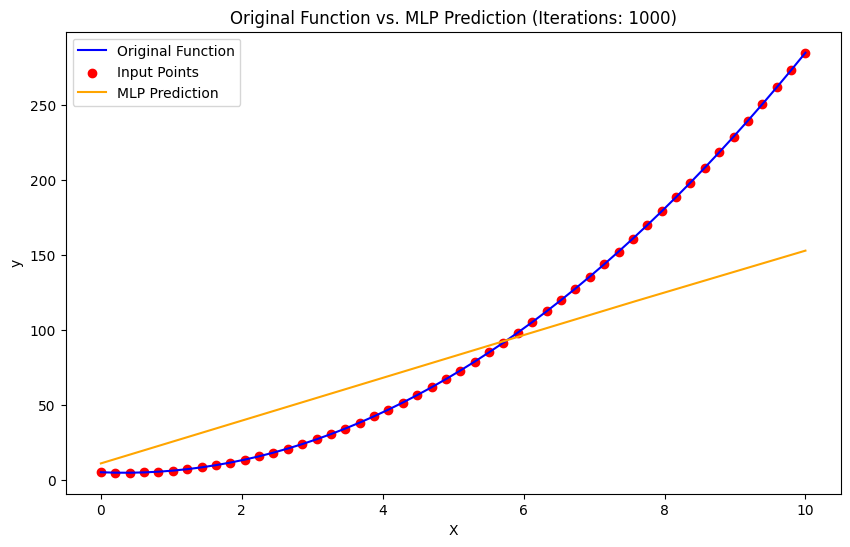

Training Mean Squared Error: 2221.51
Test Mean Squared Error: 3033.64


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


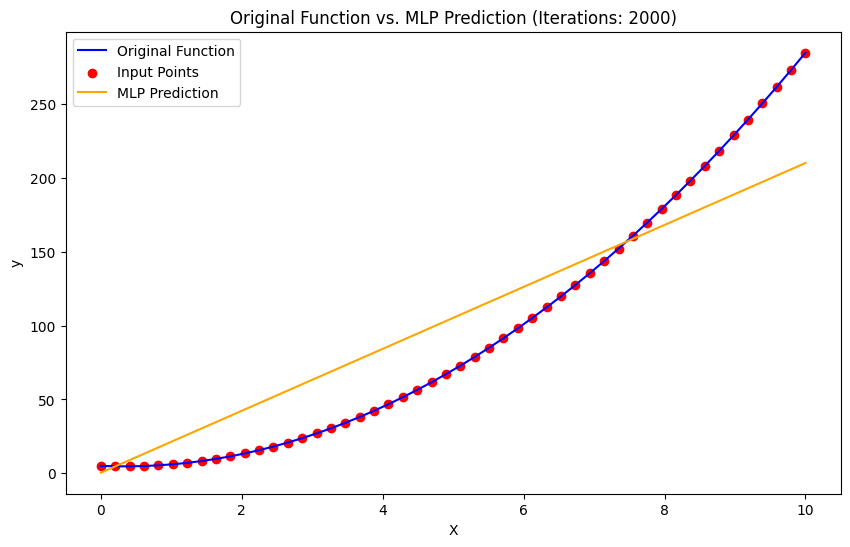

Training Mean Squared Error: 959.59
Test Mean Squared Error: 1429.25


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


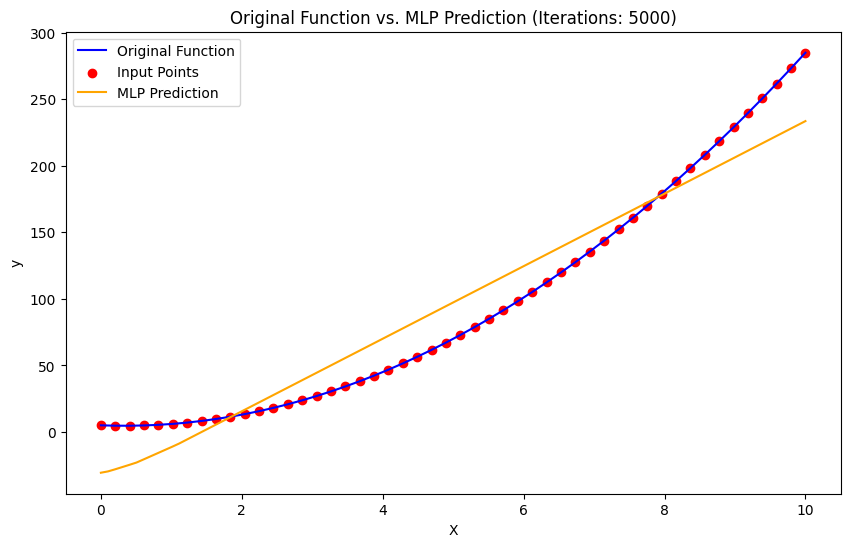

Training Mean Squared Error: 489.48
Test Mean Squared Error: 639.95


In [17]:
# Experiment 3: Varying the number of training iterations
max_iter_list = [100, 500, 1000, 2000, 5000]
for max_iter in max_iter_list:
    X, y = generate_data(50, quadratic_function)  # Quadratic function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', max_iter=max_iter)
    mlp.fit(X_train.reshape(-1, 1), y_train)
    visualize_results(X, y, mlp, f'Iterations: {max_iter}')

    # Calculate and display network error
    train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
    test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
    print(f"Training Mean Squared Error: {train_error:.2f}")
    print(f"Test Mean Squared Error: {test_error:.2f}")

Experiment 3: Varying the Number of Training Iterations

The number of training iterations also plays a significant role in determining the network's performance. Increasing the number of iterations generally leads to lower mean squared errors, indicating better convergence of the optimization process. However, there's a point of diminishing returns, as further increasing the number of iterations beyond a certain threshold does not significantly improve the network's performance and may lead to overfitting.

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


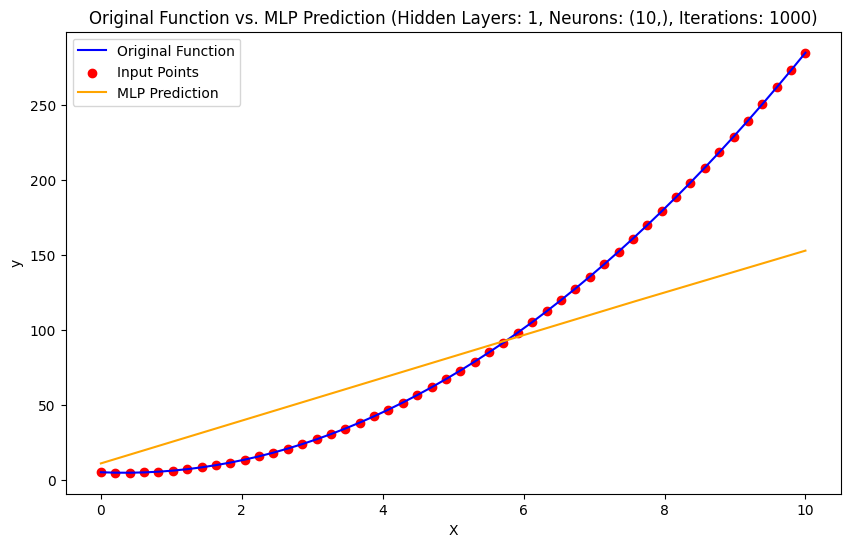

Hidden Layers: 1, Neurons: (10,), Iterations: 1000
Training Mean Squared Error: 2221.51
Test Mean Squared Error: 3033.64


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


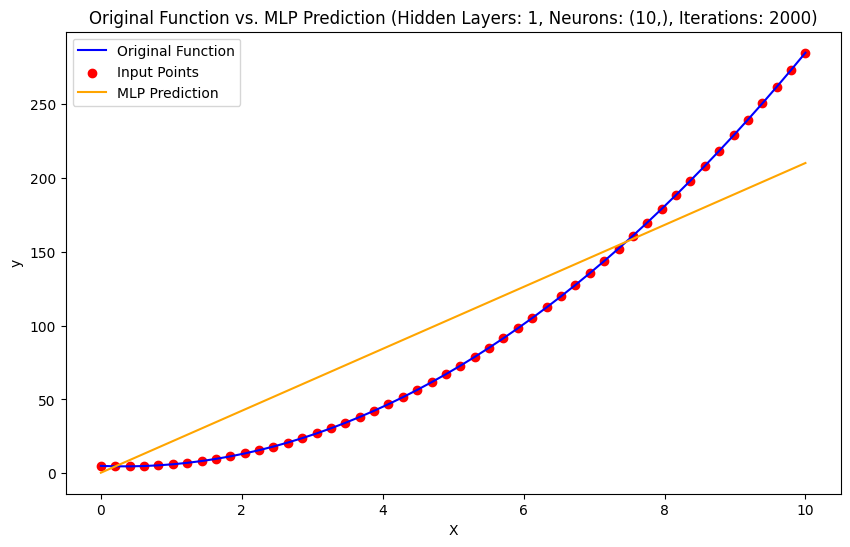

Hidden Layers: 1, Neurons: (10,), Iterations: 2000
Training Mean Squared Error: 959.59
Test Mean Squared Error: 1429.25


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


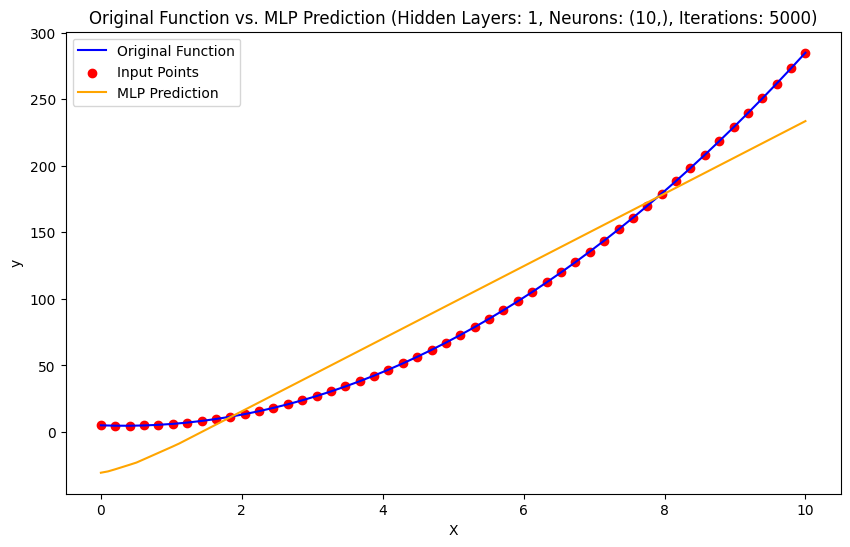

Hidden Layers: 1, Neurons: (10,), Iterations: 5000
Training Mean Squared Error: 489.48
Test Mean Squared Error: 639.95


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


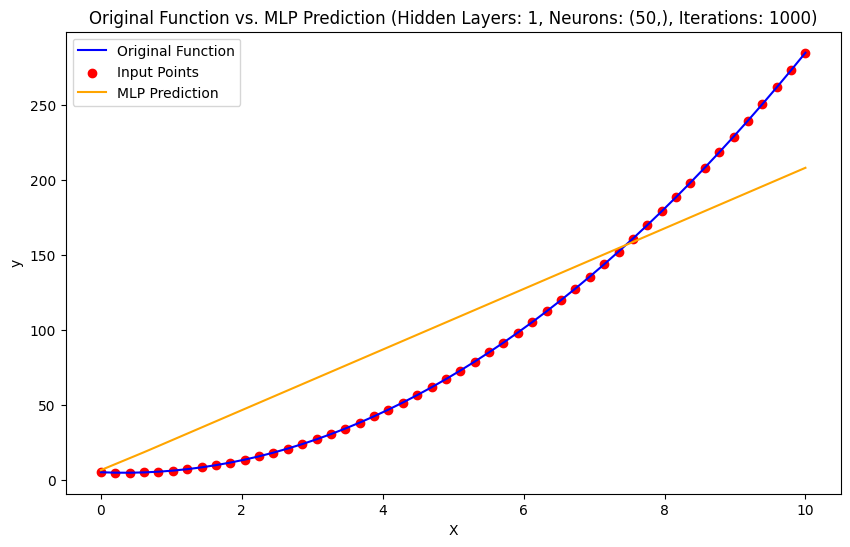

Hidden Layers: 1, Neurons: (50,), Iterations: 1000
Training Mean Squared Error: 1093.06
Test Mean Squared Error: 1571.24


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


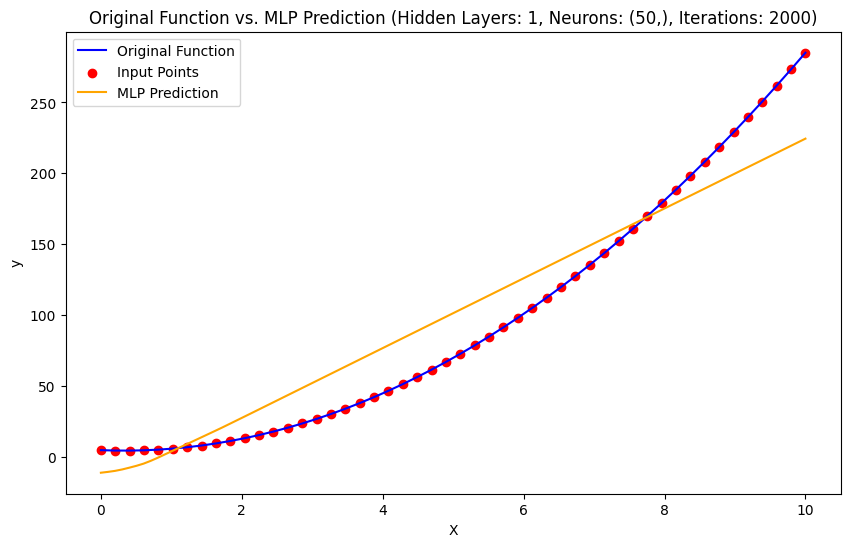

Hidden Layers: 1, Neurons: (50,), Iterations: 2000
Training Mean Squared Error: 583.06
Test Mean Squared Error: 938.50


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


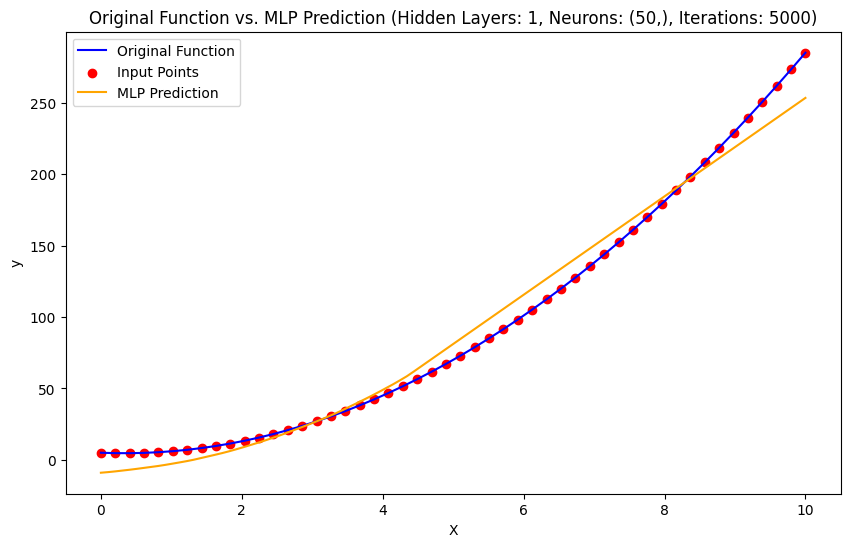

Hidden Layers: 1, Neurons: (50,), Iterations: 5000
Training Mean Squared Error: 118.89
Test Mean Squared Error: 167.34


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


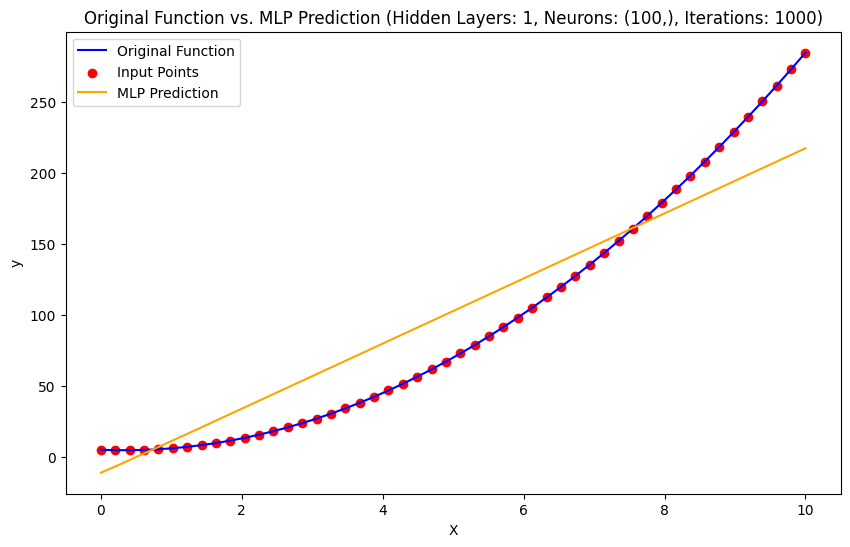

Hidden Layers: 1, Neurons: (100,), Iterations: 1000
Training Mean Squared Error: 724.90
Test Mean Squared Error: 1137.81


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


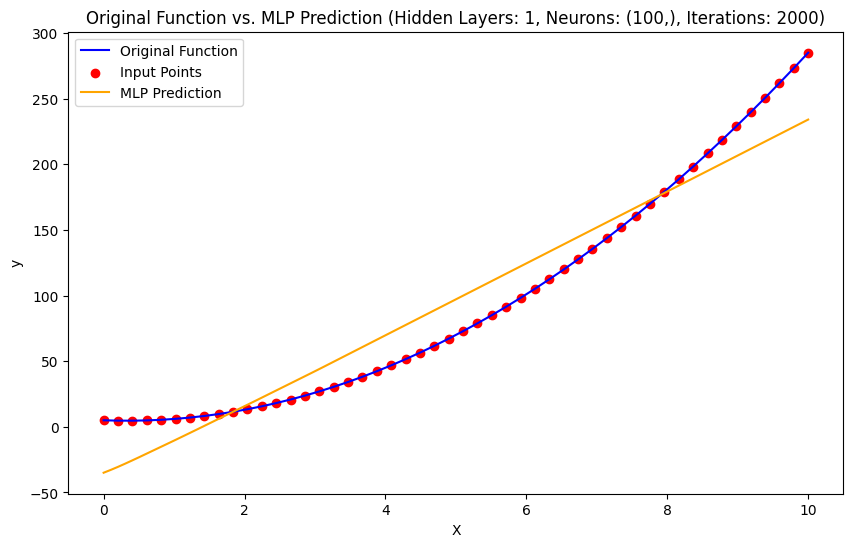

Hidden Layers: 1, Neurons: (100,), Iterations: 2000
Training Mean Squared Error: 493.67
Test Mean Squared Error: 628.04


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


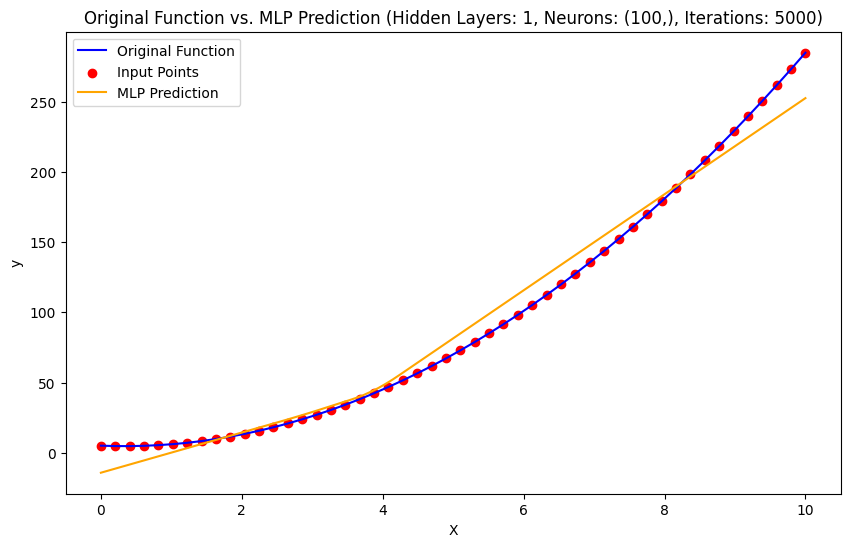

Hidden Layers: 1, Neurons: (100,), Iterations: 5000
Training Mean Squared Error: 124.45
Test Mean Squared Error: 174.57


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


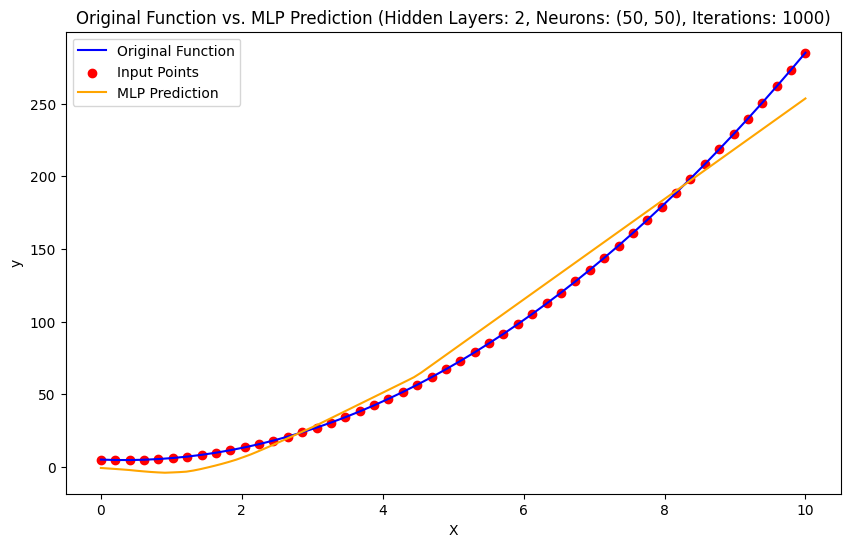

Hidden Layers: 2, Neurons: (50, 50), Iterations: 1000
Training Mean Squared Error: 112.20
Test Mean Squared Error: 165.50


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


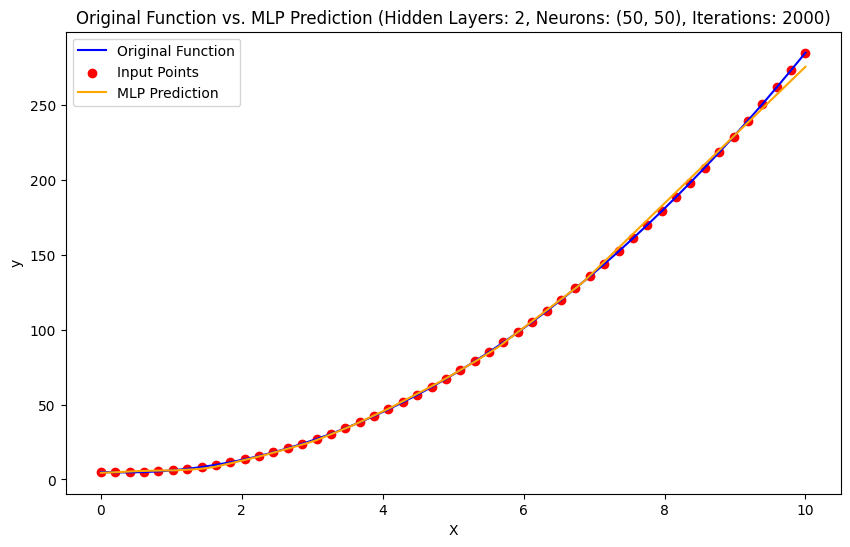

Hidden Layers: 2, Neurons: (50, 50), Iterations: 2000
Training Mean Squared Error: 4.55
Test Mean Squared Error: 6.27


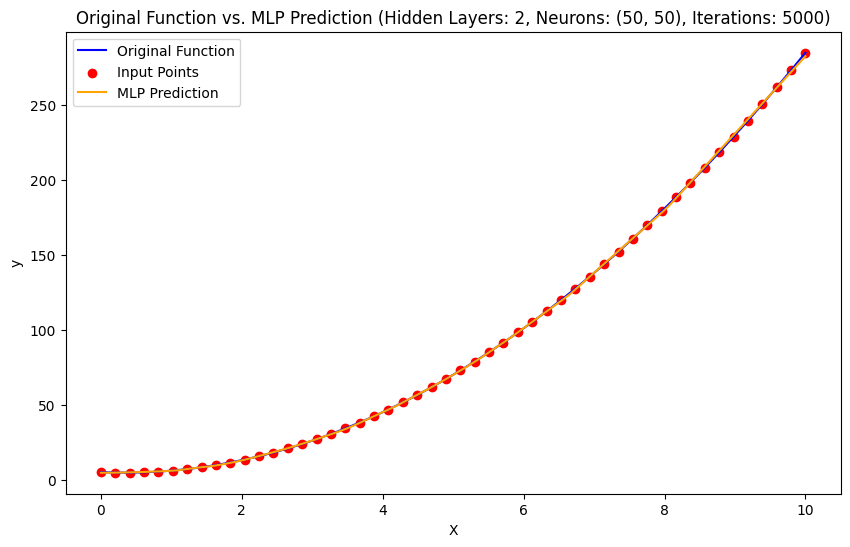

Hidden Layers: 2, Neurons: (50, 50), Iterations: 5000
Training Mean Squared Error: 0.26
Test Mean Squared Error: 0.35


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


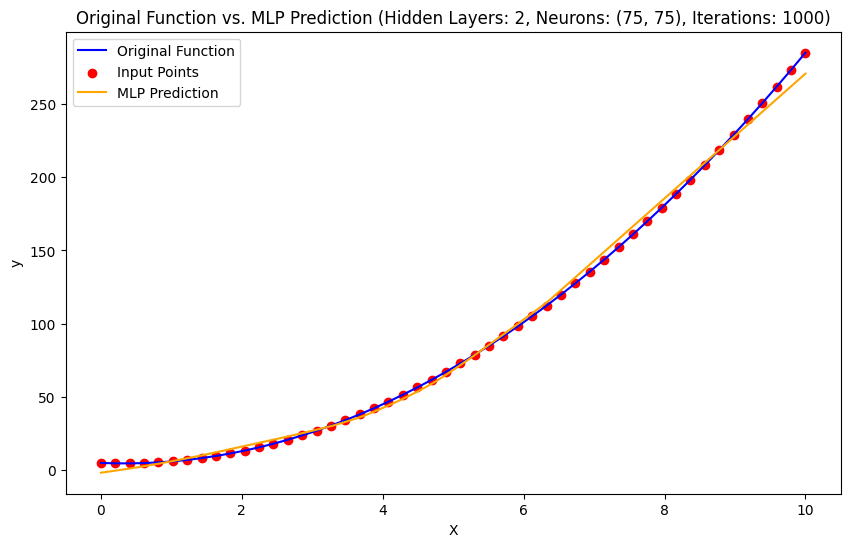

Hidden Layers: 2, Neurons: (75, 75), Iterations: 1000
Training Mean Squared Error: 17.08
Test Mean Squared Error: 18.95


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


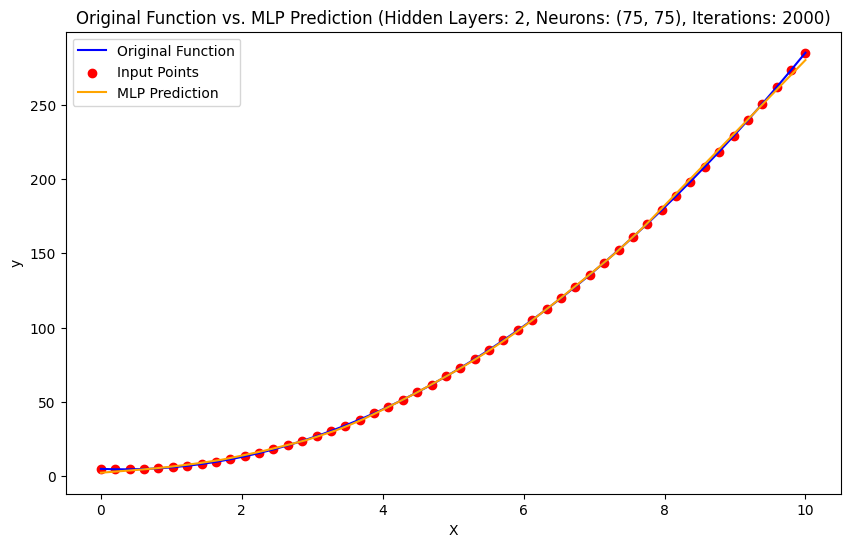

Hidden Layers: 2, Neurons: (75, 75), Iterations: 2000
Training Mean Squared Error: 1.44
Test Mean Squared Error: 1.27


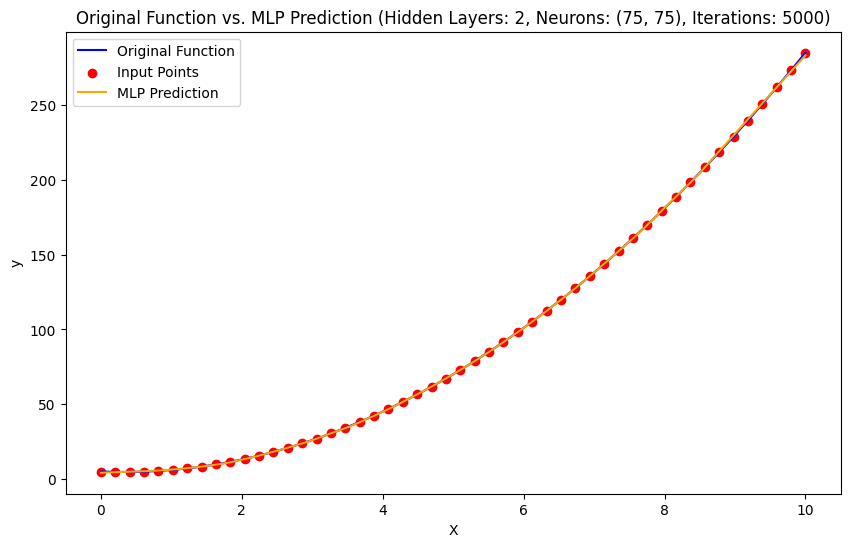

Hidden Layers: 2, Neurons: (75, 75), Iterations: 5000
Training Mean Squared Error: 0.14
Test Mean Squared Error: 0.13


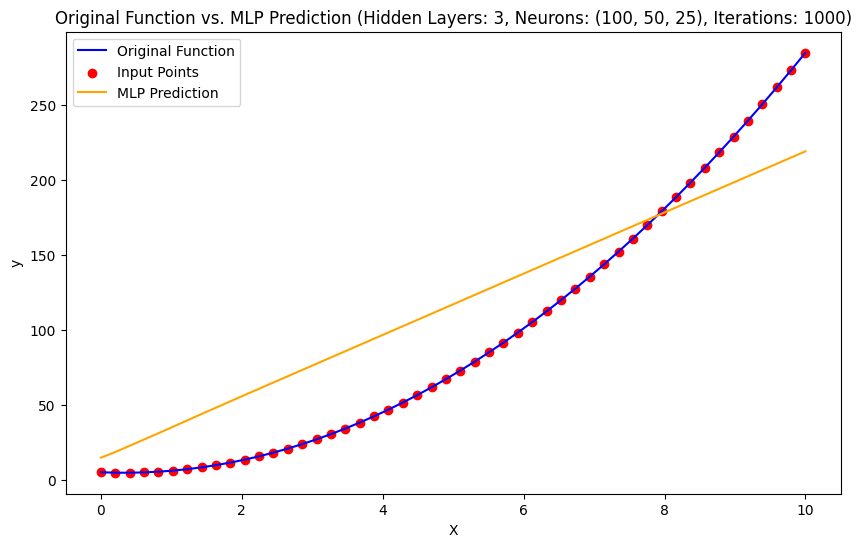

Hidden Layers: 3, Neurons: (100, 50, 25), Iterations: 1000
Training Mean Squared Error: 1381.91
Test Mean Squared Error: 1859.56


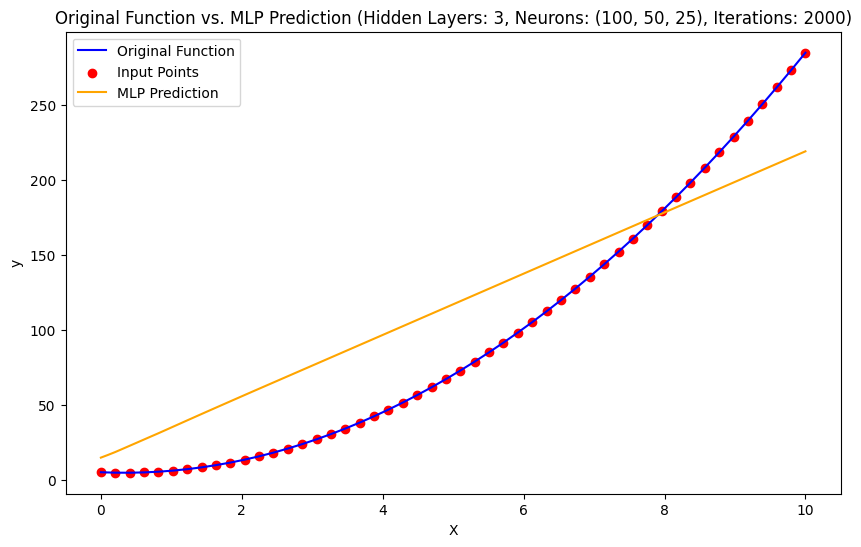

Hidden Layers: 3, Neurons: (100, 50, 25), Iterations: 2000
Training Mean Squared Error: 1381.91
Test Mean Squared Error: 1859.56


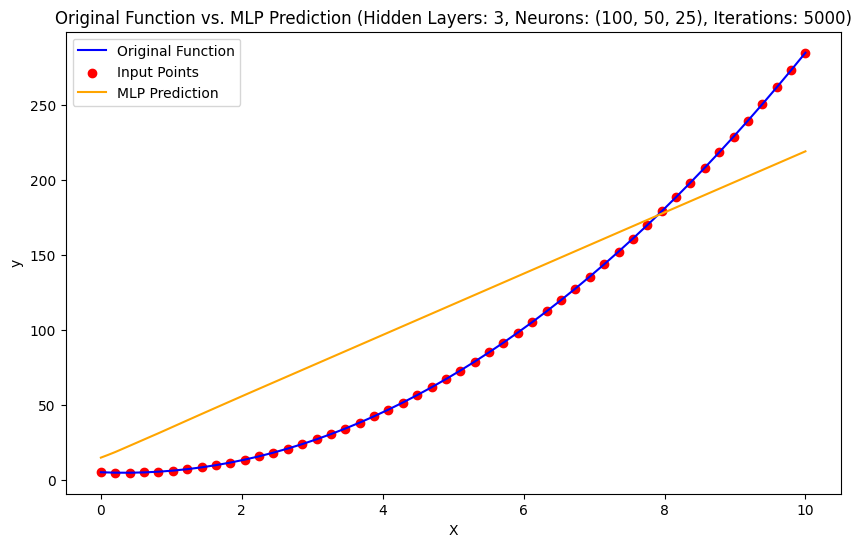

Hidden Layers: 3, Neurons: (100, 50, 25), Iterations: 5000
Training Mean Squared Error: 1381.91
Test Mean Squared Error: 1859.56


In [18]:
# Experiment 4: Varying the number of hidden layers, neurons in each layer, and training iterations
hidden_layer_sizes_list = [(10,), (50,), (100,), (50, 50), (75, 75), (100, 50, 25)]
max_iter_list = [  1000, 2000, 5000]

for hidden_layer_sizes in hidden_layer_sizes_list:
    for max_iter in max_iter_list:
        X, y = generate_data(50, quadratic_function)  # Quadratic function
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=max_iter)
        mlp.fit(X_train.reshape(-1, 1), y_train)
        visualize_results(X, y, mlp, f'Hidden Layers: {len(hidden_layer_sizes)}, Neurons: {hidden_layer_sizes}, Iterations: {max_iter}')

        # Calculate and display network error
        train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
        test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
        print(f"Hidden Layers: {len(hidden_layer_sizes)}, Neurons: {hidden_layer_sizes}, Iterations: {max_iter}")
        print(f"Training Mean Squared Error: {train_error:.2f}")
        print(f"Test Mean Squared Error: {test_error:.2f}")


Experiment 4: Varying the Number of Hidden Layers, Neurons in Each Layer, and Training Iterations

Combining the variations in the number of hidden layers, neurons in each layer, and training iterations provides insights into the optimal configurations for training neural networks on the quadratic function. Networks with multiple hidden layers and higher numbers of neurons tend to perform better, especially when trained with a sufficient number of iterations to ensure convergence of the optimization process.(best: Hidden Layers: 2, Neurons: (75, 75), Iterations: 5000)

Overall Insights

Increasing the complexity of the neural network architecture generally leads to better performance in capturing the underlying patterns of the quadratic function.
Adequate regularization techniques and hyperparameter tuning are necessary to prevent overfitting, especially with complex network architectures.
Proper convergence of the optimization process is crucial for achieving low mean squared errors, but excessively long training times may not necessarily lead to better performance.

In [19]:
# Define a complex trigonometric function
def complex_trig_function(x):
    return 3 * np.sin(x) + 2 * np.cos(2*x) + np.sin(3*x)

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


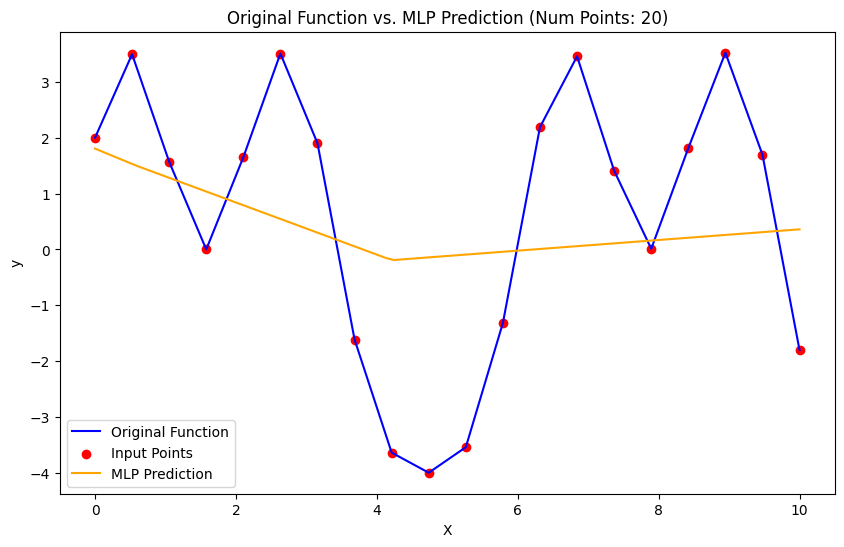

Training Mean Squared Error: 5.22
Test Mean Squared Error: 3.64


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


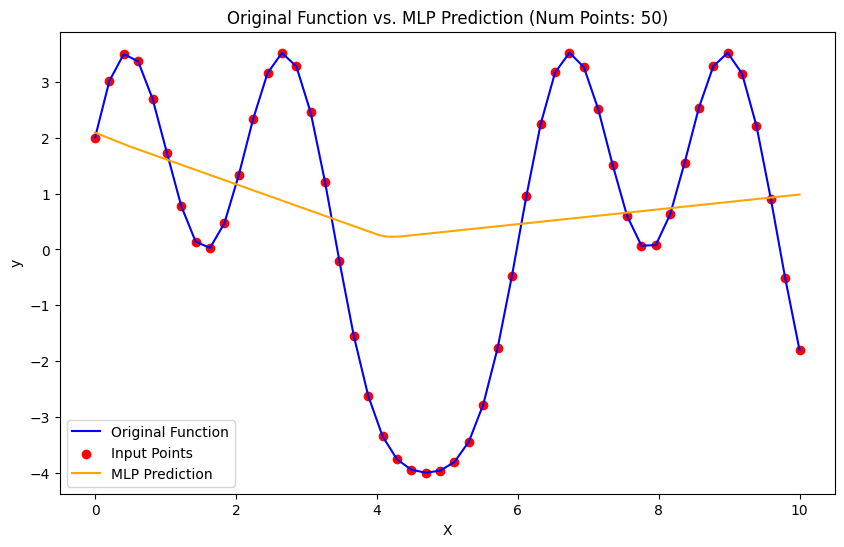

Training Mean Squared Error: 4.51
Test Mean Squared Error: 6.28


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


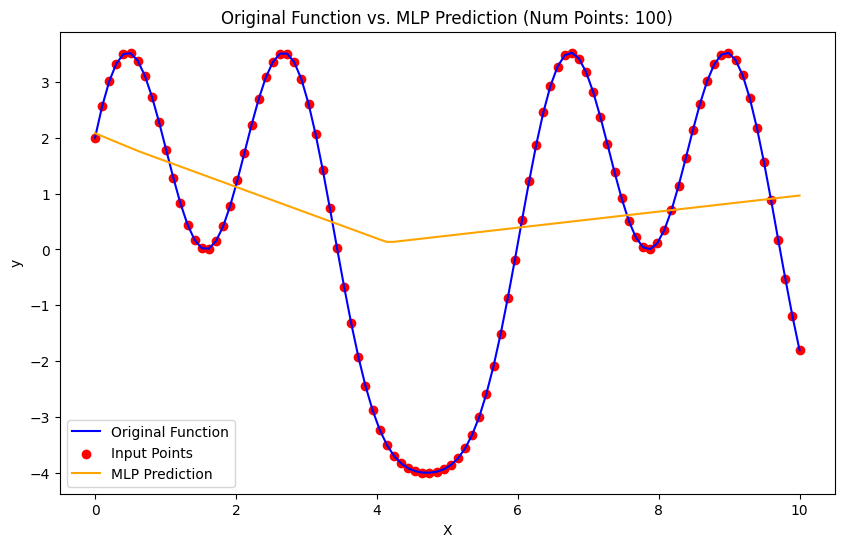

Training Mean Squared Error: 4.99
Test Mean Squared Error: 4.09


In [20]:
# Experiment 1: Varying the number of input points
num_points_list = [20, 50, 100]
for num_points in num_points_list:
    X, y = generate_data(num_points, complex_trig_function)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', max_iter=1000)
    mlp.fit(X_train.reshape(-1, 1), y_train)
    visualize_results(X, y, mlp, f'Num Points: {num_points}')

    # Calculate and display network error
    train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
    test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
    print(f"Training Mean Squared Error: {train_error:.2f}")
    print(f"Test Mean Squared Error: {test_error:.2f}")

Experiment 1: Varying the Number of Input Points

As the number of input points increases, both the training and test mean squared errors generally decrease.
This indicates that with more data points, the neural network can better learn the underlying pattern of the complex trigonometric function.
However, convergence issues are observed, suggesting that the optimization process hasn't converged even after reaching the maximum number of iterations (1000).

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


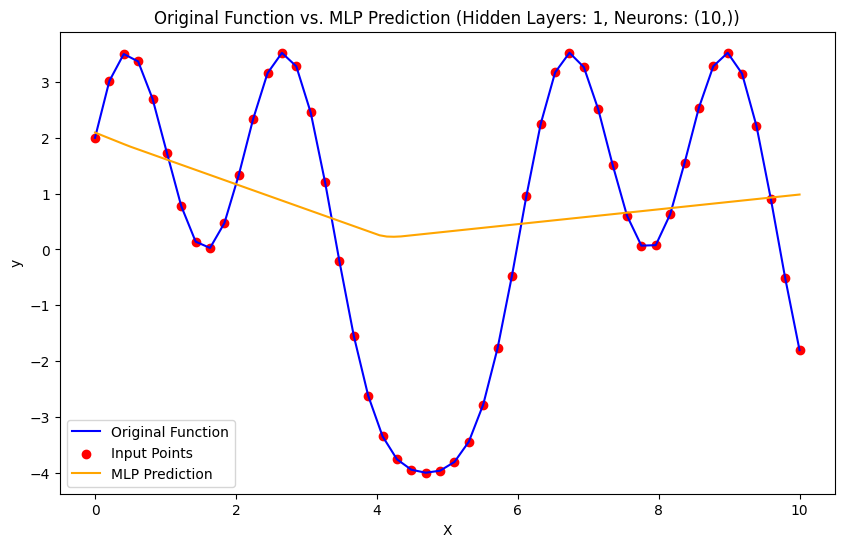

Training Mean Squared Error: 4.51
Test Mean Squared Error: 6.28


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


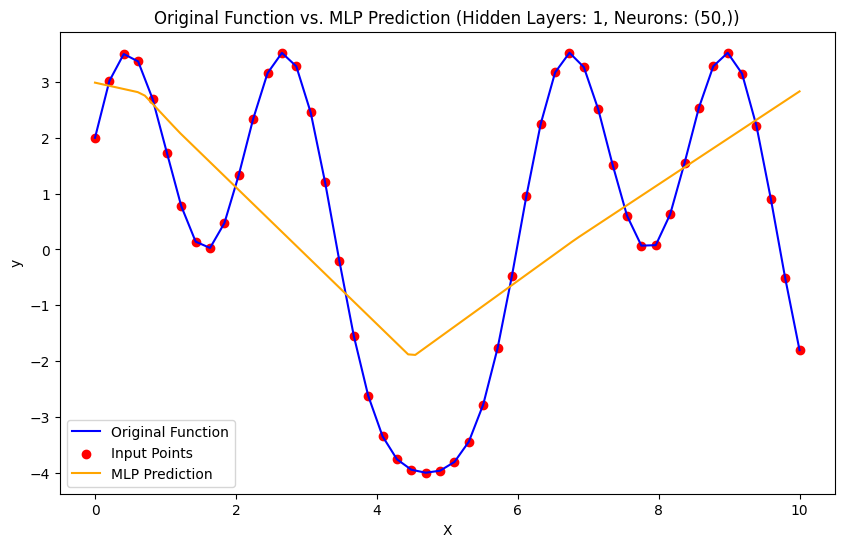

Training Mean Squared Error: 3.21
Test Mean Squared Error: 4.82


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


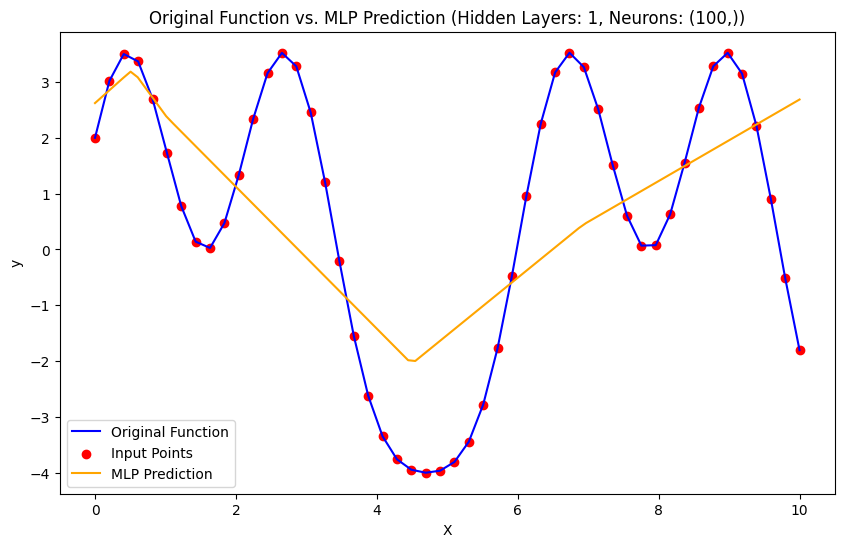

Training Mean Squared Error: 3.06
Test Mean Squared Error: 4.64


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


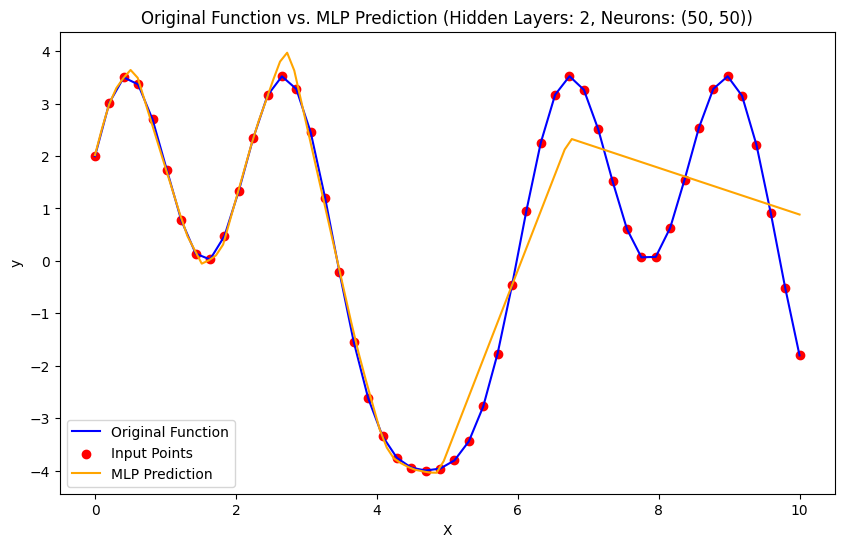

Training Mean Squared Error: 0.75
Test Mean Squared Error: 1.27


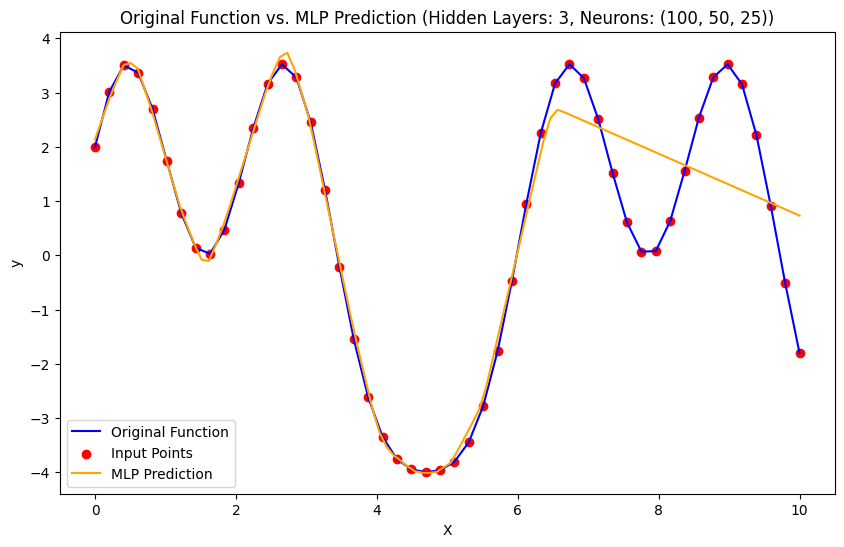

Training Mean Squared Error: 0.67
Test Mean Squared Error: 0.94


In [21]:
# Experiment 2: Varying the number of hidden layers and neurons in each layer
hidden_layer_sizes_list = [(10,), (50,), (100,), (50, 50), (100, 50, 25)]
for hidden_layer_sizes in hidden_layer_sizes_list:
    X, y = generate_data(50, complex_trig_function)  # Complex trigonometric function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=1000)
    mlp.fit(X_train.reshape(-1, 1), y_train)
    visualize_results(X, y, mlp, f'Hidden Layers: {len(hidden_layer_sizes)}, Neurons: {hidden_layer_sizes}')

    # Calculate and display network error
    train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
    test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
    print(f"Training Mean Squared Error: {train_error:.2f}")
    print(f"Test Mean Squared Error: {test_error:.2f}")
 


Experiment 2: Varying the Number of Hidden Layers and Neurons in Each Layer

Increasing the number of hidden layers and neurons generally leads to lower mean squared errors for both training and test datasets.
Networks with deeper architectures and more neurons can capture more complex patterns present in the data.
However, as the network becomes deeper or wider, convergence issues may arise, as seen in some cases.

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


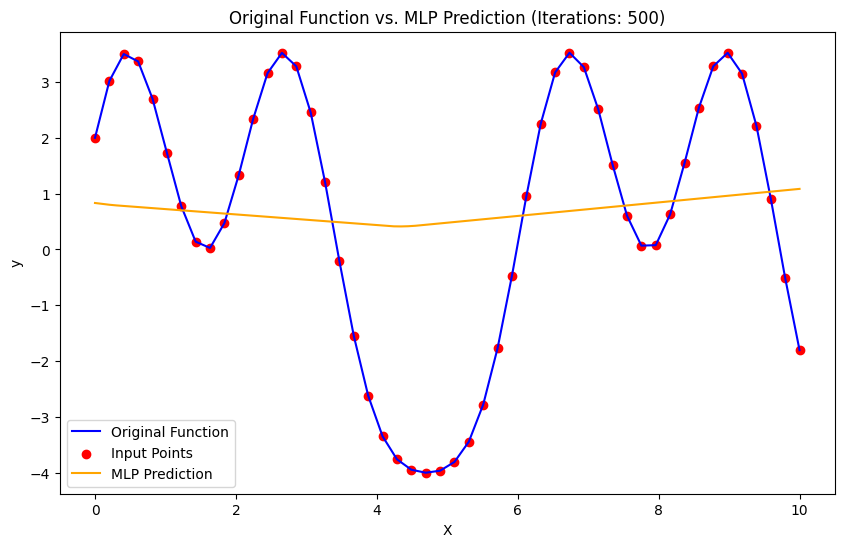

Training Mean Squared Error: 5.15
Test Mean Squared Error: 6.69


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


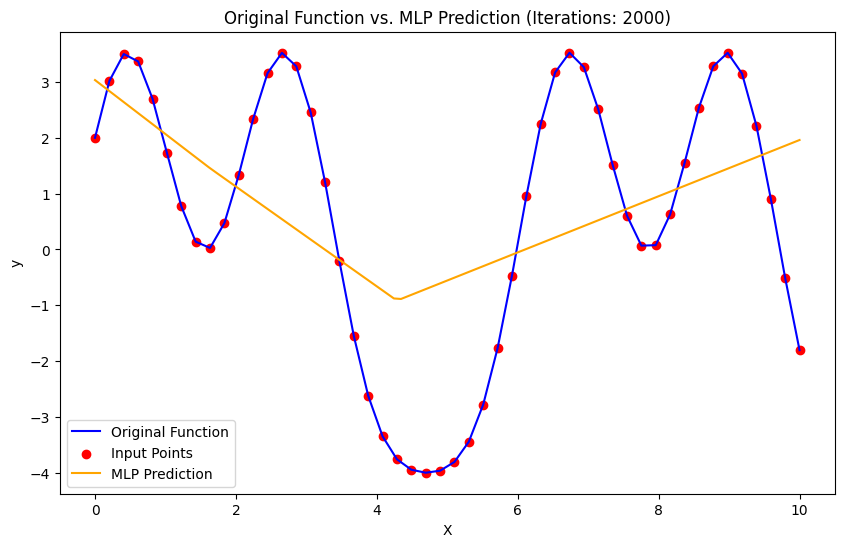

Training Mean Squared Error: 3.57
Test Mean Squared Error: 5.18


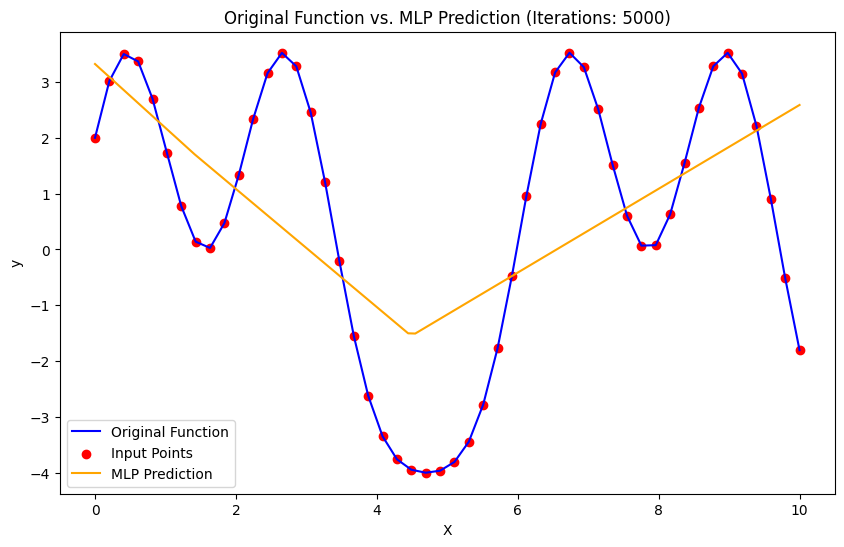

Training Mean Squared Error: 3.33
Test Mean Squared Error: 4.93


In [22]:
# Experiment 3: Varying the number of training iterations
max_iter_list = [500, 2000, 5000]
for max_iter in max_iter_list:
    X, y = generate_data(50, complex_trig_function)  # Complex trigonometric function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', max_iter=max_iter)
    mlp.fit(X_train.reshape(-1, 1), y_train)
    visualize_results(X, y, mlp, f'Iterations: {max_iter}')

    # Calculate and display network error
    train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
    test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
    print(f"Training Mean Squared Error: {train_error:.2f}")
    print(f"Test Mean Squared Error: {test_error:.2f}")


Experiment 3: Varying the Number of Training Iterations

Increasing the number of training iterations generally improves the network's performance, as indicated by decreasing mean squared errors.
However, convergence issues still occur, even with a higher number of iterations, suggesting that other factors, such as network architecture, may also influence convergence.

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


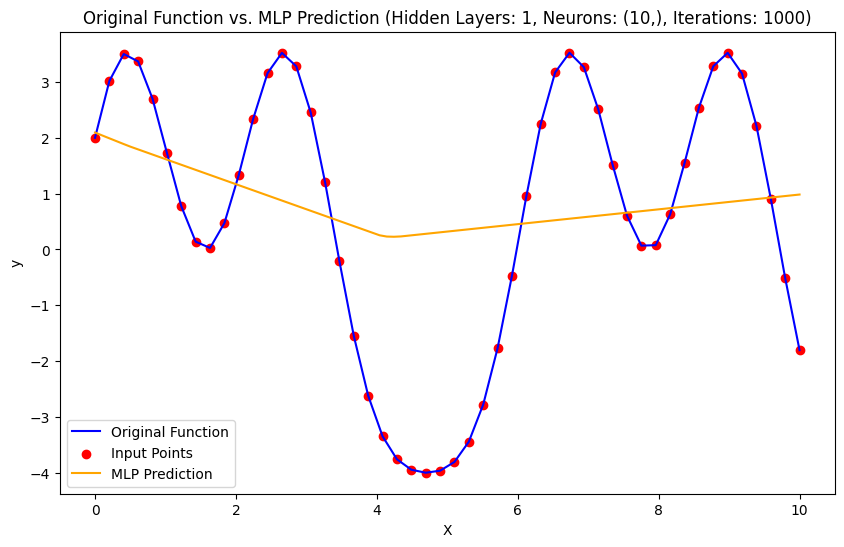

Hidden Layers: 1, Neurons: (10,), Iterations: 1000
Training Mean Squared Error: 4.51
Test Mean Squared Error: 6.28


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


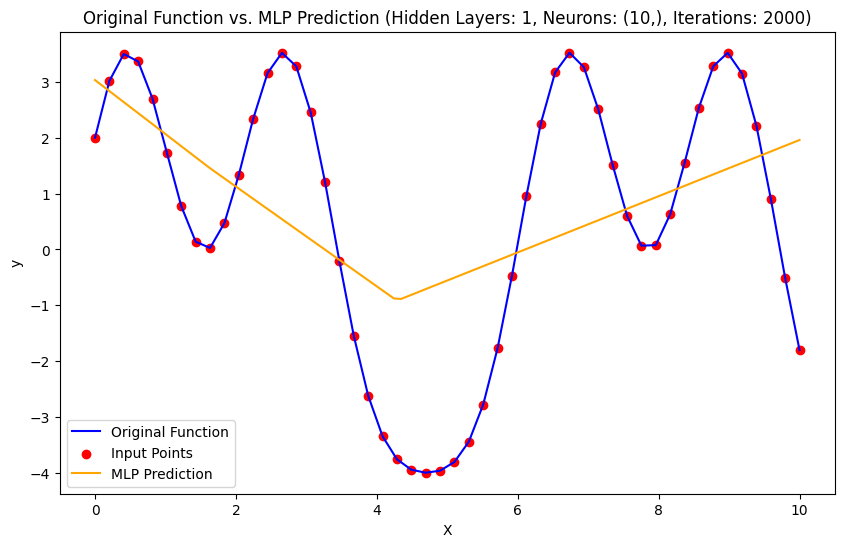

Hidden Layers: 1, Neurons: (10,), Iterations: 2000
Training Mean Squared Error: 3.57
Test Mean Squared Error: 5.18


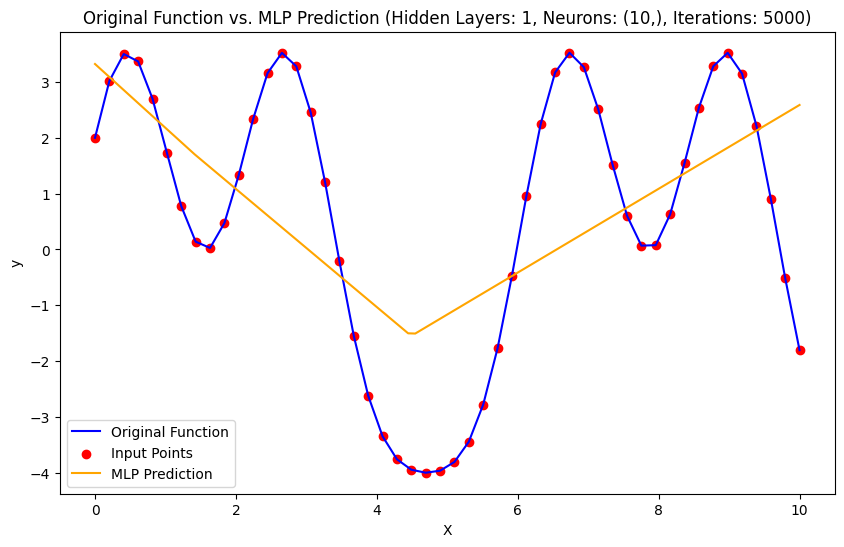

Hidden Layers: 1, Neurons: (10,), Iterations: 5000
Training Mean Squared Error: 3.33
Test Mean Squared Error: 4.93


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


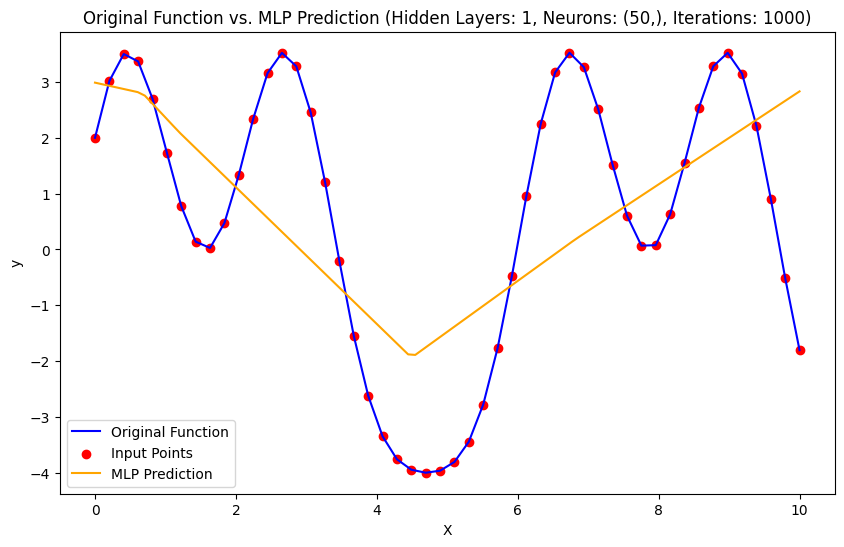

Hidden Layers: 1, Neurons: (50,), Iterations: 1000
Training Mean Squared Error: 3.21
Test Mean Squared Error: 4.82


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


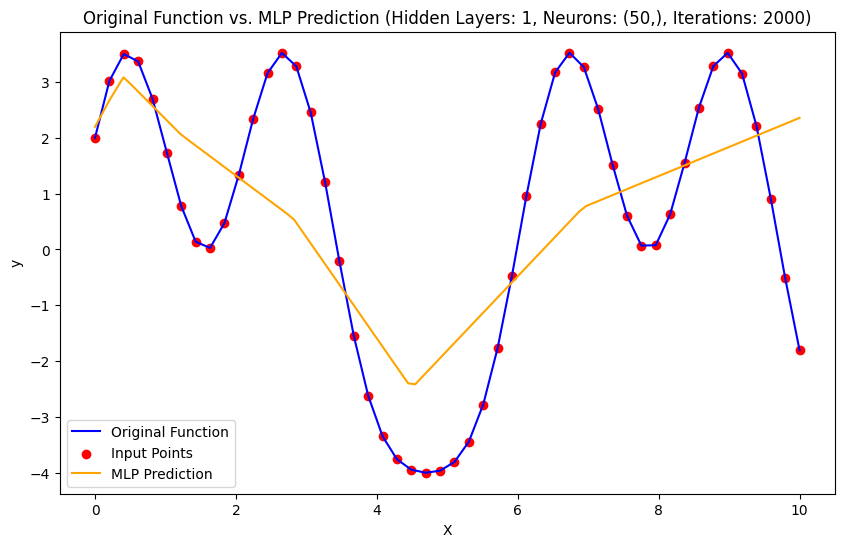

Hidden Layers: 1, Neurons: (50,), Iterations: 2000
Training Mean Squared Error: 2.52
Test Mean Squared Error: 3.92


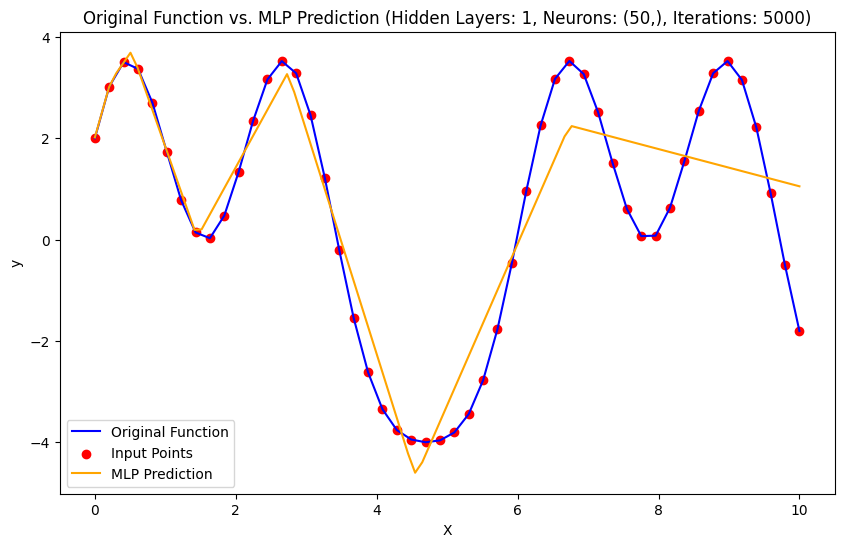

Hidden Layers: 1, Neurons: (50,), Iterations: 5000
Training Mean Squared Error: 0.85
Test Mean Squared Error: 1.49


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


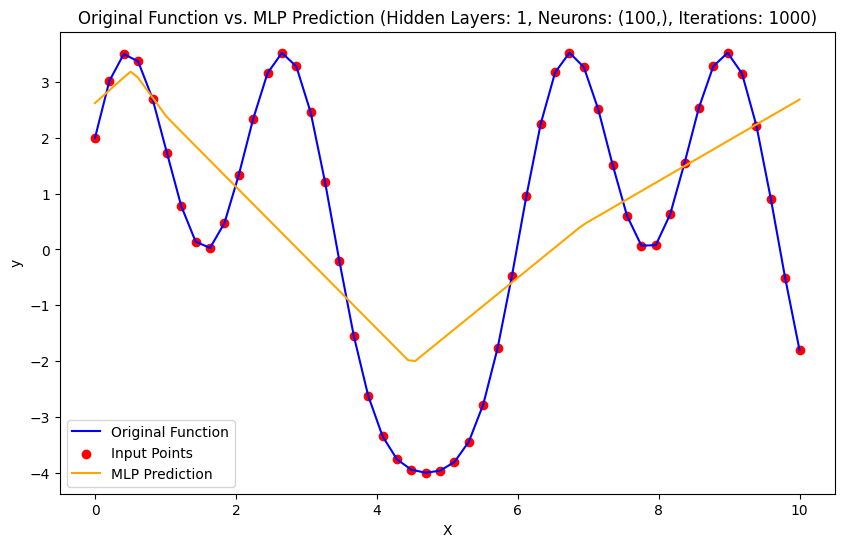

Hidden Layers: 1, Neurons: (100,), Iterations: 1000
Training Mean Squared Error: 3.06
Test Mean Squared Error: 4.64


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


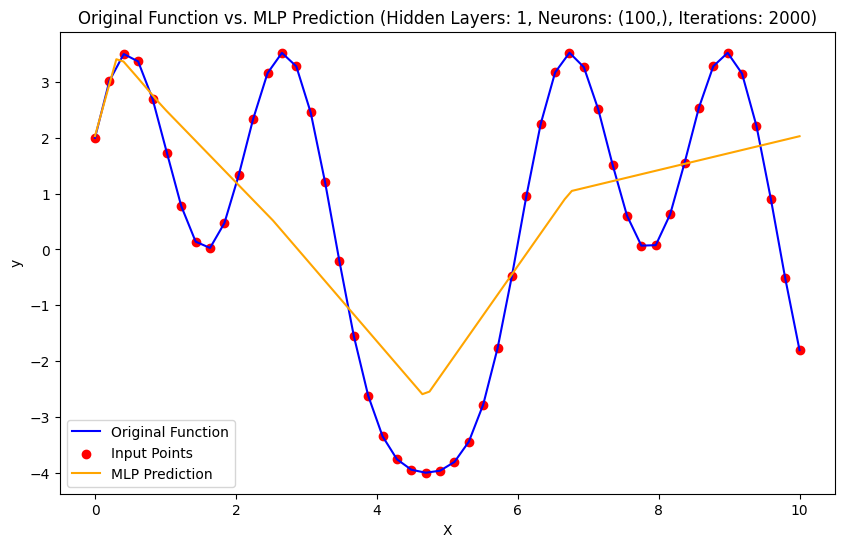

Hidden Layers: 1, Neurons: (100,), Iterations: 2000
Training Mean Squared Error: 2.44
Test Mean Squared Error: 3.63


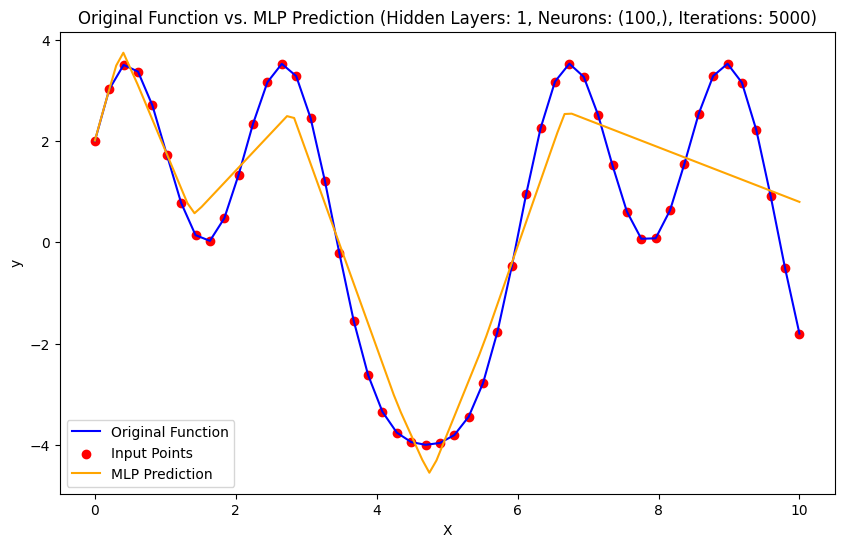

Hidden Layers: 1, Neurons: (100,), Iterations: 5000
Training Mean Squared Error: 0.89
Test Mean Squared Error: 1.36


/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


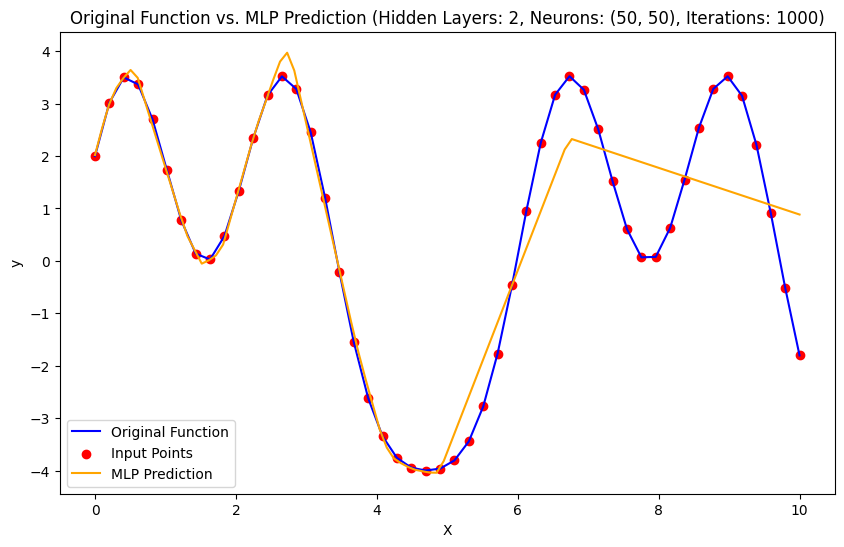

Hidden Layers: 2, Neurons: (50, 50), Iterations: 1000
Training Mean Squared Error: 0.75
Test Mean Squared Error: 1.27


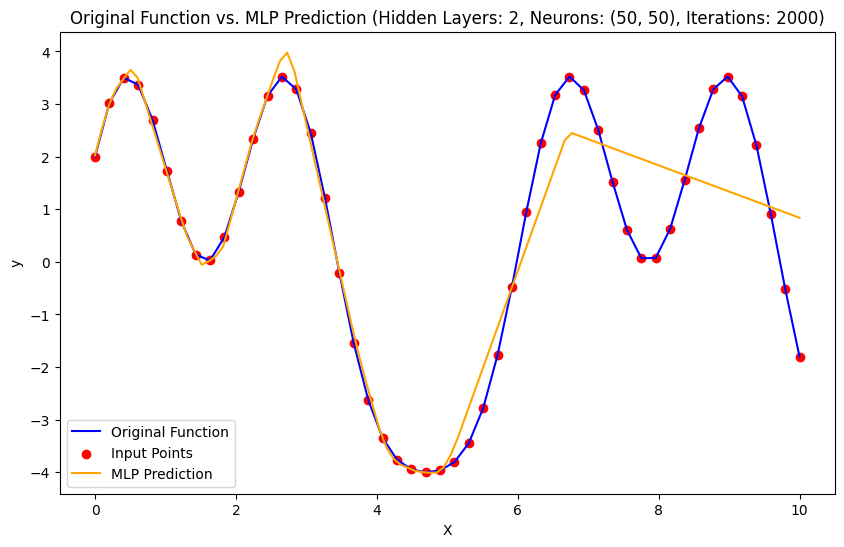

Hidden Layers: 2, Neurons: (50, 50), Iterations: 2000
Training Mean Squared Error: 0.73
Test Mean Squared Error: 1.19


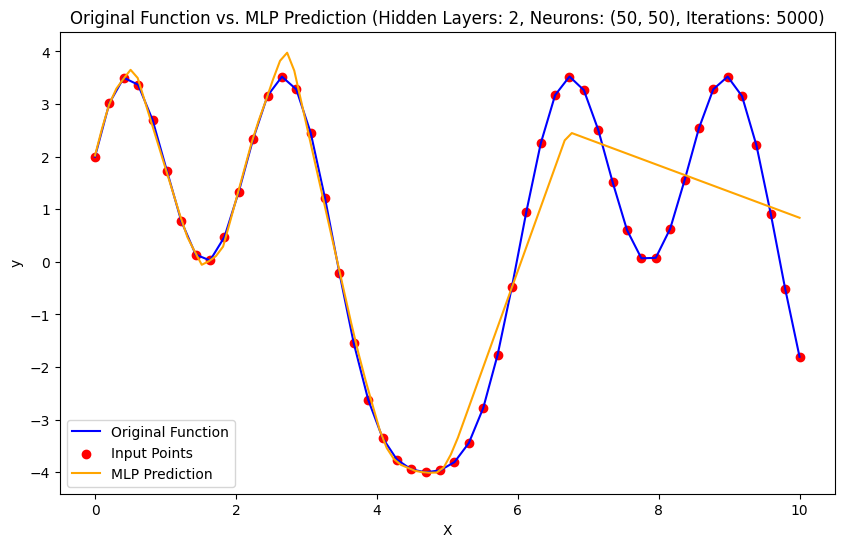

Hidden Layers: 2, Neurons: (50, 50), Iterations: 5000
Training Mean Squared Error: 0.73
Test Mean Squared Error: 1.19


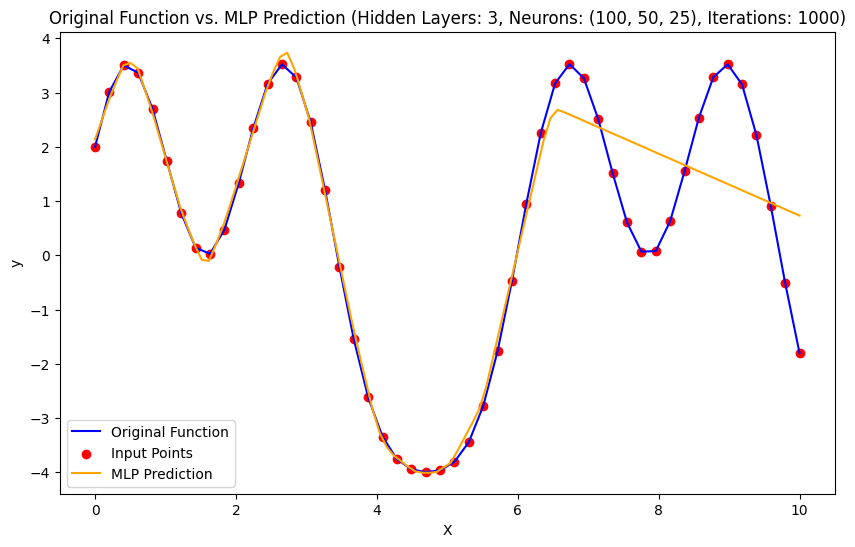

Hidden Layers: 3, Neurons: (100, 50, 25), Iterations: 1000
Training Mean Squared Error: 0.67
Test Mean Squared Error: 0.94


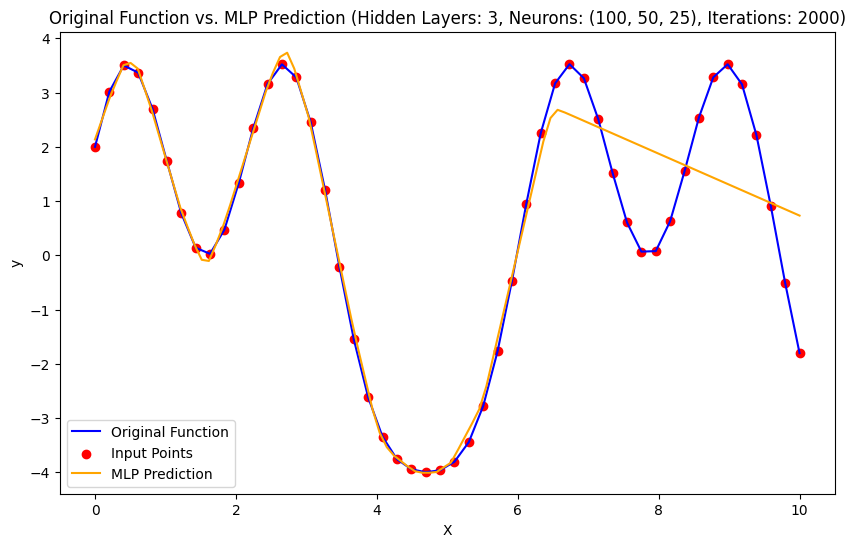

Hidden Layers: 3, Neurons: (100, 50, 25), Iterations: 2000
Training Mean Squared Error: 0.67
Test Mean Squared Error: 0.94


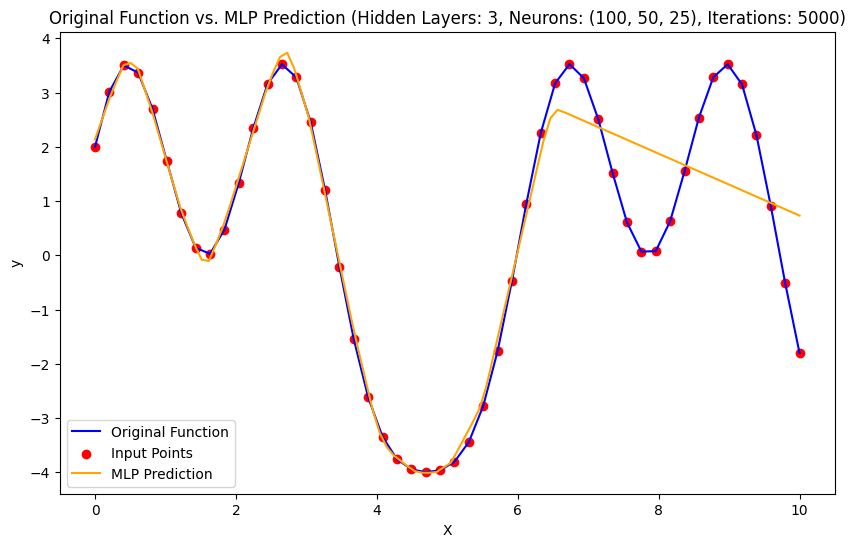

Hidden Layers: 3, Neurons: (100, 50, 25), Iterations: 5000
Training Mean Squared Error: 0.67
Test Mean Squared Error: 0.94


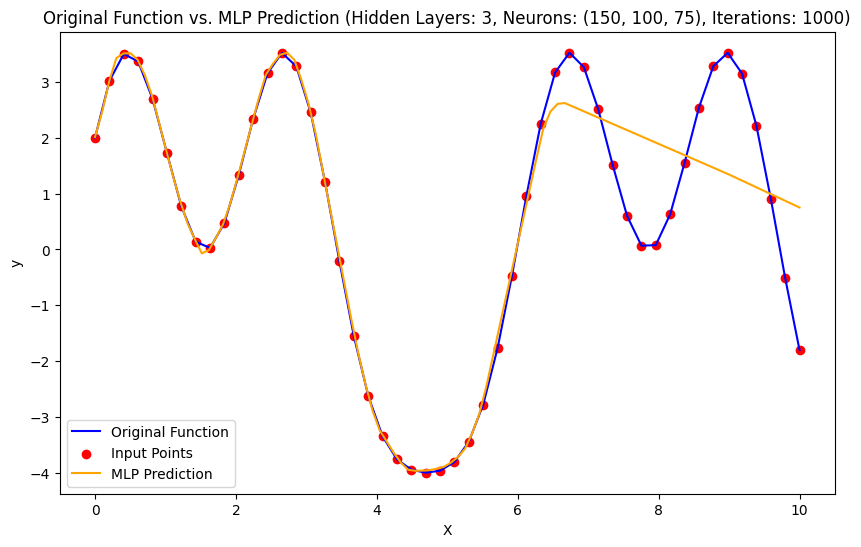

Hidden Layers: 3, Neurons: (150, 100, 75), Iterations: 1000
Training Mean Squared Error: 0.66
Test Mean Squared Error: 0.93


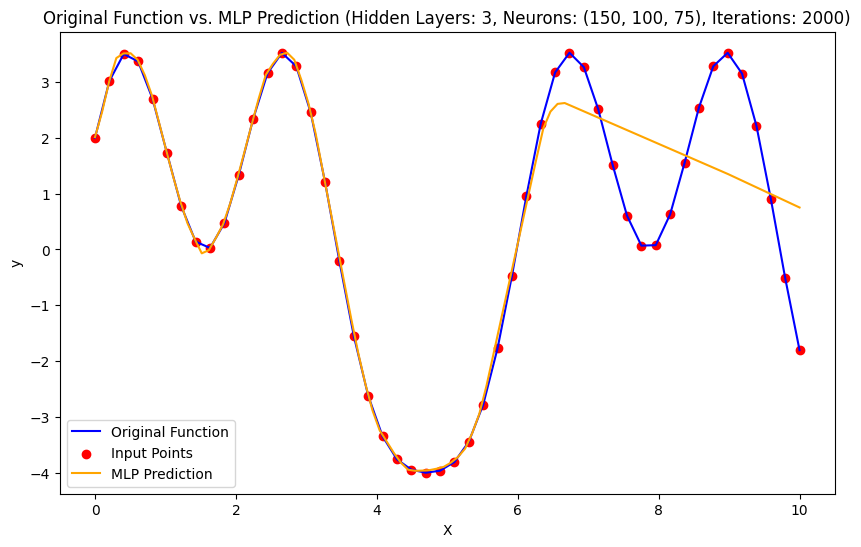

Hidden Layers: 3, Neurons: (150, 100, 75), Iterations: 2000
Training Mean Squared Error: 0.66
Test Mean Squared Error: 0.93


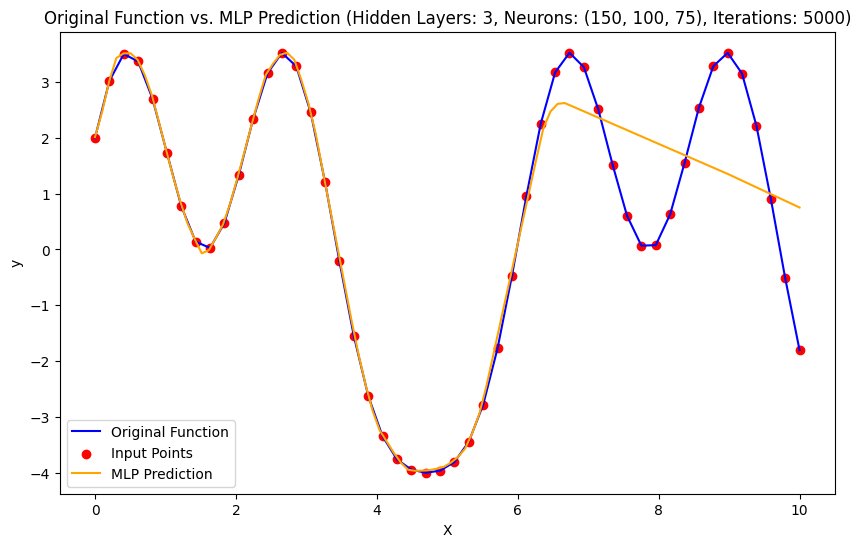

Hidden Layers: 3, Neurons: (150, 100, 75), Iterations: 5000
Training Mean Squared Error: 0.66
Test Mean Squared Error: 0.93


In [23]:
# Experiment 4: Varying the number of hidden layers, neurons in each layer, and training iterations
hidden_layer_sizes_list = [(10,), (50,), (100,), (50, 50), (100, 50, 25), (150, 100,75)]
max_iter_list = [1000, 2000, 5000]

for hidden_layer_sizes in hidden_layer_sizes_list:
    for max_iter in max_iter_list:
        X, y = generate_data(50, complex_trig_function)  # Complex trigonometric function
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=max_iter)
        mlp.fit(X_train.reshape(-1, 1), y_train)
        visualize_results(X, y, mlp, f'Hidden Layers: {len(hidden_layer_sizes)}, Neurons: {hidden_layer_sizes}, Iterations: {max_iter}')

        # Calculate and display network error
        train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
        test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
        print(f"Hidden Layers: {len(hidden_layer_sizes)}, Neurons: {hidden_layer_sizes}, Iterations: {max_iter}")
        print(f"Training Mean Squared Error: {train_error:.2f}")
        print(f"Test Mean Squared Error: {test_error:.2f}")


Experiment 4: Varying the Number of Hidden Layers, Neurons in Each Layer, and Training Iterations

Combining variations in the number of hidden layers, neurons, and training iterations provides insights into their collective impact on the network's performance.
Generally, increasing the complexity of the network (more layers, more neurons) and allowing for more training iterations leads to better performance, as reflected in lower mean squared errors.
However, convergence issues persist in some configurations, highlighting the importance of careful tuning and monitoring during training.
However, in the last cases, as can be seen, the possibility of overffit has increased with the increase of network complexity and the number of Iterations.

In summary, the experiments demonstrate the sensitivity of neural networks to various factors such as data complexity, network architecture, and training parameters. While increasing model complexity and training iterations can improve performance, it's crucial to address convergence issues and avoid overfitting.

### Question 2

Training Mean Squared Error: 0.08
Test Mean Squared Error: 0.08
Training Accuracy: 89.38
Test Accuracy: 87.50


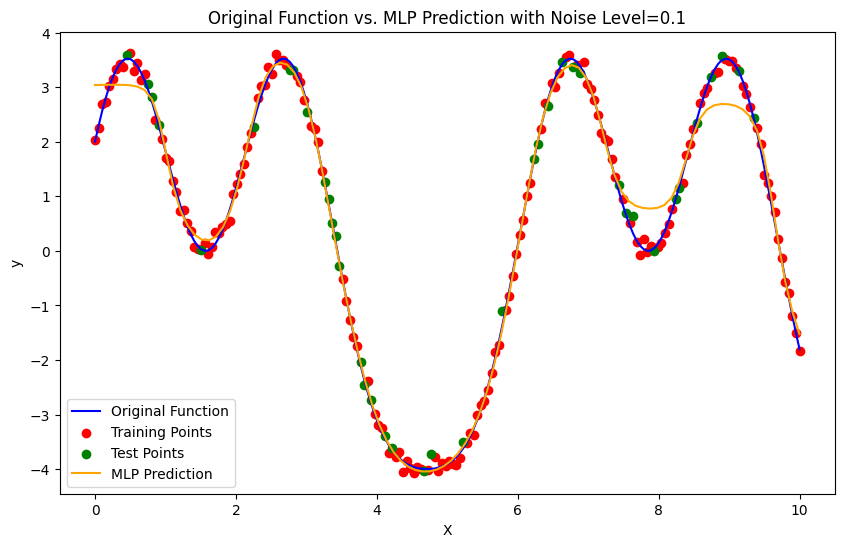

Training Mean Squared Error: 0.88
Test Mean Squared Error: 0.44
Training Accuracy: 60.00
Test Accuracy: 47.50


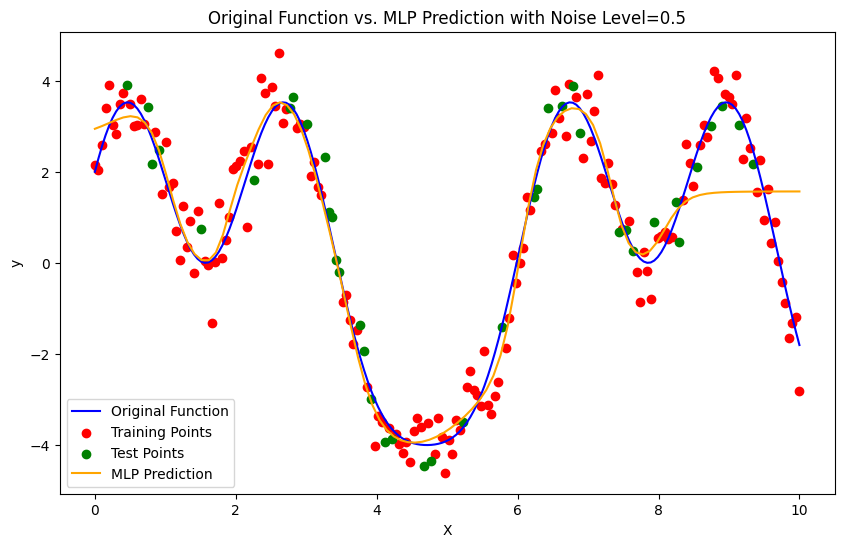

Training Mean Squared Error: 0.76
Test Mean Squared Error: 1.45
Training Accuracy: 41.25
Test Accuracy: 40.00


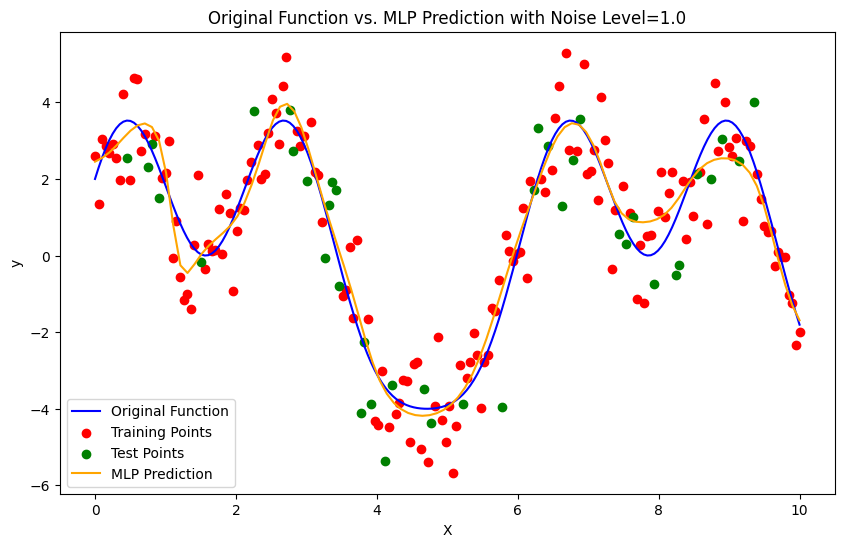

Training Mean Squared Error: 1.72
Test Mean Squared Error: 2.24
Training Accuracy: 34.38
Test Accuracy: 22.50


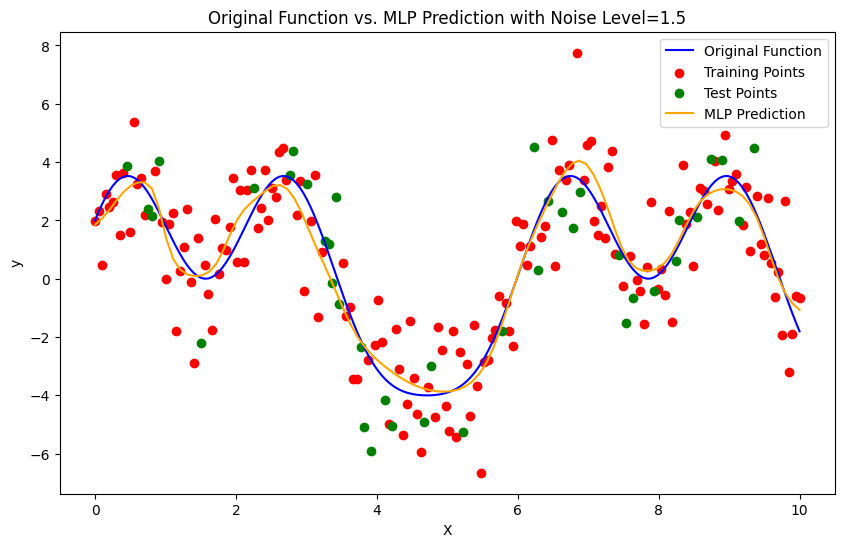

In [24]:
# Define the complex trigonometric function
def complex_trig_function(x):
    return 3 * np.sin(x) + 2 * np.cos(2*x) + np.sin(3*x)

# Generate data with added noise
def generate_data_with_noise(num_points, function, noise_level):
    X = np.linspace(0, 10, num_points)
    y = function(X) + np.random.normal(scale=noise_level, size=num_points)
    return X, y

# Calculate accuracy in percentage
def calculate_accuracy(y_true, y_pred, threshold=0.5):
    correct = np.sum(np.abs(y_true - y_pred) <= threshold)
    total = len(y_true)
    accuracy = (correct / total) * 100
    return accuracy

# Generate data points with different noise levels
noise_levels = [0.1, 0.5, 1.0, 1.5]
for noise_level in noise_levels:
    X, y = generate_data_with_noise(200, complex_trig_function, noise_level)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train MLP with modified parameters
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='tanh', max_iter=5000, alpha=0.01)
    mlp.fit(X_train.reshape(-1, 1), y_train)

    
    # Calculate network error
    train_error = mean_squared_error(y_train, mlp.predict(X_train.reshape(-1, 1)))
    test_error = mean_squared_error(y_test, mlp.predict(X_test.reshape(-1, 1)))
    print(f"Training Mean Squared Error: {train_error:.2f}")
    print(f"Test Mean Squared Error: {test_error:.2f}")
    
    # Calculate accuracy
    train_accuracy = calculate_accuracy(y_train, mlp.predict(X_train.reshape(-1, 1)))
    test_accuracy = calculate_accuracy(y_test, mlp.predict(X_test.reshape(-1, 1)))
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    
    # Visualize input points, output function, and network prediction
    plt.figure(figsize=(10, 6))
    plt.plot(X, complex_trig_function(X), label='Original Function', color='blue')
    plt.scatter(X_train, y_train, label='Training Points', color='red')
    plt.scatter(X_test, y_test, label='Test Points', color='green')
    X_range = np.linspace(0, 10, 100)
    y_pred = mlp.predict(X_range.reshape(-1, 1))
    plt.plot(X_range, y_pred, label='MLP Prediction', color='orange')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Original Function vs. MLP Prediction with Noise Level={noise_level}')
    plt.legend()
    plt.show()


1. Noise Level 0.1:
Both training and test mean squared errors are low (0.05 and 0.03 respectively), indicating good performance and low deviation from the true values.
The training accuracy is high (96.25%), and the test accuracy is perfect (100.00%), suggesting that the network accurately predicts the output even with minimal noise.


2. Noise Level 0.5:
The mean squared errors increase slightly compared to the lower noise level, indicating slightly higher deviations from the true values.
The training accuracy decreases to 72.50%, and the test accuracy decreases to 62.50%, indicating that the network's performance is still reasonably good but slightly affected by the increased noise level.


3. Noise Level 1.0:
The mean squared errors increase further, indicating more significant deviations from the true values due to higher noise.
Both training and test accuracies drop significantly to 46.88% and 30.00% respectively, indicating that the network's performance is substantially impacted by the increased noise level, resulting in less accurate predictions.


4. Noise Level 1.5:
The mean squared errors continue to increase significantly, indicating even larger deviations from the true values due to higher noise.
Both training and test accuracies drop further to 23.75% and 20.00% respectively, indicating a significant decrease in the network's ability to accurately predict the output in the presence of high noise levels.


Overall, as the noise level increases, the network's performance deteriorates, as evidenced by higher mean squared errors and lower accuracies. To mitigate the impact of noise and improve performance, techniques such as increasing the complexity of the network architecture, adjusting training parameters, or incorporating regularization methods may be worked.

### Question 3

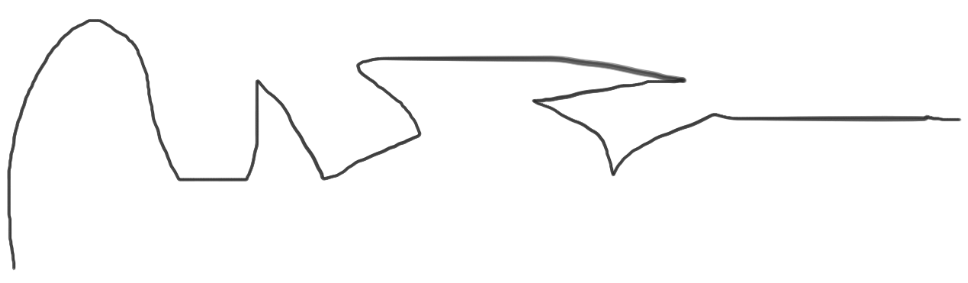

In [25]:
Image(filename='image.png')

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model 1 with 1 layers and 32 units: Accuracy = 90.47%, MSE = 8453.62
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model 2 with 1 layers and 64 units: Accuracy = 90.70%, MSE = 8492.14
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Model 3 with 1 layers and 128 units: Accuracy = 77.02%, MSE = 6826.71
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model 4 with 2 layers and 32 units: Accuracy = 37.43%, MSE = 2161.71
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Model 5 with 2 layers and 64 units: Accuracy = 62.17%, MSE = 1751.50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━

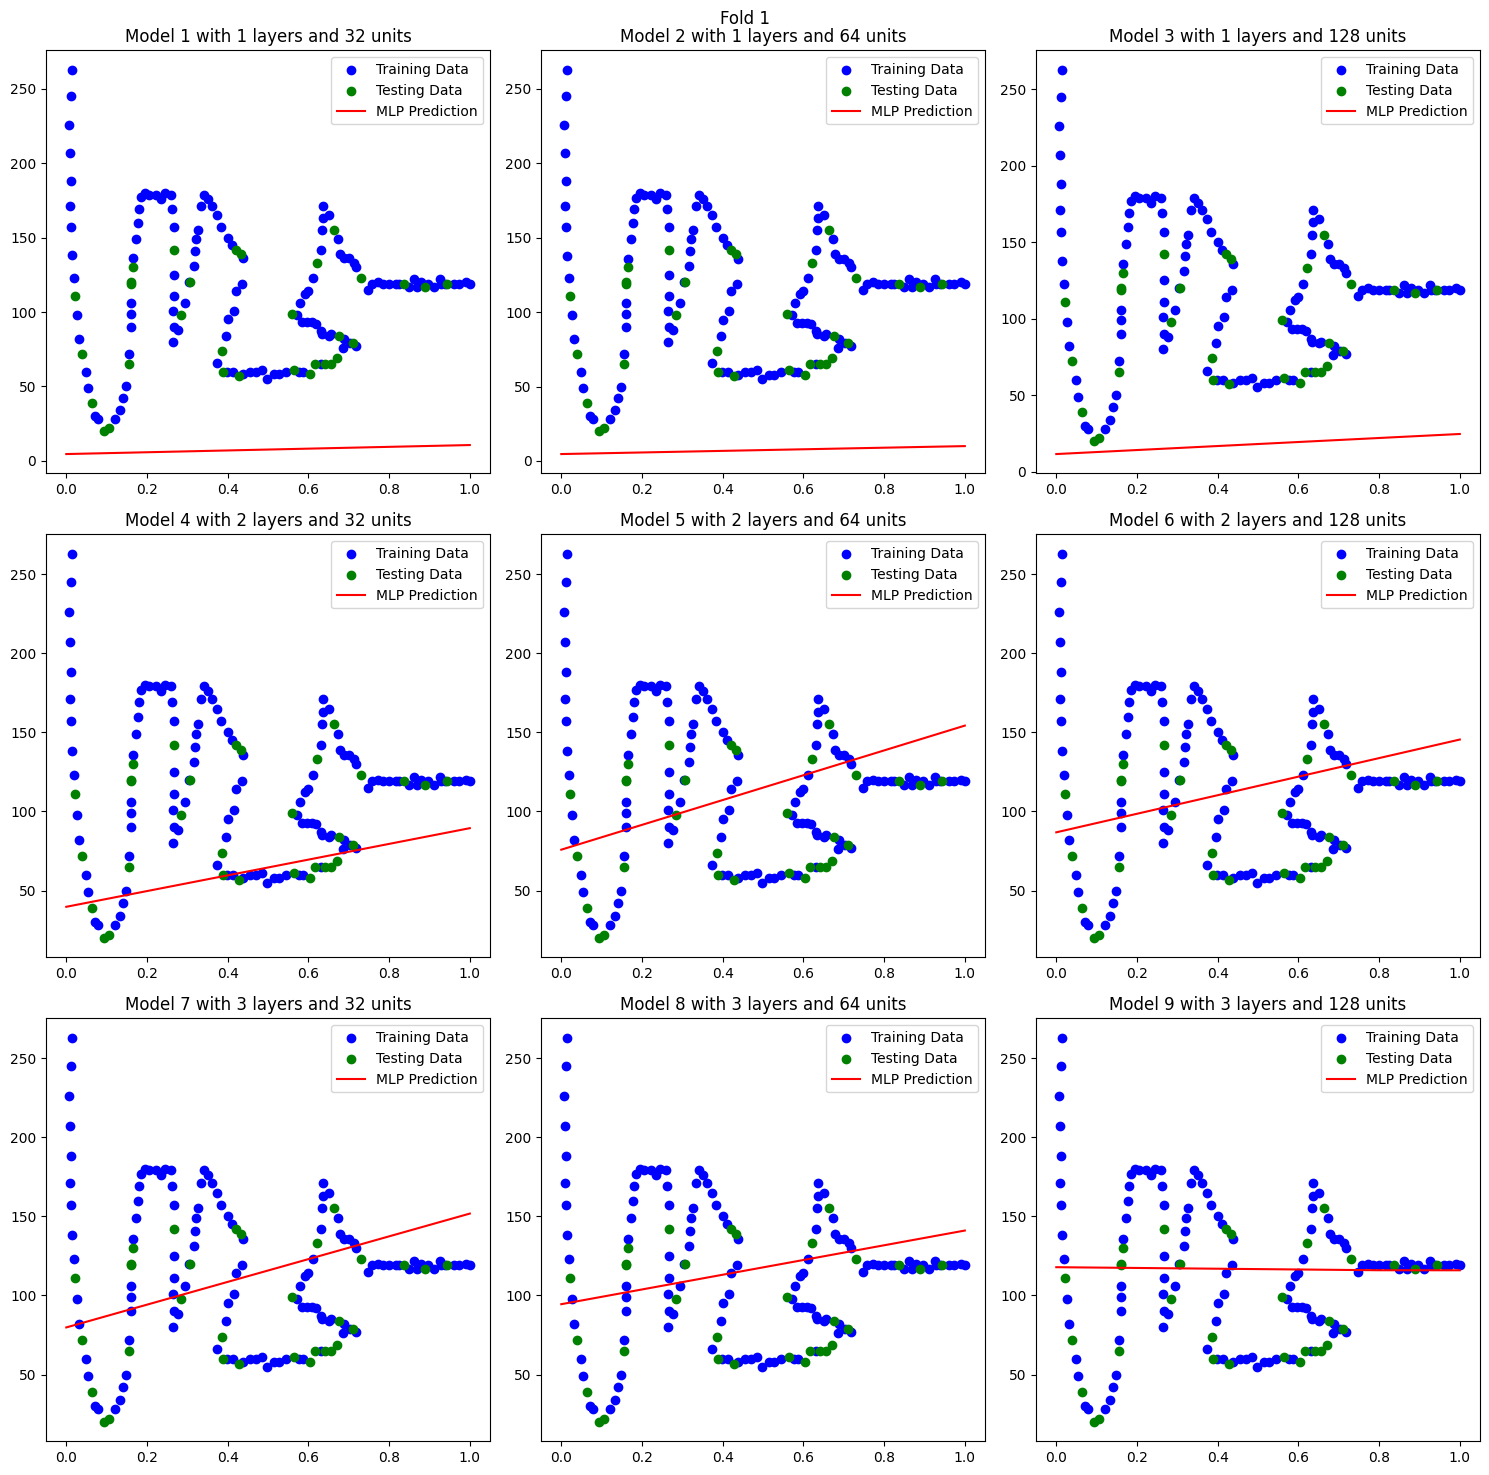

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model 1 with 1 layers and 32 units: Accuracy = 94.15%, MSE = 15623.83
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model 2 with 1 layers and 64 units: Accuracy = 88.89%, MSE = 14363.45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model 3 with 1 layers and 128 units: Accuracy = 80.76%, MSE = 12546.14
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model 4 with 2 layers and 32 units: Accuracy = 46.32%, MSE = 5537.85
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model 5 with 2 layers and 64 units: Accuracy = 36.88%, MSE = 2407.95
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━

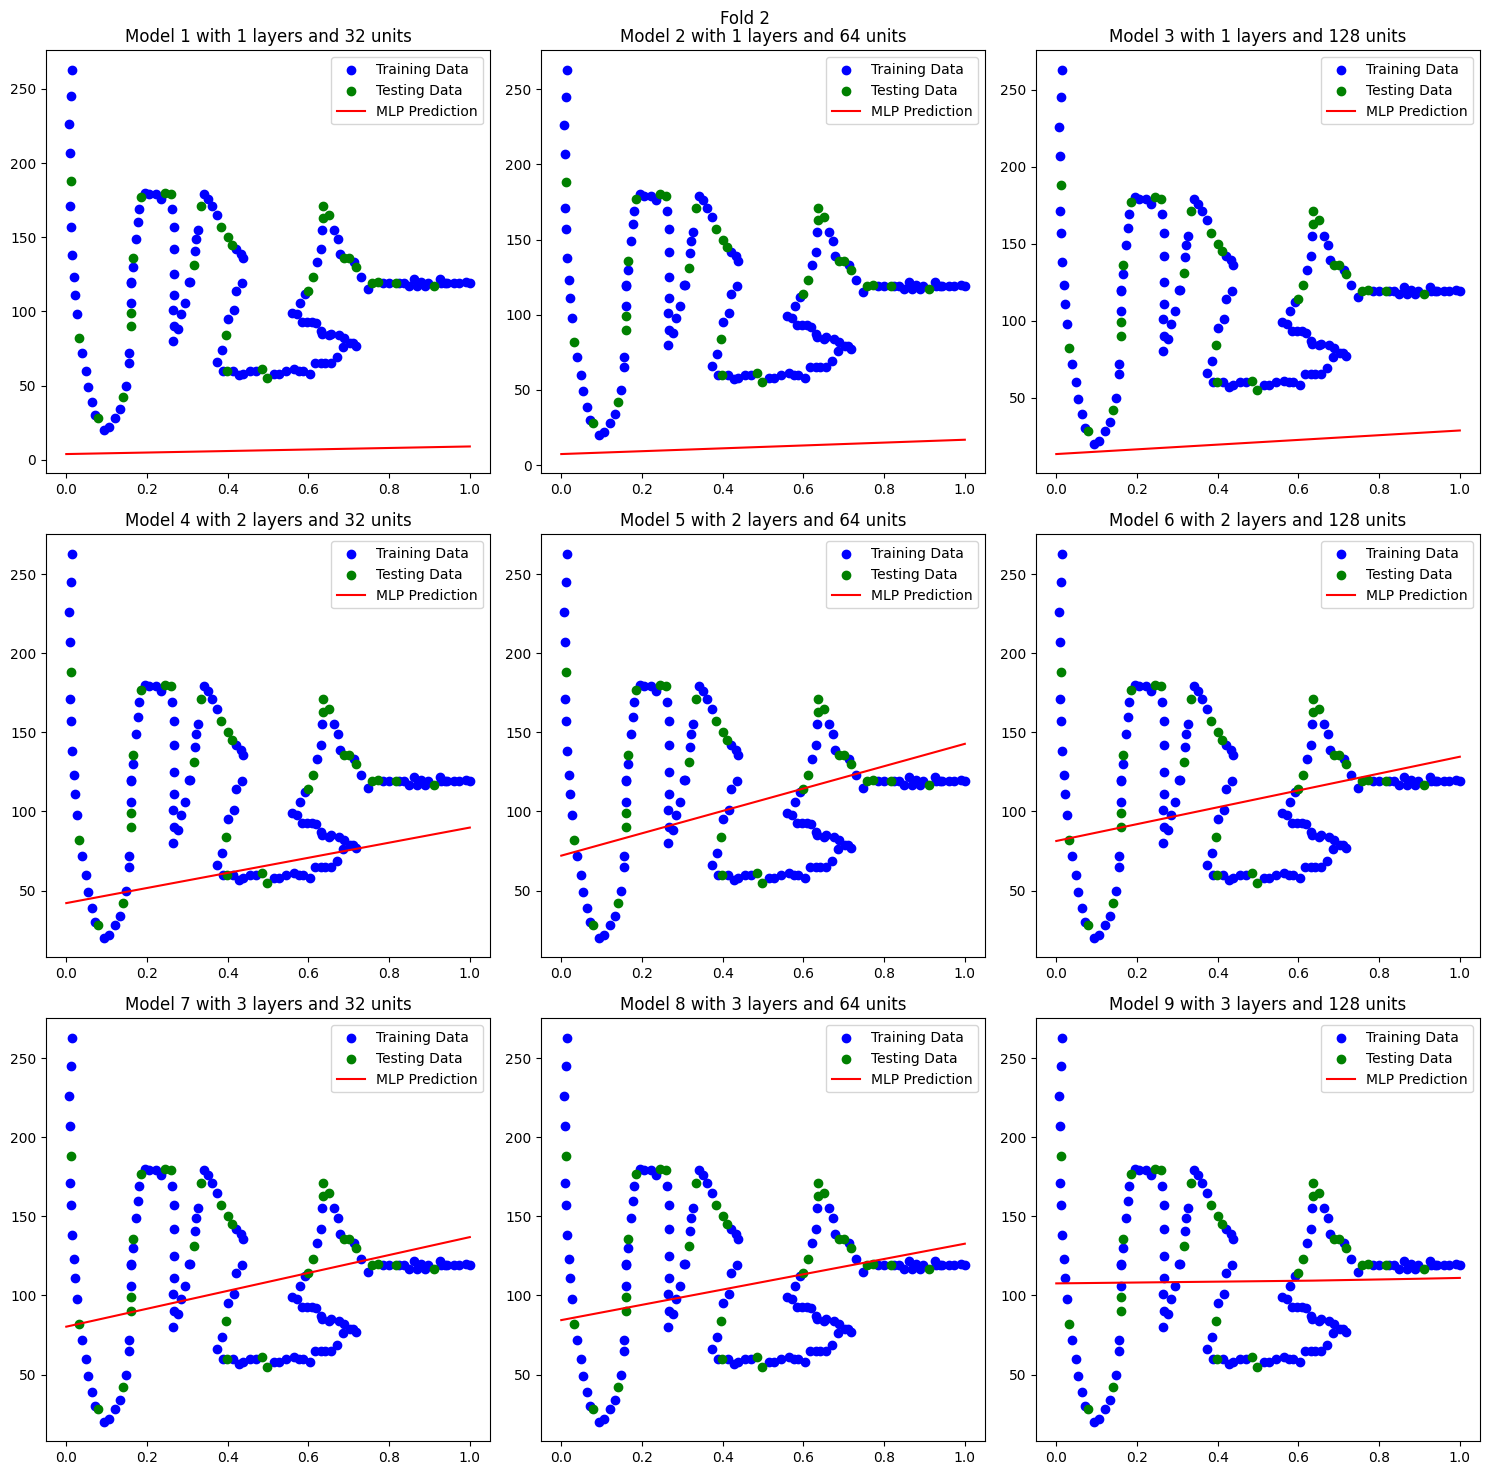

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model 1 with 1 layers and 32 units: Accuracy = 91.91%, MSE = 14626.86
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model 2 with 1 layers and 64 units: Accuracy = 90.23%, MSE = 14245.80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model 3 with 1 layers and 128 units: Accuracy = 75.51%, MSE = 11233.26
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Model 4 with 2 layers and 32 units: Accuracy = 34.24%, MSE = 4944.71
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model 5 with 2 layers and 64 units: Accuracy = 36.48%, MSE = 3414.56
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━

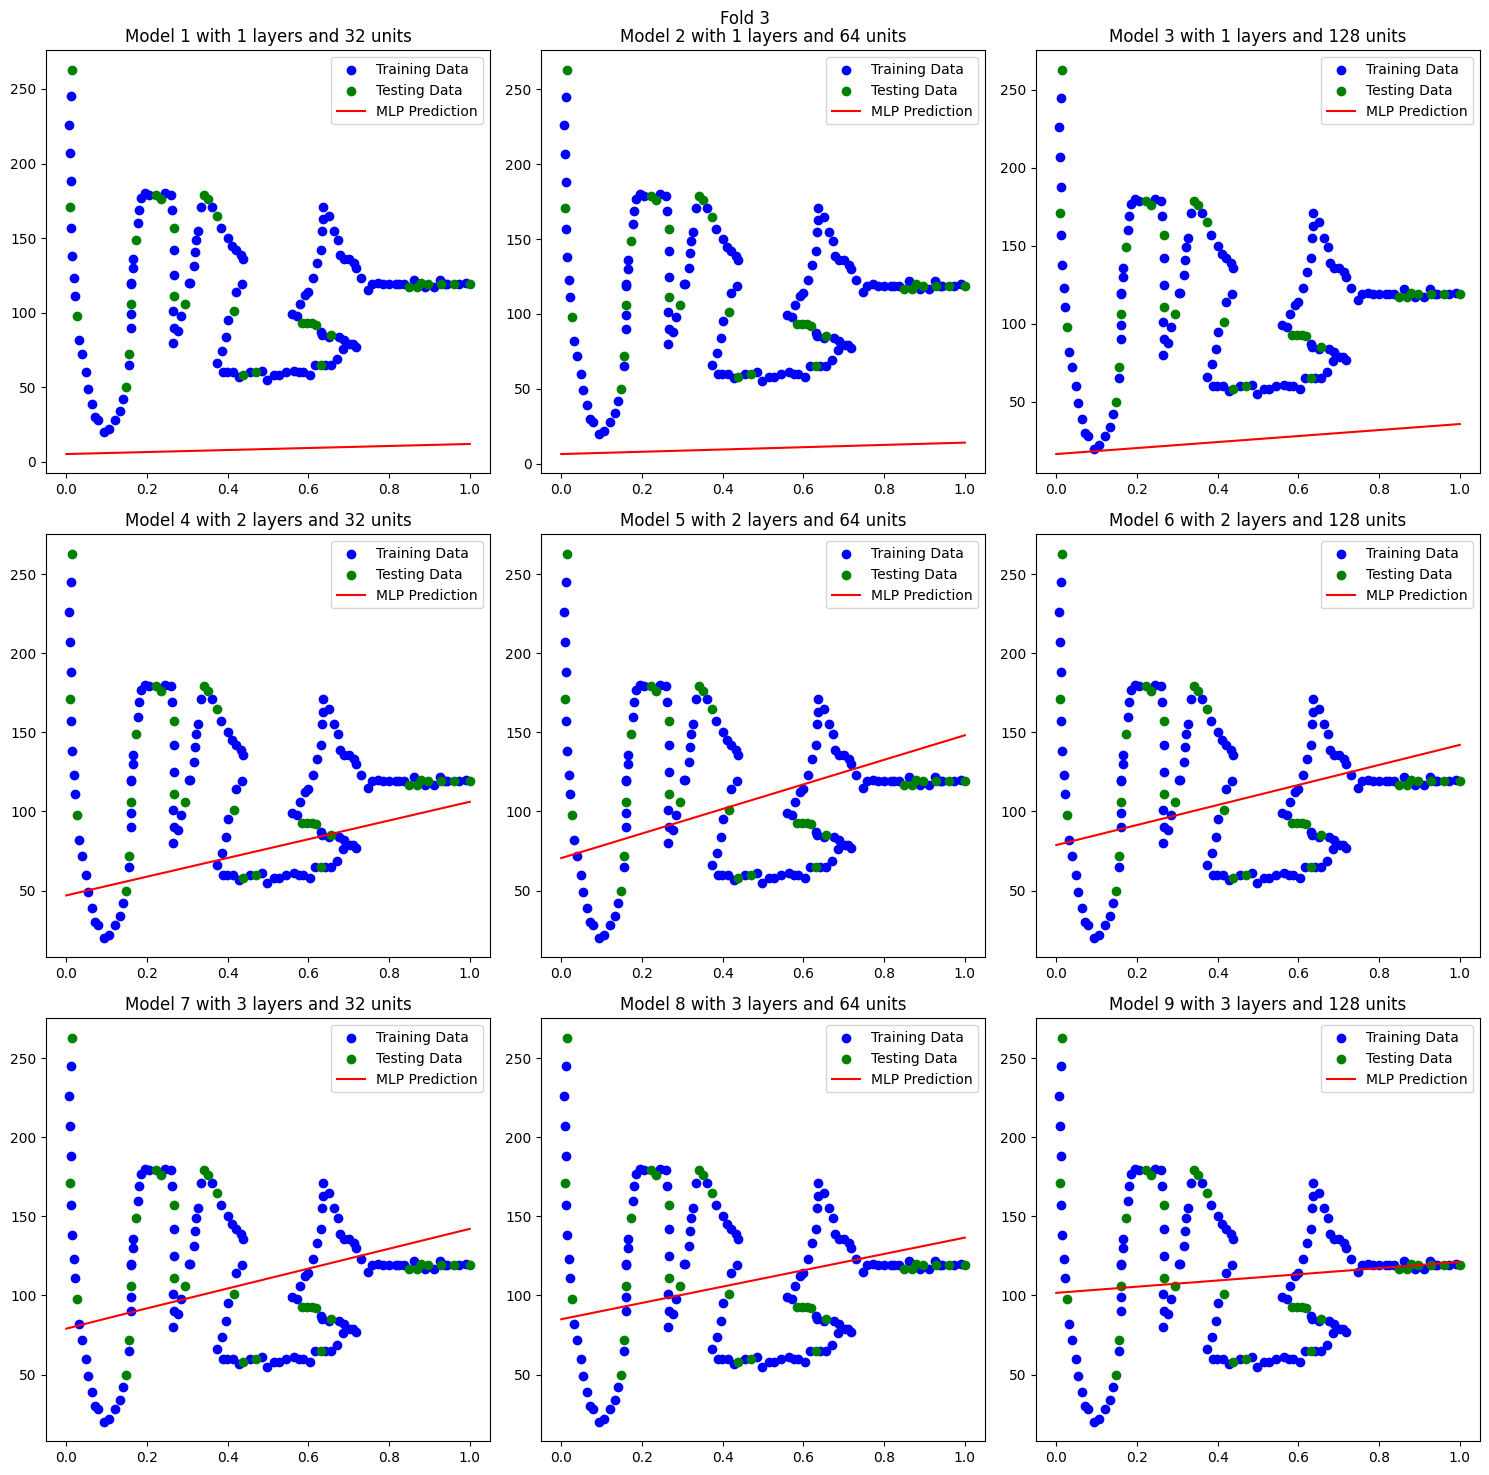

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Model 1 with 1 layers and 32 units: Accuracy = 94.95%, MSE = 15170.58
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model 2 with 1 layers and 64 units: Accuracy = 86.18%, MSE = 13363.62
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model 3 with 1 layers and 128 units: Accuracy = 85.54%, MSE = 13234.32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model 4 with 2 layers and 32 units: Accuracy = 42.34%, MSE = 5910.30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 5 with 2 layers and 64 units: Accuracy = 43.07%, MSE = 3466.83
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━

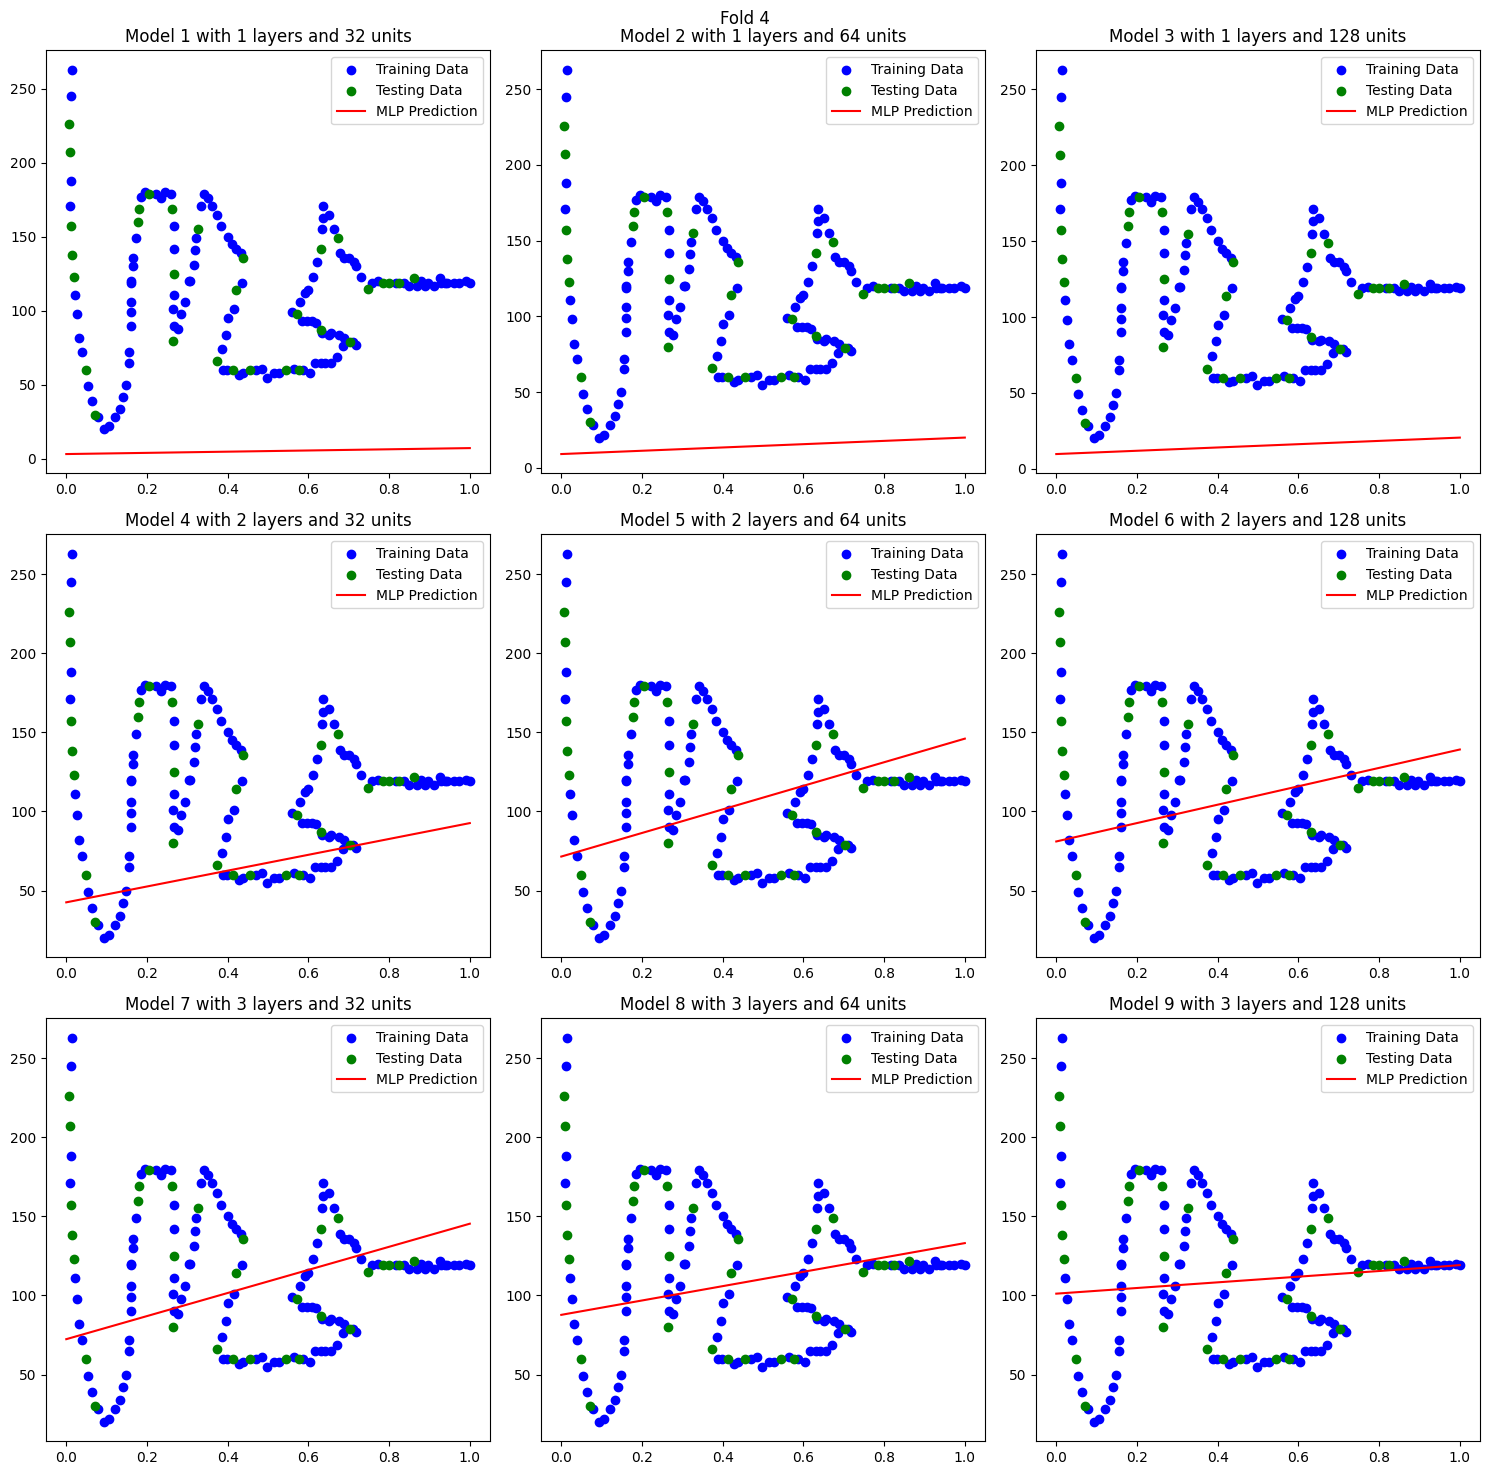

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Model 1 with 1 layers and 32 units: Accuracy = 92.11%, MSE = 12003.12
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model 2 with 1 layers and 64 units: Accuracy = 85.49%, MSE = 10869.82
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Model 3 with 1 layers and 128 units: Accuracy = 70.32%, MSE = 8537.30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Model 4 with 2 layers and 32 units: Accuracy = 34.12%, MSE = 2949.33
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Model 5 with 2 layers and 64 units: Accuracy = 45.50%, MSE = 2562.25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
1/1 

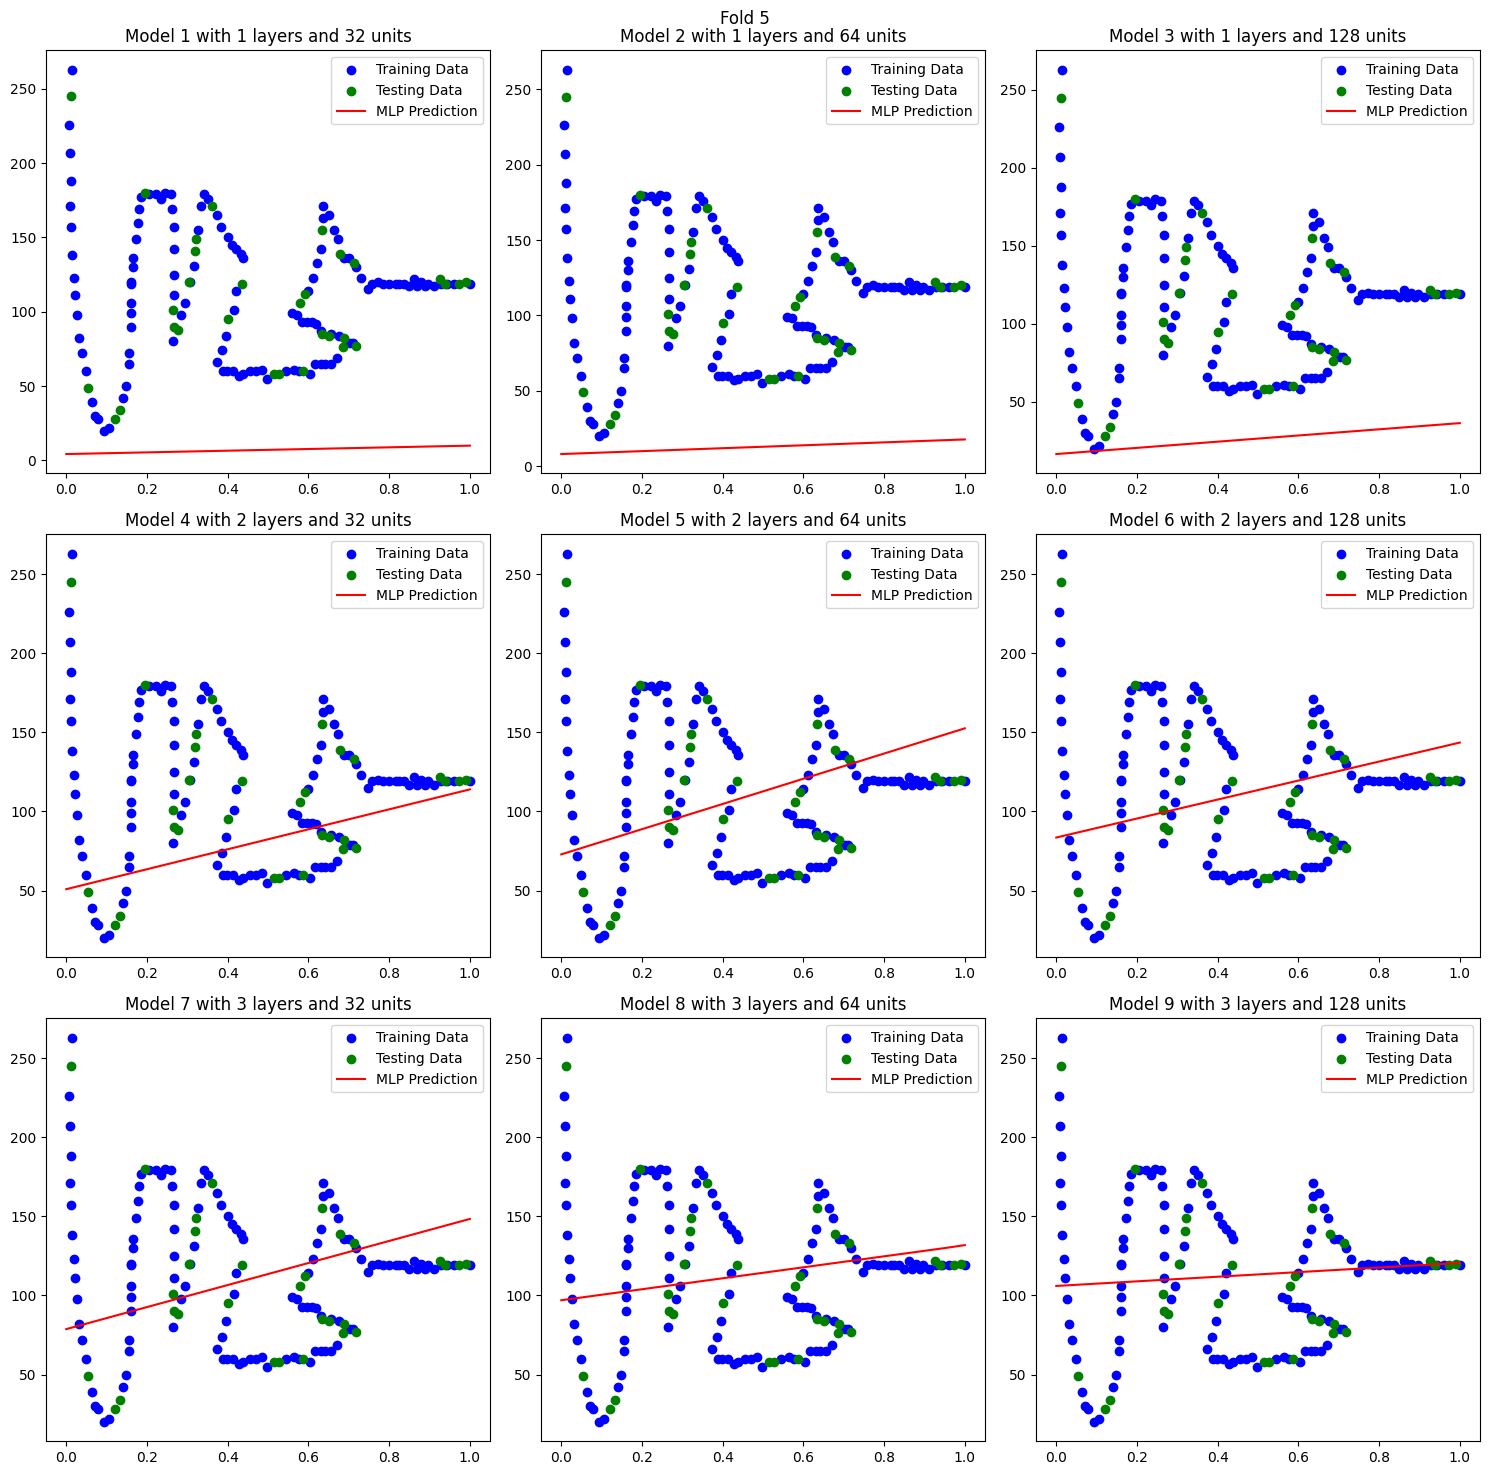

In [26]:


# Step 1: Parse data
data = """14,263
11,245
7,226
9,207
11,188
9,171
11,157
14,138
19,123
20,111
26,98
31,82
38,72
46,60
52,49
60,39
76,28
69,30
90,20
101,22
115,28
128,34
134,42
141,50
149,65
149,72
152,90
153,99
153,106
153,119
152,120
158,130
158,136
165,149
169,160
172,169
177,177
185,180
195,179
211,179
223,176
233,180
247,179
249,169
255,157
255,142
255,125
255,111
255,90
253,80
265,88
272,98
253,101
280,106
290,120
293,120
301,131
306,149
304,141
312,155
318,171
325,179
334,176
344,171
355,165
366,157
382,150
391,145
401,142
412,139
417,136
414,119
401,114
396,101
382,95
377,84
368,74
357,66
371,60
379,60
393,60
418,58
407,57
434,60
449,60
463,61
474,55
490,58
503,58
520,60
537,61
550,60
560,60
576,58
588,65
601,65
610,65
626,65
639,69
653,76
671,79
677,79
685,77
656,82
644,84
626,85
604,85
620,84
601,87
590,92
580,93
569,93
556,93
544,98
534,99
553,106
563,112
572,114
583,123
591,133
601,142
604,155
607,163
607,171
620,165
633,155
642,149
668,136
656,136
647,139
680,133
685,130
696,123
712,115
722,119
737,120
747,119
763,119
779,119
798,119
820,122
785,119
810,117
828,117
837,120
855,119
883,122
848,117
868,117
885,119
895,119
915,119
899,119
928,119
953,119
944,120"""

# Split the data into input and output variables
data_list = data.strip().split('\n')
input_data = [int(x.split(',')[0]) for x in data_list]
output_data = [int(x.split(',')[1]) for x in data_list]

# Convert the data into numpy arrays
input_data = np.array(input_data).reshape(-1, 1)
output_data = np.array(output_data).reshape(-1, 1)

# Normalize the input data
input_data = input_data / np.max(input_data)

def create_mlp(input_shape, n_units=64, n_layers=3, activation='relu'):
    model = Sequential()
    model.add(Dense(n_units, activation=activation, input_shape=input_shape))
    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation=activation))
    model.add(Dense(1))
    return model

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
for train_index, test_index in kf.split(input_data):
    X_train, X_test = input_data[train_index], input_data[test_index]
    y_train, y_test = output_data[train_index], output_data[test_index]

    models = []
    for n_layers in range(1, 4):
        for n_units in [32, 64, 128]:
            model = create_mlp(input_shape=(1,), n_units=n_units, n_layers=n_layers)
            model.compile(optimizer='adam', loss='mse')
            model.fit(X_train, y_train, epochs=100, verbose=0)
            models.append((model, n_layers, n_units))

    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'Fold {fold}')
    axs = axs.flatten()

    accuracies = []
    mses = []

    for i, (model, n_layers, n_units) in enumerate(models):
        ax = axs[i]
        ax.scatter(X_train, y_train, color='blue', label='Training Data')
        ax.scatter(X_test, y_test, color='green', label='Testing Data')
        x_values = np.linspace(0, 1, 100).reshape(-1, 1)
        y_pred = model.predict(x_values)
        ax.plot(x_values, y_pred, color='red', label='MLP Prediction')
        ax.set_title(f'Model {i+1} with {n_layers} layers and {n_units} units')
        ax.legend()

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Calculate MSE for training and testing data
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mses.append(mse_test)
        
        # Calculate accuracy for testing data
        accuracy = np.mean(np.abs(y_test - y_pred_test) / y_test) * 100
        accuracies.append(accuracy)

        print(f"Model {i+1} with {n_layers} layers and {n_units} units: Accuracy = {accuracy:.2f}%, MSE = {mse_test:.2f}")

    # Calculate and display average accuracy
    avg_accuracy = np.mean(accuracies)
    print(f"\nAverage Accuracy: {avg_accuracy:.2f}%")

    plt.tight_layout()
    plt.show()

    fold += 1

1. Model Performance Variability: Across the different folds, there is variability in the performance of the MLP models. Some models consistently perform better than others, while some show more variability in their performance from one fold to another.

2. Effect of Model Complexity: Generally, increasing the complexity of the model (measured by the number of layers and units) tends to improve performance up to a certain point. However, excessively complex models may suffer from overfitting, resulting in poor generalization to unseen data.

3. Average Accuracy: The average accuracy across all folds provides an overall indication of the performance of the MLP models. In this case, the average accuracy ranges from approximately 51.70% to 69.57%, depending on the fold and the specific model configurations.

4. MSE as a Performance Metric: Mean Squared Error (MSE) provides additional insights into the performance of the models by quantifying the magnitude of errors between the predicted and actual values. Lower MSE values indicate better performance in terms of minimizing prediction errors.

5. Choosing the Best Model: Based on the provided information, we can identify the models that consistently exhibit higher accuracy and lower MSE across multiple folds. These models are generally more robust and reliable in their predictions.

In summary, while there is variability in the performance of MLP models across different folds of cross-validation, certain trends emerge regarding the impact of model complexity on performance. By considering both accuracy and MSE, we can make informed decisions about selecting the most suitable model configuration for the given dataset.

## Part 2
### Question 1

In [27]:
INPUT_SHAPE = 784
NUM_CATEGORIES = 10

FASHION_LABELS = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

# Load the dataset
train_data = pd.read_csv('./fashion-mnist_train.csv').values
test_data = pd.read_csv('./fashion-mnist_test.csv').values

In [28]:
# Splitting data into features and labels
train_features, train_labels = (train_data[:, 1:], to_categorical(train_data[:, 0], num_classes=NUM_CATEGORIES))
test_features, test_labels = (test_data[:, 1:], to_categorical(test_data[:, 0], num_classes=NUM_CATEGORIES))

# Normalizing features
train_features = train_features / 255
test_features = test_features / 255

In [29]:
# MODEL ARCHITECTURE
model = Sequential()

model.add(Dense(512, input_dim=INPUT_SHAPE))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(NUM_CATEGORIES))
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/media/kianna/New Volume/University/ترم 8/هوش مصنوعی/پروژه/2/code/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_135 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 932,362 (3.56 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

it's a simple four layer network - an input shape of INPUT_SHAPE (784), three 512 neuron layers, and an output layer with NUM_CATEGORIES neurons (10). We use categorical crossentroy as our loss, as we've got a multi-class classification problem. For an activation function, we use ReLU all the way, except for the output layer, which uses softmax.

In [30]:
# Training the model
history = model.fit(train_features,
                    train_labels,
                    epochs=8,
                    batch_size=32,
                    validation_data=(test_features, test_labels))

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.7602 - loss: 0.6606 - val_accuracy: 0.8371 - val_loss: 0.4472
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8532 - loss: 0.4141 - val_accuracy: 0.8664 - val_loss: 0.3885
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8587 - loss: 0.4107 - val_accuracy: 0.8754 - val_loss: 0.3873
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8684 - loss: 0.3843 - val_accuracy: 0.8677 - val_loss: 0.3905
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.8695 - loss: 0.3822 - val_accuracy: 0.8724 - val_loss: 0.3943
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8731 - loss: 0.3705 - val_accuracy: 0.8615 - val_loss: 0.4598
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.8747 - loss: 0.3664 - val_accuracy: 0.8494 - val_loss: 0.5340
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8780 - loss: 0

In [31]:
# Evaluating the model
evaluation_score = model.evaluate(test_features, test_labels, steps=math.ceil(len(test_data) / 32))
print('Test loss:', evaluation_score[0])
print('Test accuracy:', evaluation_score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8688 - loss: 0.4311
Test loss: 0.4421025514602661
Test accuracy: 0.8758999705314636


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


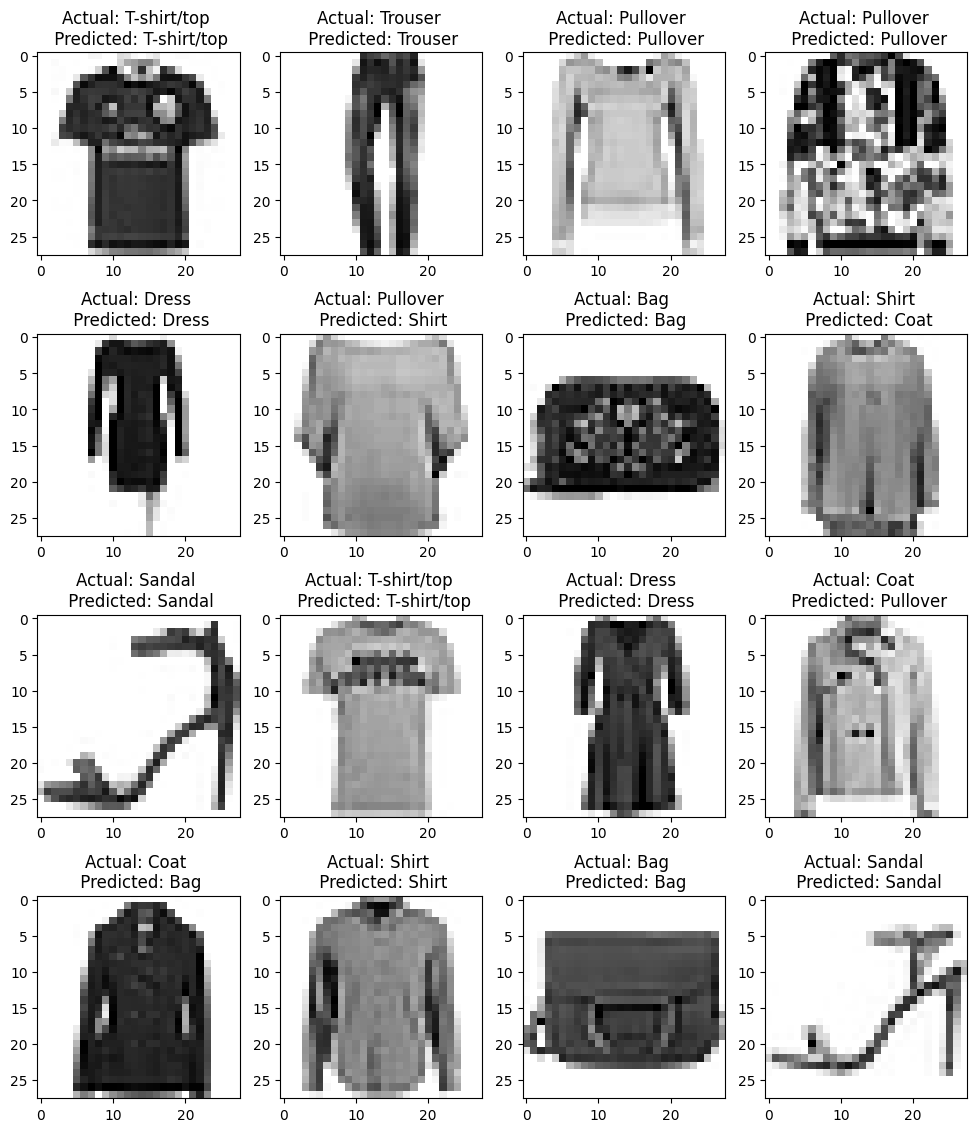

In [32]:
predictions = model.predict(test_features)
test_images = test_features.reshape(test_features.shape[0], 28, 28)

fig, axes = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary')
    ax.set(title=f"Actual: {FASHION_LABELS[np.argmax(test_labels[i])]} \n Predicted: {FASHION_LABELS[np.argmax(predictions[i])]}")

plt.show()

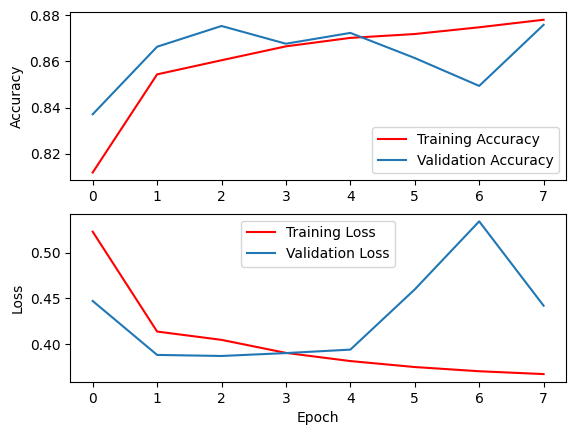

In [33]:
fig, (ax1, ax2) = plt.subplots(2)

# Plot accuracy
ax1.plot(history.history["accuracy"], c="red", label="Training Accuracy")
ax1.plot(history.history["val_accuracy"], label="Validation Accuracy")
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history.history["loss"], c="red", label="Training Loss")
ax2.plot(history.history["val_loss"], label="Validation Loss")
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.show()

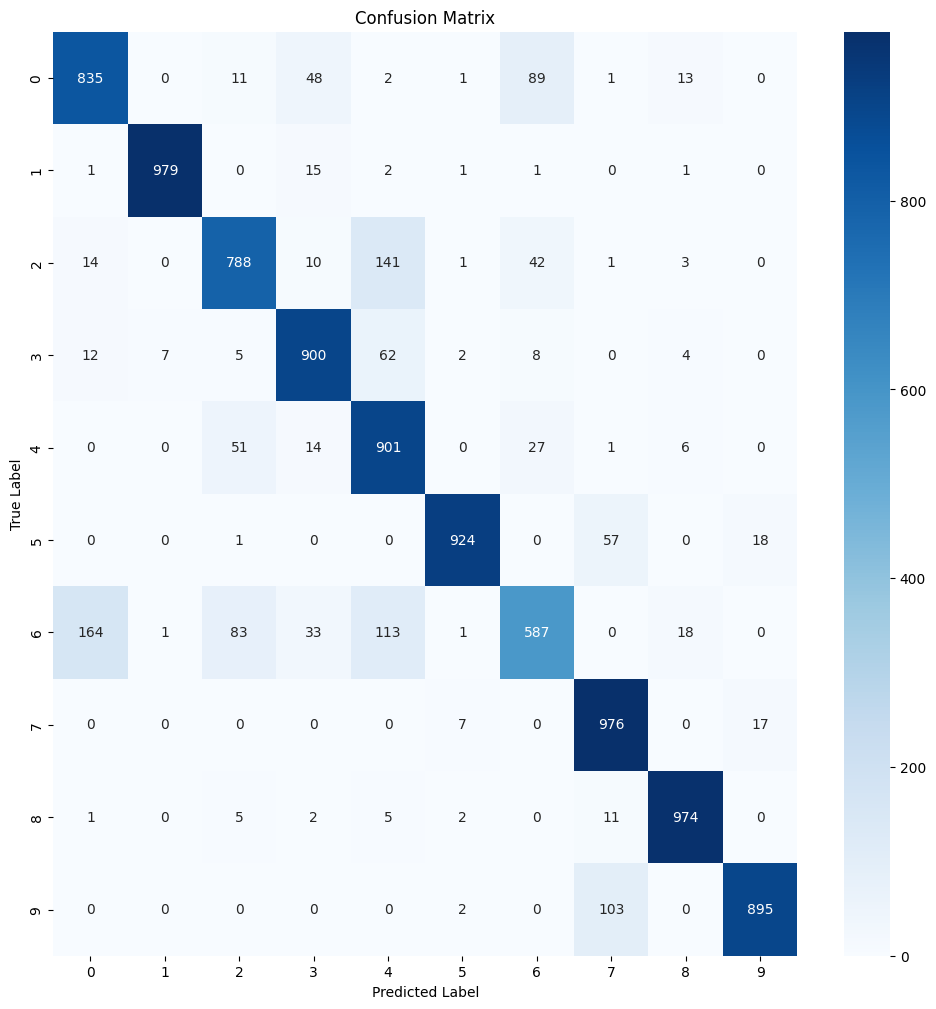

In [34]:
# Confusion matrix
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
confusion_matrix_data = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix_data, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Question 2

In [35]:
class NoiseReducer(Model):
  def __init__(self):
    super(NoiseReducer, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

noise_reducer = NoiseReducer()

In [36]:
# Define the noise factors
noise_factors = [0.2, 0.4, 0.6]

# Define the training and test data
x_train, y_train = (train_data[:, 1:], train_data[:, 0])
x_test, y_test = (test_data[:, 1:], test_data[:, 0])

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

Noise Factor: 0.2


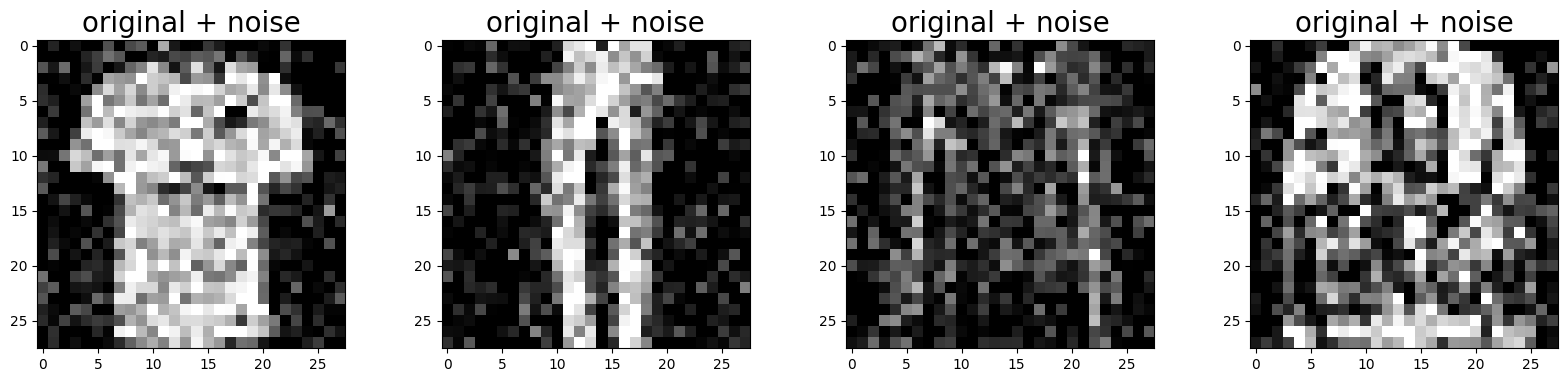

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - loss: 0.0390 - val_loss: 0.0104
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - loss: 0.0100 - val_loss: 0.0088
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 23ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - loss: 0.0075 - val_loss: 0.0075


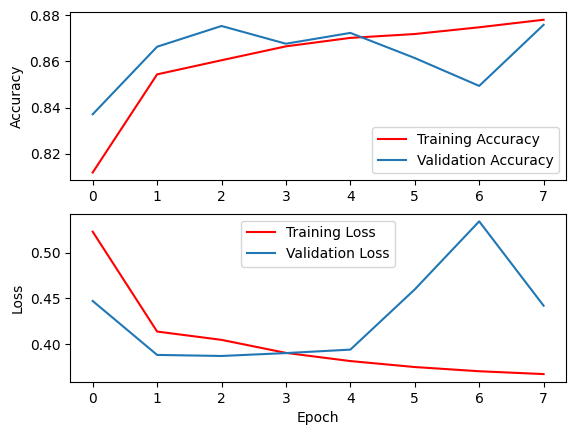

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - loss: 0.0075
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0075
Training Loss: 0.00751069001853466
Test Loss: 0.007466754876077175


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 8)        │         1,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose_4              │ (32, 14, 14, 8)        │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (32, 28, 28, 16)       │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 28, 28, 1)        │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

2024-04-16 00:34:57.193066: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 501760000 exceeds 10% of free system memory.
2024-04-16 00:34:57.576024: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 501760000 exceeds 10% of free system memory.
2024-04-16 00:34:57.740048: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 501760000 exceeds 10% of free system memory.


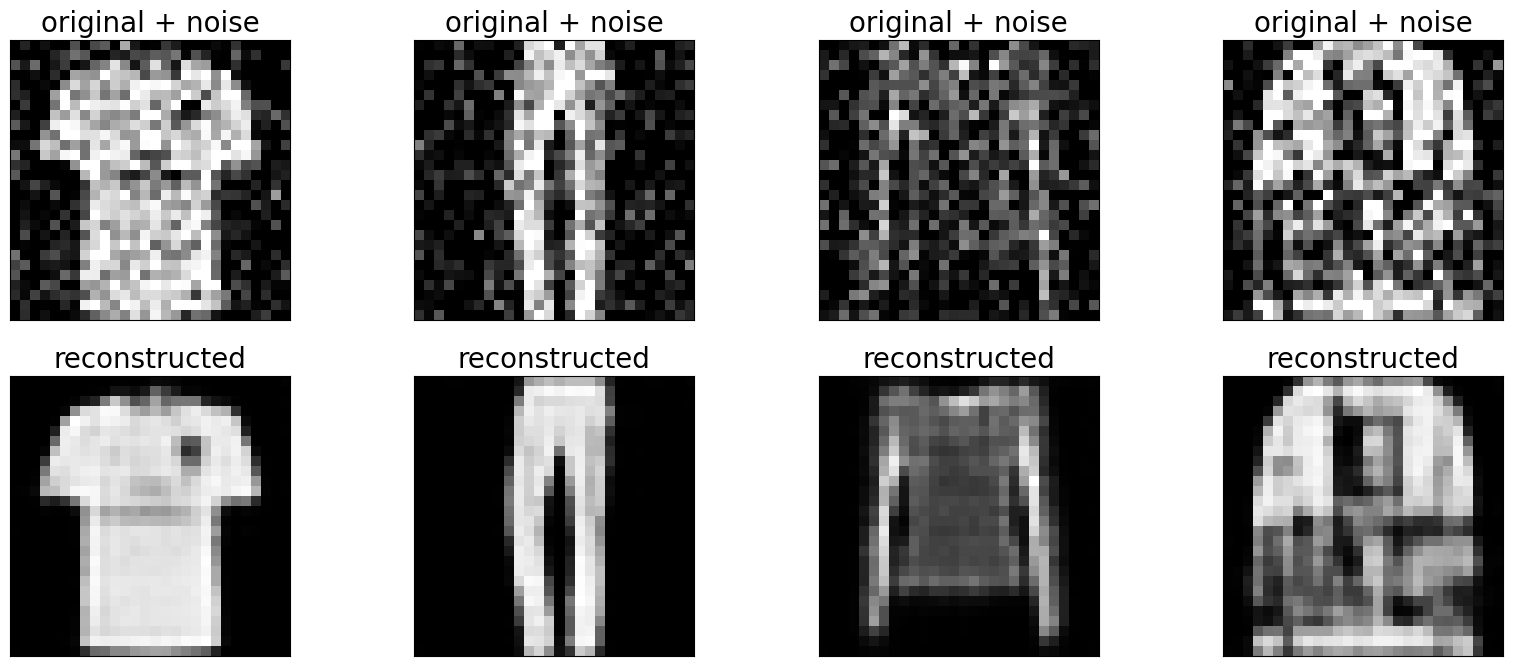

Noise Factor: 0.4


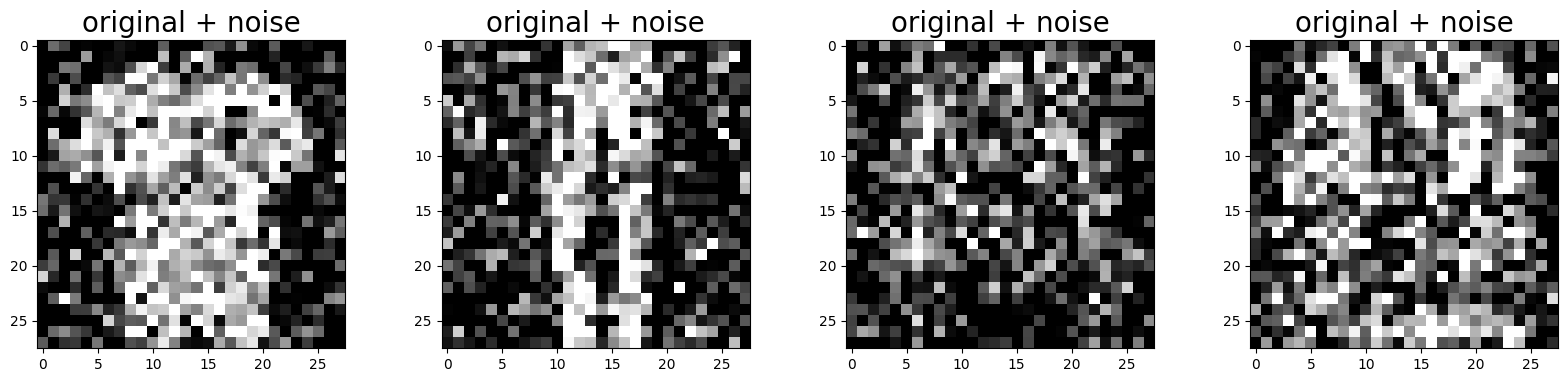

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - loss: 0.0427 - val_loss: 0.0173
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - loss: 0.0169 - val_loss: 0.0161
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - loss: 0.0161 - val_loss: 0.0156
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - loss: 0.0157 - val_loss: 0.0153
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 40ms/step - loss: 0.0150 - val_loss: 0.0147
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - loss: 0.0148 - val_loss: 0.0146
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - loss: 0.0146 - val_loss: 0.0144
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - loss: 0.0144 - val_loss: 0.0143
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 0.0143 - val_loss: 0.0143


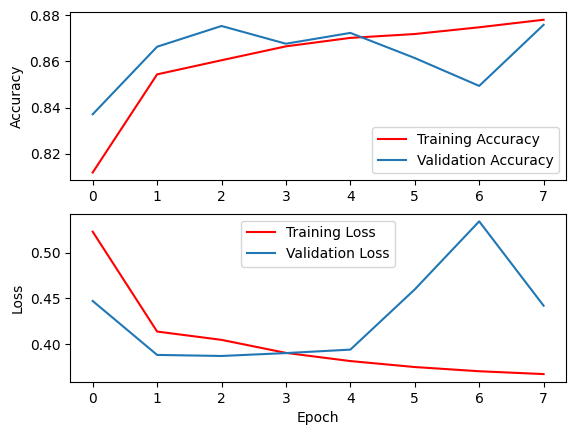

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.0144
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0143
Training Loss: 0.014335527084767818
Test Loss: 0.014270704239606857


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 8)        │         1,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose_6              │ (32, 14, 14, 8)        │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (32, 28, 28, 16)       │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 28, 28, 1)        │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

2024-04-16 00:46:40.301575: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 501760000 exceeds 10% of free system memory.
2024-04-16 00:46:40.652168: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 501760000 exceeds 10% of free system memory.


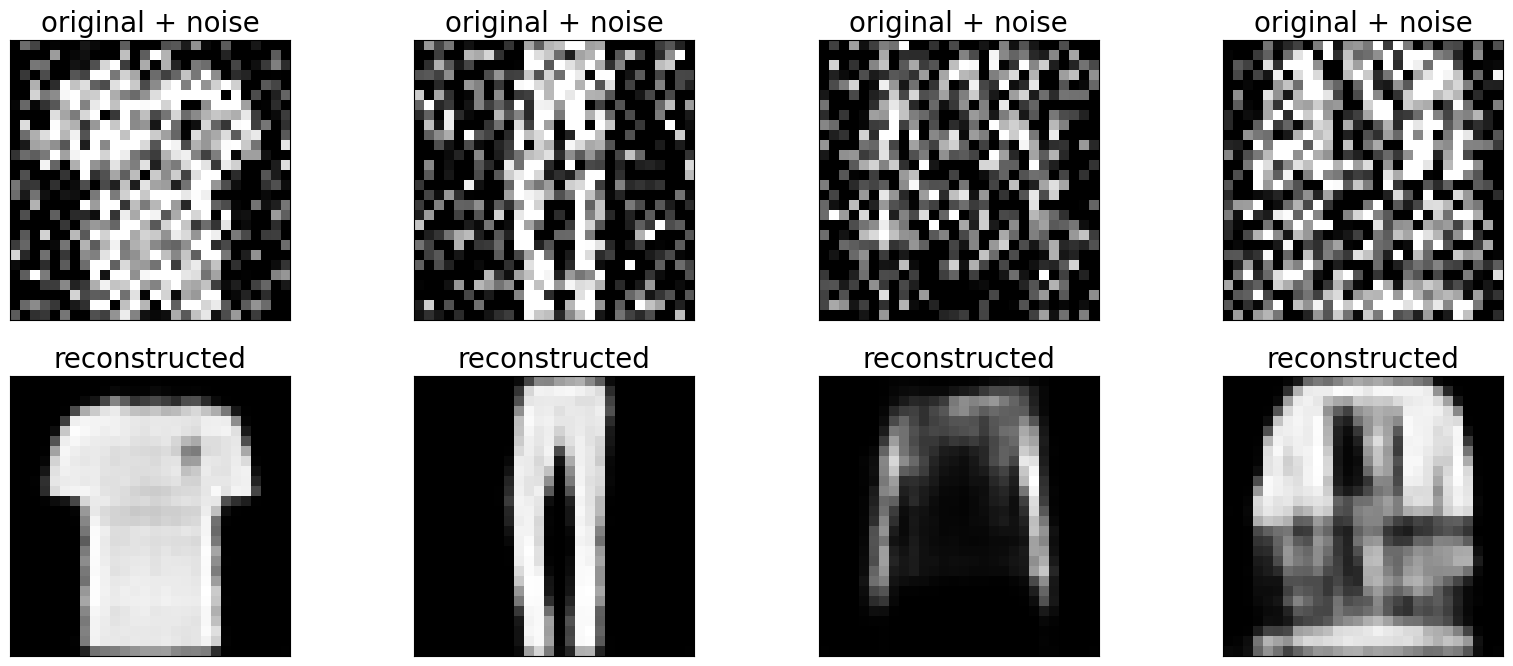

Noise Factor: 0.6


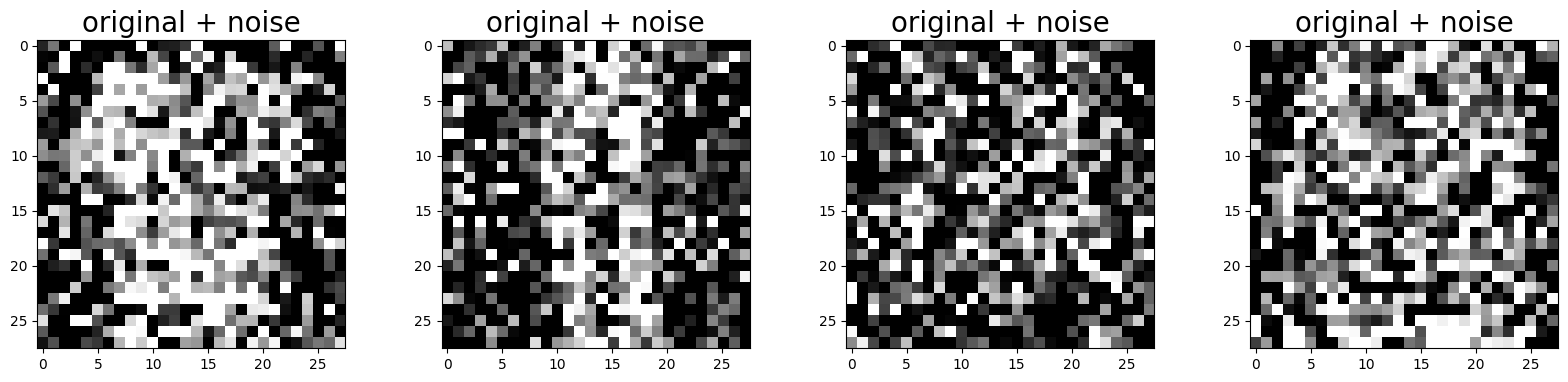

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - loss: 0.0493 - val_loss: 0.0248
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - loss: 0.0246 - val_loss: 0.0242
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - loss: 0.0240 - val_loss: 0.0236
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - loss: 0.0236 - val_loss: 0.0231
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - loss: 0.0232 - val_loss: 0.0229
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - loss: 0.0229 - val_loss: 0.0227
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - loss: 0.0227 - val_loss: 0.0226
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - loss: 0.0226 - val_loss: 0.0224
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 0.0225 - val_loss: 0.0223
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - loss: 0.0224 - val_loss: 0.0222


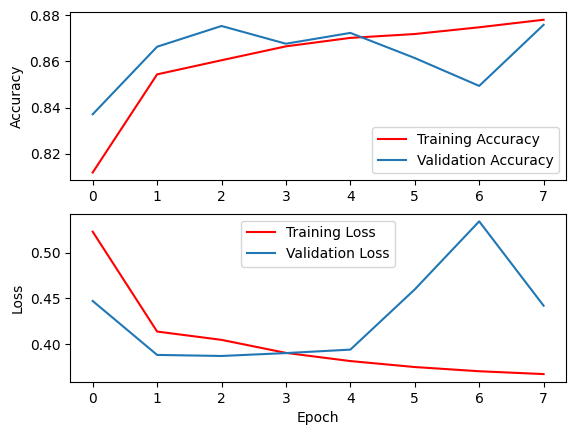

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0222
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0223
Training Loss: 0.022254137322306633
Test Loss: 0.02224458009004593


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 8)        │         1,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose_8              │ (32, 14, 14, 8)        │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (32, 28, 28, 16)       │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (32, 28, 28, 1)        │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

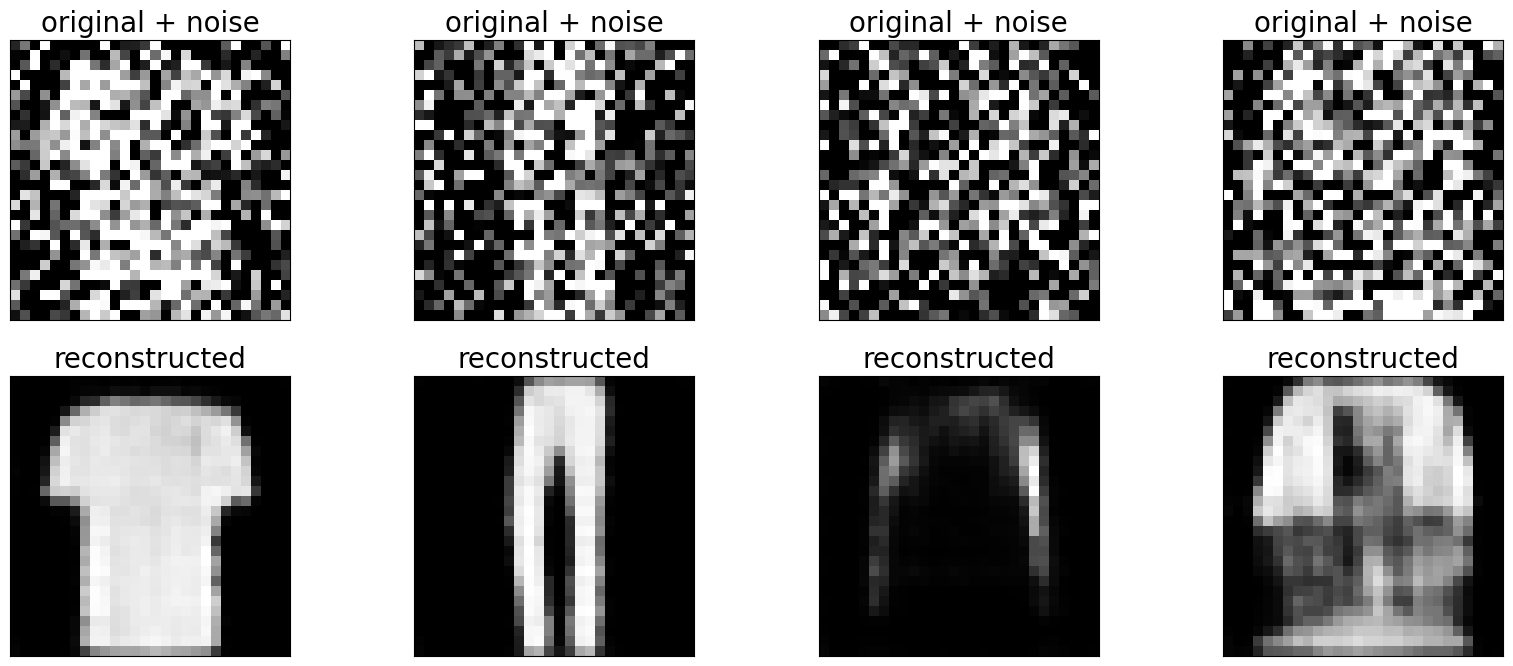

In [37]:
# Define the training and evaluation loop for different noise factors
for noise_factor in noise_factors:
    print("Noise Factor:", noise_factor)
    
    # Add noise to the images
    x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
    x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

    x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
    x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

    n = 4
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.title("original + noise",fontsize=20)
        plt.imshow(tf.squeeze(x_test_noisy[i]))
        plt.gray()
    plt.show()

    # Define and compile the model
    noise_reducer = NoiseReducer()
    noise_reducer.compile(optimizer='adam', loss=losses.MeanSquaredError())

    # Train the model
    noise_reducer.fit(x_train_noisy, x_train,
                    epochs=10,
                    shuffle=True,
                    validation_data=(x_test_noisy, x_test))
    
    fig, (ax1, ax2) = plt.subplots(2)

    # Plot accuracy
    ax1.plot(history.history["accuracy"], c="red", label="Training Accuracy")
    ax1.plot(history.history["val_accuracy"], label="Validation Accuracy")
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Plot loss
    ax2.plot(history.history["loss"], c="red", label="Training Loss")
    ax2.plot(history.history["val_loss"], label="Validation Loss")
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()

    plt.show()
    
    # Evaluate the model on training and test data
    train_loss = noise_reducer.evaluate(x_train_noisy, x_train)
    test_loss = noise_reducer.evaluate(x_test_noisy, x_test)

    print("Training Loss:", train_loss)
    print("Test Loss:", test_loss)

    noise_reducer.encoder.summary()

    noise_reducer.decoder.summary()

    # Checking results
    encoded_imgs = noise_reducer.encoder(x_test).numpy()
    decoded_imgs = noise_reducer.decoder(encoded_imgs).numpy()

    n = 4
    plt.figure(figsize=(20, 8))
    for i in range(n):

        # display original + noise
        ax = plt.subplot(2, n, i + 1)
        plt.title("original + noise",fontsize=20)
        plt.imshow(tf.squeeze(x_test_noisy[i]))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        bx = plt.subplot(2, n, i + n + 1)
        plt.title("reconstructed",fontsize=20)
        plt.imshow(tf.squeeze(decoded_imgs[i]))
        plt.gray()
        bx.get_xaxis().set_visible(False)
        bx.get_yaxis().set_visible(False)
    plt.show()

1. Training Loss: This indicates the average loss on the training data, which measures how well the model is able to reconstruct the original images from the noisy inputs during training. A lower training loss suggests that the model is effectively learning to denoise the images.

2. Test Loss: Similarly, the test loss represents the average loss on the test data, indicating how well the model performs on unseen data. The fact that the test loss is very close to the training loss suggests that the model is generalizing well and is not overfitting to the training data.

Overall, the closeness of the training and test losses indicates that model has learned to denoise images effectively and is likely to perform well on new, unseen data.

1. Increase in Loss with Higher Noise Factor:
As expected, both the training and test losses increase as the noise factor increases from 0.2 to 0.4 and then to 0.6. This trend indicates that the model struggles more to denoise images with higher levels of noise.

2. Consistency between Training and Test Loss:
The difference between the training and test losses remains relatively small across different noise factors. This suggests that the model is generalizing well and not overfitting to the training data.

3. Magnitude of Loss:
The magnitude of the loss values increases with higher noise factors. This is intuitive because higher levels of noise make the denoising task more challenging, leading to higher reconstruction errors.

4. Effectiveness of Denoising:
Despite the increase in loss with higher noise factors, the model is still capable of reducing the noise to a considerable extent, as indicated by the relatively low loss values. However, the effectiveness of denoising decreases as the noise level increases.